# Combined Data Analysis: Data Accumulation and Statistical Analysis

### Tasks included:
- Reading transition matrices 
- Combining transition matrices 
- Do some statistical analysis: P-value, AUC, Ranksum test

## Imports and system info

In [669]:
import HumachLab_Global 
HumachLab_Global.get_system_info()


List of OS platforms and codes
___________________________________________
0 Darwin
1 Windows
2 Linux
===> "1 - Windows" OS is detected.

Processor (CPU) details: 
___________________________________________
{'python_version': '3.7.10.final.0 (64 bit)', 'cpuinfo_version': [8, 0, 0], 'cpuinfo_version_string': '8.0.0', 'arch': 'X86_64', 'bits': 64, 'count': 40, 'arch_string_raw': 'AMD64', 'vendor_id_raw': 'GenuineIntel', 'brand_raw': 'Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz', 'hz_advertised_friendly': '2.2000 GHz', 'hz_actual_friendly': '2.2010 GHz', 'hz_advertised': [2200000000, 0], 'hz_actual': [2201000000, 0], 'l2_cache_size': 2621440, 'stepping': 1, 'model': 79, 'family': 6, 'l3_cache_size': 26214400, 'flags': ['3dnow', '3dnowprefetch', 'abm', 'acpi', 'adx', 'aes', 'apic', 'avx', 'avx2', 'bmi1', 'bmi2', 'clflush', 'cmov', 'cx16', 'cx8', 'dca', 'de', 'ds_cpl', 'dtes64', 'dts', 'erms', 'est', 'f16c', 'fma', 'fpu', 'fxsr', 'hle', 'ht', 'ia64', 'intel_pt', 'invpcid', 'lahf_lm', 'mca',

(1,
 'Windows',
 {'brand_raw': 'Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz',
  'arch_string_raw': 'AMD64',
  'arch': 'X86_64',
  'count': 40,
  'python_version': '3.7.10.final.0 (64 bit)',
  'CPU_usage': 19.6,
  'RAM_usage': 66.1,
  'Total_RAM': 127.9,
  'Used_RAM': 84.5,
  'Available_RAM': 43.4},
 [1, 2, 3, 4, 5, 6],
 1)

In [3098]:
'''
Importing necessary modules
'''

import os
import sys
import datetime

print(os.getcwd())
os.chdir(os.getcwd())
print(f"{os.getcwd()}\HumachLab")
sys.path.append(f"{os.getcwd()}\HumachLab")
sys.path.insert(0, os.path.abspath('./HumachLab'))

import itertools as it
import re
import pickle
import json

import copy
from pprint import pprint

import glob

import math
import numbers

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc, rcParams
%matplotlib inline
import seaborn as sns

import HumachLab_Global
from HumachLab import * 
# from HumachLab.HumachLab_Global import *
# import HumachLab_Global
HumachLab_Global.get_system_info()

import mne

# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (20,6)

C:\Users\aliem\OneDrive - Deakin University\_MyResearch\PhD_Research\HML_IHC_Sleep_Data_Analysis
C:\Users\aliem\OneDrive - Deakin University\_MyResearch\PhD_Research\HML_IHC_Sleep_Data_Analysis\HumachLab

List of OS platforms and codes
___________________________________________
0 Darwin
1 Windows
2 Linux
===> "1 - Windows" OS is detected.

Processor (CPU) details: 
___________________________________________
{'python_version': '3.7.10.final.0 (64 bit)', 'cpuinfo_version': [8, 0, 0], 'cpuinfo_version_string': '8.0.0', 'arch': 'X86_64', 'bits': 64, 'count': 40, 'arch_string_raw': 'AMD64', 'vendor_id_raw': 'GenuineIntel', 'brand_raw': 'Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz', 'hz_advertised_friendly': '2.2000 GHz', 'hz_actual_friendly': '2.2010 GHz', 'hz_advertised': [2200000000, 0], 'hz_actual': [2201000000, 0], 'l2_cache_size': 2621440, 'stepping': 1, 'model': 79, 'family': 6, 'l3_cache_size': 26214400, 'flags': ['3dnow', '3dnowprefetch', 'abm', 'acpi', 'adx', 'aes', 'apic', 'avx', 

## Get directory list: Subject-wise

In [671]:
'''
Explore the contents/files in the directory
'''

def get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None):
    '''
    directory: valid path string, path_type: p_file|p_dir, containes: string, extension: valid string file extension 
    '''
    os_path = os.path
    list_of_paths = []
        
    path_keywords = "*"
    if containes:
        path_keywords = f"{path_keywords}{containes}*"
    
    if extension:
        path_keywords = f"{path_keywords}.{extension}"
        
    complete_path = f"{directory}/{path_keywords}"
    print(f"============> {path_keywords}, {path_type}, {complete_path}")
    
    all_paths = glob.glob(complete_path) 
    all_temp_paths = None
    list_of_paths = None
    
    if path_type:
        if path_type=="p_file":
            all_temp_paths = [path.replace("\\", "/") for path in all_paths if (os_path.exists(path) and os_path.isfile(path))]
        if path_type=="p_dir":
            all_temp_paths = [path.replace("\\", "/") for path in all_paths if (os_path.exists(path) and os_path.isdir(path))]   
    else:
        all_temp_paths = [path.replace("\\", "/") for path in all_paths]
        
    if exclude:
        # print(all_temp_paths)
        # print(len(all_temp_paths), exclude)
        # list_of_paths = [path for path in all_temp_paths for ex in exclude if ex not in path]
        # list_of_paths = [path for ex in exclude for path in all_temp_paths if ex not in path]
        list_of_paths = [path for path in all_temp_paths if not any((ex in path) for ex in exclude)]
        # list_of_paths = [path for ex in exclude if any(ex not in path for path in all_temp_paths)]
        # any(substring in string for substring in substring_list)
        # print(len(list_of_paths))
    else:
        list_of_paths = all_temp_paths.copy()
    
    return list_of_paths

In [3226]:
data_directory = "./Results/" 
tran_directory = "/Transition_Matrices"
result_directory = "./Results/_Combined" 
prob_cal_from_all = True  
result_subdir = ['STP_From_Same_Stages', 'STP_From_All_Stages'][int(prob_cal_from_all)]
result_directory = f"./Results/_Combined/{result_subdir}" 
wake_state_trimmed = True  
result_subdirectory = f"Subject_One_Night{'_TrimW' if wake_state_trimmed else ''}"  ###"Subject_Combined_Record"  "Subject_Separate_Record"  "Subject_One_Night" "Subject_One_Night_TrimW"   ## Change for new type of result 
data_subdirectory = ["CAP_Sleep", "Sleep_EDFX", "SDRC"] 
tran_matrix_type = ["count", "dura", "proba"] 
annotation_type = ['annot', 'tran'] 
tran_step = 3
exclude_contents_in_dataset_directory = ["SHA256SUMS", "RECORDS"]
exclude_contents_in_result_directory = ["SHA256SUMS", "RECORDS", "all_annotions", "annot_sequence", "transition_sequence", "hypno", "DATASET_CHANGELOG"]
sleep_stage_labels = ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
sleep_stage_labels_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'REM':5}
sleep_stage_names_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'R':5}
list_of_paths = None 
result_directory

# directory = dataset_directory
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_file", containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_dir", containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes="nfle", extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension="edf", exclude=None) 
# list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=exclude_contents_in_dataset_directory) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# # pprint(list_of_paths)
# list_of_paths

'./Results/_Combined/STP_From_All_Stages'

### Get basic information and transition matrix

In [3227]:
def get_list_of_transition_matrix_files(info_type, annot_type, tran_step): 
    list_of_tran_mat_paths = [] 
    all_demography_df = pd.DataFrame() 
    all_demography_detail_df = pd.DataFrame() 
    for i, dirr in enumerate(data_subdirectory): 
        directory = f"{data_directory}{dirr}/{result_subdir}{tran_directory}"
        tmp_mat_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=f'{info_type}_{annot_type}*transition{tran_step}', extension=None, exclude=exclude_contents_in_dataset_directory) 
#         print('NNNN--> ', tmp_mat_paths)
        list_of_tran_mat_paths.extend(tmp_mat_paths) 

        demography_df = pd.read_csv(f"{data_directory}{dirr}/{result_subdir}/Demography.csv", index_col=False)
        demography_df.insert(1, 'Dataset', [dirr]*demography_df.shape[0])
        all_demography_df = pd.concat([all_demography_df, demography_df]) 
        all_demography_df.reset_index(drop=True, inplace=True) 

        demography_detail_df = pd.read_csv(f"{data_directory}{dirr}/{result_subdir}/Demography_Details.csv", index_col=False)
        demography_detail_df.insert(0, 'Dataset', [dirr]*demography_detail_df.shape[0])
        sub_name = demography_detail_df['File_Name'].str[:-1].values.tolist() if i==1 else demography_detail_df['File_Name'].values.tolist() 
        demography_detail_df.insert(2, 'Subject_Name', sub_name)
        all_demography_detail_df = pd.concat([all_demography_detail_df, demography_detail_df]) 
        all_demography_detail_df.reset_index(drop=True, inplace=True) 

    return all_demography_df, all_demography_detail_df, list_of_tran_mat_paths


info_type="file" ##"sub"/"file"  ## Change for new type of result 
annot_type = annotation_type[0]   ## Change for different data preparation for 'annot' and 'tran' 

all_demography_df, all_demography_detail_df, list_of_tran_mat_paths = get_list_of_transition_matrix_files(info_type=info_type, annot_type=annot_type, tran_step=tran_step) 
# list_of_tran_mat_paths 

============> *file_annot*transition3*, None, ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/*file_annot*transition3*
============> *file_annot*transition3*, None, ./Results/Sleep_EDFX/STP_From_All_Stages/Transition_Matrices/*file_annot*transition3*
============> *file_annot*transition3*, None, ./Results/SDRC/STP_From_All_Stages/Transition_Matrices/*file_annot*transition3*


In [3228]:
list_of_tran_mat_paths[:3] 

['./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux1_transition3_count.csv',
 './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux1_transition3_dura.csv',
 './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux1_transition3_proba.csv']

In [3229]:
all_demography_df

,#,Dataset,Category_Name,Category,Total_Count,Male_Count,Female_Count,Total_AgeRange,Male_AgeRange,Female_AgeRange
0,1,CAP_Sleep,Bruxism,brux,2,2,0,23 - 34,23 - 34,0 - 0
1,2,CAP_Sleep,Sleep-Disordered Breathing,sdb,4,4,0,65 - 78,65 - 78,0 - 0
2,3,CAP_Sleep,Insomnia,ins,9,4,5,47 - 82,54 - 82,47 - 59
3,4,CAP_Sleep,Narcolepsy,narco,5,2,3,18 - 44,24 - 43,18 - 44
4,5,CAP_Sleep,Nocturnal Frontal Lobe Epilepsy,nfle,40,21,19,14 - 67,14 - 44,16 - 67
5,6,CAP_Sleep,Periodic Leg Movements,plm,10,7,3,40 - 62,40 - 62,50 - 52
6,7,CAP_Sleep,REM Behavior Disorder,rbd,22,19,3,58 - 82,58 - 82,73 - 76
7,8,CAP_Sleep,No Pathology (Controls),n,16,7,9,23 - 42,23 - 34,24 - 42
8,10,CAP_Sleep,Total,NaN,108,66,42,14 - 82,14 - 82,16 - 76
9,11,CAP_Sleep,Sleep Disorders,dis,92,59,33,14 - 82,14 - 82,16 - 76


In [3230]:
all_demography_detail_df

,Dataset,File_Name,Subject_Name,Category,Subject_ID,Gender,Age
0,CAP_Sleep,brux1,brux1,brux,1,M,34
1,CAP_Sleep,brux2,brux2,brux,2,M,23
2,CAP_Sleep,sdb1,sdb1,sdb,1,M,65
3,CAP_Sleep,sdb2,sdb2,sdb,2,M,77
4,CAP_Sleep,sdb3,sdb3,sdb,3,M,78
...,...,...,...,...,...,...,...
322,SDRC,ins1107,ins1107,ins,7,F,62
323,SDRC,ins1108,ins1108,ins,8,F,57
324,SDRC,ins1109,ins1109,ins,9,F,32
325,SDRC,ins1110,ins1110,ins,10,M,41


In [3231]:
result_directory

'./Results/_Combined/STP_From_All_Stages'

In [3232]:
all_demography_df.to_csv(f'{result_directory}/all_demography.csv', index=False) 
all_demography_detail_df.to_csv(f'{result_directory}/all_demography_detail.csv', index=False) 

In [3233]:
# ### For subject info, change file name to subject name
# all_demography_detail_df['File_Name'].str[:-1]
# # all_demography_detail_df 

len(all_demography_detail_df['Subject_Name'].unique()) 
len(all_demography_detail_df[all_demography_detail_df['Subject_Name'].str.startswith( ('SC', 'ST') )]['Subject_Name'].unique()) 
len(all_demography_detail_df[~all_demography_detail_df['Subject_Name'].str.startswith( ('SC', 'ST') )]['Subject_Name'].unique()) 

all_demography_detail_df [ all_demography_detail_df['Subject_Name'].isin(all_demography_detail_df[~all_demography_detail_df['Subject_Name'].str.startswith( ('SC', 'ST') )]['Subject_Name'].unique()) ]['Gender'].value_counts() 
all_demography_detail_df [ all_demography_detail_df['Subject_Name'].isin(all_demography_detail_df[all_demography_detail_df['Subject_Name'].str.startswith( ('SC', 'ST') )]['Subject_Name'].unique()) ]#['Gender'].value_counts() 

# tmp_df [ tmp_df['Subject_Name'].isin(tmp_df[tmp_df['Subject_Name'].str.startswith( ('SC', 'ST') )]['Subject_Name'].unique()) ]['Gender'].value_counts() 
# tmp_df

,Dataset,File_Name,Subject_Name,Category,Subject_ID,Gender,Age
108,Sleep_EDFX,SC4001,SC400,n,0,F,33
109,Sleep_EDFX,SC4002,SC400,n,0,F,33
110,Sleep_EDFX,SC4011,SC401,n,1,F,33
111,Sleep_EDFX,SC4012,SC401,n,1,F,33
112,Sleep_EDFX,SC4021,SC402,n,2,F,26
...,...,...,...,...,...,...,...
300,Sleep_EDFX,ST7212,ST721,n,21,M,34
301,Sleep_EDFX,ST7221,ST722,n,22,F,56
302,Sleep_EDFX,ST7222,ST722,n,22,F,56
303,Sleep_EDFX,ST7241,ST724,n,24,M,48


In [3234]:
len(list_of_tran_mat_paths), list_of_tran_mat_paths[:5]+list_of_tran_mat_paths[-5:]

(390,
 ['./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux1_transition3_count.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux1_transition3_dura.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux1_transition3_proba.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux2_transition3_count.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux2_transition3_dura.csv',
  './Results/SDRC/STP_From_All_Stages/Transition_Matrices/file_annot_n1110_transition3_dura.csv',
  './Results/SDRC/STP_From_All_Stages/Transition_Matrices/file_annot_n1110_transition3_proba.csv',
  './Results/SDRC/STP_From_All_Stages/Transition_Matrices/file_annot_n1111_transition3_count.csv',
  './Results/SDRC/STP_From_All_Stages/Transition_Matrices/file_annot_n1111_transition3_dura.csv',
  './Results/SDRC/STP_From_All_Stages/Transition_Matrices/file_annot_n1111_transit

### Accessing only all (normal/disordered) subjects

In [3235]:
# # Special treatment for subject name for dataset2: EDFX dataset, since it has two files for a subject  
# remove_last_character = lambda x: x[:-1] 

tmp_df = all_demography_detail_df.copy()
# # tmp_df[(tmp_df['Dataset']==dirr)]['File_Name'] = tmp_df[(tmp_df['Dataset']==dirr)]['File_Name'].str[:-1]
# tmp_df['Subject_Name'] = tmp_df['File_Name'].apply(lambda x: x.rstrip(' A'))
# tmp_df['Subject_Name'] = tmp_df.apply(lambda row: remove_last_character(row['File_Name']) if row['Dataset'] == dirr else row['File_Name'], axis=1)
tmp_df

,Dataset,File_Name,Subject_Name,Category,Subject_ID,Gender,Age
0,CAP_Sleep,brux1,brux1,brux,1,M,34
1,CAP_Sleep,brux2,brux2,brux,2,M,23
2,CAP_Sleep,sdb1,sdb1,sdb,1,M,65
3,CAP_Sleep,sdb2,sdb2,sdb,2,M,77
4,CAP_Sleep,sdb3,sdb3,sdb,3,M,78
...,...,...,...,...,...,...,...
322,SDRC,ins1107,ins1107,ins,7,F,62
323,SDRC,ins1108,ins1108,ins,8,F,57
324,SDRC,ins1109,ins1109,ins,9,F,32
325,SDRC,ins1110,ins1110,ins,10,M,41


In [3236]:
result_subdirectory.find("Subject_One_Night")

0

In [3237]:
### For subject's one night data remove duplicate subject name 
if result_subdirectory.find("Subject_One_Night")>=0:
    tmp_df = tmp_df.drop_duplicates(subset=["Subject_Name"], keep='first')
    
tmp_df

,Dataset,File_Name,Subject_Name,Category,Subject_ID,Gender,Age
0,CAP_Sleep,brux1,brux1,brux,1,M,34
1,CAP_Sleep,brux2,brux2,brux,2,M,23
2,CAP_Sleep,sdb1,sdb1,sdb,1,M,65
3,CAP_Sleep,sdb2,sdb2,sdb,2,M,77
4,CAP_Sleep,sdb3,sdb3,sdb,3,M,78
...,...,...,...,...,...,...,...
322,SDRC,ins1107,ins1107,ins,7,F,62
323,SDRC,ins1108,ins1108,ins,8,F,57
324,SDRC,ins1109,ins1109,ins,9,F,32
325,SDRC,ins1110,ins1110,ins,10,M,41


In [3238]:
# tmp_df[(tmp_df['Dataset']=='SDRC')] 

In [3239]:
sub_type = all_demography_detail_df['Category'].unique().tolist()
sub_type

['brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd', 'n']

In [3240]:
result_subdirectory

'Subject_One_Night_TrimW'

In [3241]:
info_type=="sub", result_subdirectory=="Subject_One_Night"

(False, False)

In [3242]:
### Control here to choose what file to load from transiton matrix
all_file_names = {}

for st in sub_type:
    accessible_file_name_column = 'Subject_Name' if info_type=="sub" else 'File_Name'
    print(accessible_file_name_column)
    all_file_names[st] = tmp_df[(tmp_df['Category']==st)][accessible_file_name_column].unique().tolist() 

len(all_file_names), all_file_names

all_file_names[list(all_file_names.keys())[-1]]
all_file_names[list(all_file_names.keys())[6]]
all_file_names[list(all_file_names.keys())[7]][-5:]

File_Name
File_Name
File_Name
File_Name
File_Name
File_Name
File_Name
File_Name


['n1107', 'n1108', 'n1109', 'n1110', 'n1111']

In [3243]:
# all_file_names

In [3244]:
# Sort the list of file names serially based on subject number 
def sort_a_list_of_strings(lst):
    sorted_lst = sorted(lst, key=lambda s: int(re.search(r'\d+', s).group())) 
    return sorted_lst


# Select only normal subjects for now 
def get_list_of_file_names_by_subject_type(all_fl_names, key, annot_or_tran='tran'):
    name_pattaern = f'{info_type}_{annot_or_tran}' 
    # print(name_pattaern)
    all_tran_mat_paths = [pp for pp in list_of_tran_mat_paths if any((f'{name_pattaern}_{fl}' in pp) for fl in all_fl_names[key])] 
    # print(all_tran_mat_paths)
    
    # key_pat = re.compile(r"^(\D+)(\d+)$")
    # all_tran_mat_paths.sort( key=key )
    
    all_tran_mat_paths = sort_a_list_of_strings(all_tran_mat_paths)
    
    return all_tran_mat_paths

In [3245]:
cat_keys = list(all_file_names.keys()) 
cat_keys.remove('n') 
cat_keys.append('n') 
cat_keys

['brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd', 'n']

In [3246]:
# all_file_names

In [3247]:
key = cat_keys[-1]
key = cat_keys[4]
all_tran_mat_paths = get_list_of_file_names_by_subject_type(all_file_names, key, annot_or_tran=annot_type)

# all_tran_mat_paths
len(all_tran_mat_paths), all_tran_mat_paths[:10]

(120,
 ['./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_nfle1_transition3_count.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_nfle1_transition3_dura.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_nfle1_transition3_proba.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_nfle2_transition3_count.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_nfle2_transition3_dura.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_nfle2_transition3_proba.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_nfle3_transition3_count.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_nfle3_transition3_dura.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_nfle3_transition3_proba.csv',
  './Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrice

In [3248]:
# all_file_names

## Data preparation

### Combining transition matrixes and make features: Subjectwise One Night's data

In [3249]:
tran_matrix_type

['count', 'dura', 'proba']

In [3250]:
from functools import reduce

def convert_columnwise_data_to_rowwise(dataset_name, sub_cat, sub_id, file): 
    #file = './Results/CAP_Sleep/Transition_Matrices/sub_tran_brux1_transition2_count.csv'
    
    tdf = pd.read_csv(file, index_col='From') 
    tdf
    
    indx = tdf.index.values.tolist()
    indx

    cols = tdf.columns.values.tolist()
    cols

    new_lst = list(it.product(indx, cols))
    new_lst

    new_cols = reduce(lambda lst, tpl: lst + [f"{tpl[0]}->{tpl[1]}"], new_lst, []) 
    new_cols
    new_cols.insert(0, 'Dataset')
    new_cols.insert(1, 'Category')
    new_cols.insert(2, 'Subject_Name')

    arr = tdf.values
    arr

    arr = arr.reshape(1, arr.shape[0]*arr.shape[1]).tolist()     
    arr[0].insert(0, dataset_name)
    arr[0].insert(1, sub_cat)
    arr[0].insert(2, sub_id)
    
    # print(new_cols, arr) 

    reshaped_tdf = pd.DataFrame(arr, columns=[new_cols]) 
    return reshaped_tdf

In [3251]:
# file = './Results/CAP_Sleep/Transition_Matrices/sub_tran_brux1_transition2_count.csv'

# sub_id = (((file.split('/')[-1]).split('.')[0]).split('_')[2])
# sub_id

# convert_columnwise_data_to_rowwise('CAP_Sleep', 'brux', sub_id, file)

### Prepare transition data - for either Annot or Tran

In [3252]:
# annot_type = annotation_type[1]

In [3253]:
annot_type, tran_step

('annot', 3)

In [3254]:
tran_matrix_type, all_file_names['ins']

(['count', 'dura', 'proba'],
 ['ins1',
  'ins2',
  'ins3',
  'ins4',
  'ins5',
  'ins6',
  'ins7',
  'ins8',
  'ins9',
  'ins1101',
  'ins1102',
  'ins1103',
  'ins1104',
  'ins1105',
  'ins1106',
  'ins1107',
  'ins1108',
  'ins1109',
  'ins1110',
  'ins1111'])

In [3255]:
# all_file_names

In [3256]:
def get_final_feature_data_from_transition_matrixes(all_file_names, mat_type = tran_matrix_type[0]): 
    all_tran_df = pd.DataFrame()

    for i, ckey in enumerate(cat_keys):
        sub_ids = all_file_names[ckey] 
        sub_ids = sort_a_list_of_strings(sub_ids)
        all_files = get_list_of_file_names_by_subject_type(all_file_names, ckey, annot_or_tran=annot_type) 

        all_tran_df.append(pd.DataFrame())
        file_lst = [fl for fl in all_files if mat_type in fl]
        
        # print(i+1, ckey, len(file_lst))
        for j, (sub_id, file) in enumerate(zip(sub_ids, file_lst)):
            dataset_name = file.split('/')[2]
            print(i+1, len(file_lst), j+1, '--->', dataset_name, ckey, sub_id, file)
            tdf = convert_columnwise_data_to_rowwise(dataset_name, ckey, sub_id, file) 
            all_tran_df = pd.concat([all_tran_df, tdf])

    return all_tran_df 


In [3257]:
tran_count_feat_df = get_final_feature_data_from_transition_matrixes(all_file_names, mat_type = tran_matrix_type[0])
tran_count_feat_df

1 2 1 ---> CAP_Sleep brux brux1 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux1_transition3_count.csv
1 2 2 ---> CAP_Sleep brux brux2 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux2_transition3_count.csv
2 4 1 ---> CAP_Sleep sdb sdb1 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_sdb1_transition3_count.csv
2 4 2 ---> CAP_Sleep sdb sdb2 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_sdb2_transition3_count.csv
2 4 3 ---> CAP_Sleep sdb sdb3 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_sdb3_transition3_count.csv
2 4 4 ---> CAP_Sleep sdb sdb4 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_sdb4_transition3_count.csv
3 20 1 ---> CAP_Sleep ins ins1 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_ins1_transition3_count.csv
3 20 2 ---> CAP_Sleep ins ins2 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_a

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,66,16,1,0,0,0,2,...,0,0,0,0,6,0,0,0,0,167
0,CAP_Sleep,brux,brux2,90,13,0,0,0,0,1,...,0,0,0,0,4,1,0,0,0,197
0,CAP_Sleep,sdb,sdb1,168,23,0,0,0,0,4,...,0,0,0,0,1,0,3,0,0,99
0,CAP_Sleep,sdb,sdb2,141,6,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,37
0,CAP_Sleep,sdb,sdb3,186,10,3,0,0,0,1,...,0,0,0,0,1,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,SDRC,n,n1107,205,35,2,0,0,0,21,...,0,0,0,0,4,6,0,0,0,55
0,SDRC,n,n1108,372,63,0,0,0,0,34,...,0,0,0,0,2,1,1,1,0,31
0,SDRC,n,n1109,28,5,4,0,0,0,1,...,0,0,0,0,2,2,0,1,0,11
0,SDRC,n,n1110,2,2,0,0,0,0,1,...,0,0,0,0,0,9,1,1,0,104


In [3258]:
tran_dura_feat_df = get_final_feature_data_from_transition_matrixes(all_file_names, mat_type = tran_matrix_type[1])
tran_dura_feat_df

1 2 1 ---> CAP_Sleep brux brux1 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux1_transition3_dura.csv
1 2 2 ---> CAP_Sleep brux brux2 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux2_transition3_dura.csv
2 4 1 ---> CAP_Sleep sdb sdb1 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_sdb1_transition3_dura.csv
2 4 2 ---> CAP_Sleep sdb sdb2 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_sdb2_transition3_dura.csv
2 4 3 ---> CAP_Sleep sdb sdb3 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_sdb3_transition3_dura.csv
2 4 4 ---> CAP_Sleep sdb sdb4 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_sdb4_transition3_dura.csv
3 20 1 ---> CAP_Sleep ins ins1 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_ins1_transition3_dura.csv
3 20 2 ---> CAP_Sleep ins ins2 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_in

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,3960,960,60,0,0,0,120,...,0,0,0,0,360,0,0,0,0,10020
0,CAP_Sleep,brux,brux2,5400,780,0,0,0,0,60,...,0,0,0,0,240,60,0,0,0,11820
0,CAP_Sleep,sdb,sdb1,10080,1380,0,0,0,0,240,...,0,0,0,0,60,0,180,0,0,5940
0,CAP_Sleep,sdb,sdb2,8460,360,0,0,0,0,60,...,0,0,0,0,0,0,47,0,0,2220
0,CAP_Sleep,sdb,sdb3,11160,587,180,0,0,0,60,...,0,0,0,0,60,0,0,0,0,840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,SDRC,n,n1107,12300,2100,120,0,0,0,1260,...,0,0,0,0,240,360,0,0,0,3300
0,SDRC,n,n1108,22320,3780,0,0,0,0,2040,...,0,0,0,0,120,60,60,60,0,1860
0,SDRC,n,n1109,1680,300,240,0,0,0,60,...,0,0,0,0,120,120,0,60,0,660
0,SDRC,n,n1110,120,120,0,0,0,0,60,...,0,0,0,0,0,540,60,60,0,6240


In [3259]:
tran_proba_feat_df = get_final_feature_data_from_transition_matrixes(all_file_names, mat_type = tran_matrix_type[2])
tran_proba_feat_df

1 2 1 ---> CAP_Sleep brux brux1 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux1_transition3_proba.csv
1 2 2 ---> CAP_Sleep brux brux2 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_brux2_transition3_proba.csv
2 4 1 ---> CAP_Sleep sdb sdb1 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_sdb1_transition3_proba.csv
2 4 2 ---> CAP_Sleep sdb sdb2 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_sdb2_transition3_proba.csv
2 4 3 ---> CAP_Sleep sdb sdb3 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_sdb3_transition3_proba.csv
2 4 4 ---> CAP_Sleep sdb sdb4 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_sdb4_transition3_proba.csv
3 20 1 ---> CAP_Sleep ins ins1 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_annot_ins1_transition3_proba.csv
3 20 2 ---> CAP_Sleep ins ins2 ./Results/CAP_Sleep/STP_From_All_Stages/Transition_Matrices/file_a

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
0,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
0,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
0,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
0,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
0,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
0,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
0,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [3260]:
annot_type, tran_step

('annot', 3)

In [3261]:
annot_type.capitalize()

'Annot'

In [3262]:
data_directory, data_subdirectory, result_directory

('./Results/',
 ['CAP_Sleep', 'Sleep_EDFX', 'SDRC'],
 './Results/_Combined/STP_From_All_Stages')

In [3263]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Count_Transition{tran_step}.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night_TrimW/Annot_Count_Transition3.csv'

In [3264]:
combined_feat_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Count_Transition{tran_step}.csv"
combined_feat_file_path

tran_count_feat_df.to_csv(combined_feat_file_path, index=False)

In [3265]:
combined_feat_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Dura_Transition{tran_step}.csv"
combined_feat_file_path

tran_dura_feat_df.to_csv(combined_feat_file_path, index=False)

In [3266]:
combined_feat_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}.csv"
combined_feat_file_path

tran_proba_feat_df.to_csv(combined_feat_file_path, index=False)

**Run this again for 'annot' and 'tran' using 'annot_type' if you didn't yet...**

Run for all conditions: annot/tran, all_stage/same_stage, one_night/one_night_trimW 

## Statistical analysis

### Load data

In [2485]:
data_directory = "./Results/" 
tran_directory = "/Transition_Matrices"
result_directory = "./Results/_Combined" 
prob_cal_from_all = True  
result_subdir = ['STP_From_Same_Stages', 'STP_From_All_Stages'][int(prob_cal_from_all)]
result_directory = f"./Results/_Combined/{result_subdir}" 
wake_state_trimmed = True  
result_subdirectory = f"Subject_One_Night{'_TrimW' if wake_state_trimmed else ''}"  ###"Subject_Combined_Record"  "Subject_Separate_Record"  "Subject_One_Night" "Subject_One_Night_TrimW"   ## Change for new type of result 
# data_subdirectory = ["CAP_Sleep", "Sleep_EDFX", "SDRC"] 
# tran_matrix_type = ["count", "dura", "proba"] 
# annotation_type = ['annot', 'tran'] 
tran_step = 3
# exclude_contents_in_dataset_directory = ["SHA256SUMS", "RECORDS"]
# exclude_contents_in_result_directory = ["SHA256SUMS", "RECORDS", "all_annotions", "annot_sequence", "transition_sequence", "hypno", "DATASET_CHANGELOG"]
# sleep_stage_labels = ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
# sleep_stage_labels_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'REM':5}
# sleep_stage_names_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'R':5}
# list_of_paths = None 
result_directory

'./Results/_Combined/STP_From_All_Stages'

In [2486]:
result_directory, result_subdirectory

('./Results/_Combined/STP_From_All_Stages', 'Subject_One_Night_TrimW')

In [2487]:
annot_type = annotation_type[0]   ## Dont change for different data preparation for 'annot' and 'tran'  coz there is already another bellow 
annot_type

'annot'

In [2488]:
result_directory, annot_type, tran_step, annotation_type, tran_matrix_type 

('./Results/_Combined/STP_From_All_Stages',
 'annot',
 3,
 ['annot', 'tran'],
 ['count', 'dura', 'proba'])

In [2489]:
f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night_TrimW/Annot_Count_Transition3.csv'

In [2490]:
file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 
file_path 
annot_count_tr2_df = pd.read_csv(file_path, index_col=False)
annot_count_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,66,16,1,0,0,0,2,...,0,0,0,0,6,0,0,0,0,167
1,CAP_Sleep,brux,brux2,90,13,0,0,0,0,1,...,0,0,0,0,4,1,0,0,0,197
2,CAP_Sleep,sdb,sdb1,168,23,0,0,0,0,4,...,0,0,0,0,1,0,3,0,0,99
3,CAP_Sleep,sdb,sdb2,141,6,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,37
4,CAP_Sleep,sdb,sdb3,186,10,3,0,0,0,1,...,0,0,0,0,1,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,205,35,2,0,0,0,21,...,0,0,0,0,4,6,0,0,0,55
126,SDRC,n,n1108,372,63,0,0,0,0,34,...,0,0,0,0,2,1,1,1,0,31
127,SDRC,n,n1109,28,5,4,0,0,0,1,...,0,0,0,0,2,2,0,1,0,11
128,SDRC,n,n1110,2,2,0,0,0,0,1,...,0,0,0,0,0,9,1,1,0,104


In [2491]:
file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[1].capitalize()}_Transition{tran_step}.csv" 
file_path 
annot_dura_tr2_df = pd.read_csv(file_path, index_col=False)
annot_dura_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,3960,960,60,0,0,0,120,...,0,0,0,0,360,0,0,0,0,10020
1,CAP_Sleep,brux,brux2,5400,780,0,0,0,0,60,...,0,0,0,0,240,60,0,0,0,11820
2,CAP_Sleep,sdb,sdb1,10080,1380,0,0,0,0,240,...,0,0,0,0,60,0,180,0,0,5940
3,CAP_Sleep,sdb,sdb2,8460,360,0,0,0,0,60,...,0,0,0,0,0,0,47,0,0,2220
4,CAP_Sleep,sdb,sdb3,11160,587,180,0,0,0,60,...,0,0,0,0,60,0,0,0,0,840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,12300,2100,120,0,0,0,1260,...,0,0,0,0,240,360,0,0,0,3300
126,SDRC,n,n1108,22320,3780,0,0,0,0,2040,...,0,0,0,0,120,60,60,60,0,1860
127,SDRC,n,n1109,1680,300,240,0,0,0,60,...,0,0,0,0,120,120,0,60,0,660
128,SDRC,n,n1110,120,120,0,0,0,0,60,...,0,0,0,0,0,540,60,60,0,6240


In [2492]:
file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 
file_path 
annot_proba_tr2_df = pd.read_csv(file_path, index_col=False)
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2493]:
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2494]:
# ins8 = annot_proba_tr2_df[annot_proba_tr2_df['Subject_Name']=='ins8'] 
# ins8
# # np.around(ins8.values[:, 3:], decimals=2) 
# # ins8.values[0, 3:].round(2)
# np.round(ins8.values[0, 3:].astype(float), 2).reshape(6, 6)

In [2495]:
# sc4101 = annot_proba_tr2_df[annot_proba_tr2_df['Subject_Name']=='SC4101'] 
# # sc4101.values[:, 3:].astype(float))
# np.round(sc4101.values[0, 3:].astype(float), 2).reshape(6, 6)

In [2496]:
annot_proba_tr2_df.sum()

Dataset          CAP_SleepCAP_SleepCAP_SleepCAP_SleepCAP_SleepC...
Category         bruxbruxsdbsdbsdbsdbinsinsinsinsinsinsinsinsin...
Subject_Name     brux1brux2sdb1sdb2sdb3sdb4ins1ins2ins3ins4ins5...
W->W->W                                                   102.0153
W->W->S1                                                    9.3735
                                       ...                        
REM->REM->S1                                                2.8699
REM->REM->S2                                                2.1879
REM->REM->S3                                                0.2769
REM->REM->S4                                                0.0157
REM->REM->REM                                             114.0667
Length: 219, dtype: object

#### Tran

In [2497]:
f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night_TrimW/Tran_Count_Transition3.csv'

In [2498]:
file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 
file_path 
tran_count_tr2_df = pd.read_csv(file_path, index_col=False)
tran_count_tr2_df

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,CAP_Sleep,brux,brux2,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
2,CAP_Sleep,sdb,sdb1,0,0,0,0,0,0,13,...,0,0,0,0,0,0,0,0,0,0
3,CAP_Sleep,sdb,sdb2,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,CAP_Sleep,sdb,sdb3,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0,0,0,0,0,0,34,...,0,0,0,0,0,0,0,0,0,0
126,SDRC,n,n1108,0,0,0,0,0,0,50,...,0,0,0,0,0,0,0,0,0,0
127,SDRC,n,n1109,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
128,SDRC,n,n1110,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [2499]:
file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[1].capitalize()}_Transition{tran_step}.csv" 
file_path 
tran_dura_tr2_df = pd.read_csv(file_path, index_col=False)
tran_dura_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0,0,0,0,0,0,1080,...,0,0,0,0,0,0,0,0,0,0
1,CAP_Sleep,brux,brux2,0,0,0,0,0,0,2030,...,0,0,0,0,0,0,0,0,0,0
2,CAP_Sleep,sdb,sdb1,0,0,0,0,0,0,3547,...,0,0,0,0,0,0,0,0,0,0
3,CAP_Sleep,sdb,sdb2,0,0,0,0,0,0,725,...,0,0,0,0,0,0,0,0,0,0
4,CAP_Sleep,sdb,sdb3,0,0,0,0,0,0,3304,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0,0,0,0,0,0,8970,...,0,0,0,0,0,0,0,0,0,0
126,SDRC,n,n1108,0,0,0,0,0,0,14100,...,0,0,0,0,0,0,0,0,0,0
127,SDRC,n,n1109,0,0,0,0,0,0,270,...,0,0,0,0,0,0,0,0,0,0
128,SDRC,n,n1110,0,0,0,0,0,0,60,...,0,0,0,0,0,0,0,0,0,0


In [2500]:
file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 
file_path 
tran_proba_tr2_df = pd.read_csv(file_path, index_col=False)
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Statistical analysis - P-value and AUC calculation 

In [2501]:
from scipy.stats import ranksums, mannwhitneyu 
from scipy.stats import ttest_ind
from scipy.stats import f_oneway 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.metrics import roc_auc_score


#### Organise data and convert the labels to binary or multiclass 

In [2502]:
def map_category_to_class(dat_set, source_col='Category', class_name='Class', removable_cats=None, multi_class=True): 
    if class_name in dat_set.columns.tolist():
        dat_set = dat_set.drop(columns=[class_name])
    dat_set.insert(3, class_name, dat_set[source_col].values) 
    dat_set

    cat_val = dat_set[source_col].unique().tolist() 
    cat_val.remove('n')
    cat_val.insert(0, 'n')
    print(cat_val) 
    
    if removable_cats:
        cat_val = [c for c in cat_val if c not in removable_cats]
        dat_set = dat_set[dat_set[source_col].isin(cat_val)]
        dat_set.reset_index(drop=True, inplace=True)
    print(cat_val) 
        
    cls_map = dict(zip(cat_val, list(range(len(cat_val))))) 
    cls_map
    
    if not multi_class:
        for k in cls_map.keys():
            if cls_map[k]>1:
                cls_map[k]=1

    dat_set.replace({class_name: cls_map}, inplace=True) 
    return cls_map, dat_set 
    
    

##### Calculate P-value and AUC for a feature 

In [2503]:
# def calculate_p_and_auc_for_feature(feat_data, label_data, binary_class=True): 
#     # Extract the independent variable and dependent variable
#     X = feat_data.copy()  # Replace 'independent_variable' with your column name
#     y = label_data.copy()  # Replace 'dependent_variable' with your column name
#     # print(X, y) 
#     #print("111 Binary classification?", binary_class)

#     # Perform a one-way ANOVA and calculate the p-value
#     p_value = 1.0
#     if binary_class:
#         _, p_value = ttest_ind(X[y==0], X[y==1])  # Assuming binary classification 
#         #print("222 Binary classification?", binary_class)
#     else: 
#         groups = [X[y == label] for label in np.unique(y)] # For multiclass classification 
#         _, p_value = f_oneway(*groups)
#         #print("222 Not binary classification?", binary_class)
#     p_value = p_value[0] 

#     # Display the p-value
#     #print("P-value:", p_value)

#     # Encode the target variable - For multiclass 
#     if not binary_class: 
#         label_encoder = LabelEncoder()
#         y = label_encoder.fit_transform(y)
#         #print("333 Not binary classification?", binary_class)

#     # Fit a logistic regression model and calculate the AUC
#     model = None 
#     #if binary_class:
#     #    model = LogisticRegression()
#     #else:
#     #    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#     model = SVC(C=1.0, random_state=1, kernel='linear', probability=True)
#     model.fit(X, y)
#     y_pred_proba = model.predict_proba(X)
#     if binary_class: 
#         y_pred_proba = y_pred_proba[:, 1]
#         #print("444 Binary classification?", binary_class)

#     # print(y_pred_proba) 
#     auc = 0.0 
#     if binary_class:
#         auc = roc_auc_score(y, y_pred_proba)
#         #print("555 Binary classification?", binary_class)
#     else:
#         auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')
#         #print("555 Not binary classification?", binary_class)

#     # Display the AUC
#     #print("AUC:", auc)
#     return p_value, auc 

In [2504]:
def calculate_p_and_auc_for_feature(feat_data, label_data, binary_class=True): 
    # Extract the independent variable and dependent variable
    X = feat_data.copy()  # Replace 'independent_variable' with your column name
    y = label_data.copy()  # Replace 'dependent_variable' with your column name
    # print(X, y) 
    #print("111 Binary classification?", binary_class)

    # Perform a one-way ANOVA and calculate the p-value
    p_value = 1.0
    if binary_class:
        _, p_value = ttest_ind(X[y==0], X[y==1])  # Assuming binary classification 
        #print("222 Binary classification?", binary_class)
    else: 
        groups = [X[y == label] for label in np.unique(y)] # For multiclass classification 
        _, p_value = f_oneway(*groups)
        #print("222 Not binary classification?", binary_class)
    p_value = p_value[0] 

    # Display the p-value
    #print("P-value:", p_value)

    # Encode the target variable - For multiclass 
    if not binary_class: 
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(y)
        #print("333 Not binary classification?", binary_class)

    # Fit a logistic regression model and calculate the AUC
    model = None 
    #if binary_class:
    #    model = LogisticRegression()
    #else:
    #    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model = SVC(C=1.0, random_state=1, kernel='linear', probability=True)
    model.fit(X, y)
    y_pred_proba = model.predict_proba(X)
    if binary_class: 
        y_pred_proba = y_pred_proba[:, 1]
        #print("444 Binary classification?", binary_class)

    # print(y_pred_proba) 
    auc = 0.0 
    if binary_class:
        auc = roc_auc_score(y, y_pred_proba)
        #print("555 Binary classification?", binary_class)
    else:
        auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')
        #print("555 Not binary classification?", binary_class)

    # Display the AUC
    #print("AUC:", auc)
    return p_value, auc 

In [2505]:
# calculate_p_and_auc_for_feature(data[[nonzero_col[1]]], data[label_col], binary_class=True) 

In [2506]:
# calculate_p_and_auc_for_feature(data[[nonzero_col[1]]], data[label_col], binary_class=False) 

##### Calculate P-value and AUC for a dataset with many features 

In [2507]:
def calculate_p_and_auc_for_dataset(df, label_col, binary_class=True): 
    all_cols = df.columns.values.tolist() 
    
    feat_cols = [f for f in all_cols if f!=label_col]
    
    all_p_list = [] 
    all_auc_list = [] 
    for ft in feat_cols:
        feat_data = df[[ft]] 
        label_data = df[label_col]
        p, auc = calculate_p_and_auc_for_feature(feat_data, label_data, binary_class=binary_class) 
        all_p_list.append(p) 
        all_auc_list.append(auc) 
        
#     all_p_and_auc_df = pd.DataFrame( {"Features": feat_cols, f"P_Value_{'bin' if binary_class else 'multi'}": all_p_list, f"AUC_{'bin' if binary_class else 'multi'}": all_auc_list} ) 
    all_p_and_auc_df = pd.DataFrame( {"Features": feat_cols, f"P_Value": all_p_list, f"AUC": all_auc_list} )    
    return all_p_and_auc_df 


In [2777]:
def get_statistical_significant_using_wilcoxon_and_mannwhitney_u_test(tmp_df, class_name, binary_class=True):  #for two/binary class only 
    unique_class = sorted(tmp_df[class_name].unique().tolist()) 
    feats = tmp_df.columns.values.tolist()[1:] 

    stat_significance_df = pd.DataFrame(columns=['Features', 'Wilcoxon_zscore', 'Wilcoxon_pvalue', 'MannWhitney_statistic', 'MannWhitney_pvalue']) 

    for f in feats:
        fd_0 = tmp_df[ (tmp_df[class_name]==0) ][f].values
        fd_1 = tmp_df[ (tmp_df[class_name]==1) ][f].values
    #     print("==>", f, fd_0.shape, fd_1.shape)
    #     print("==>", f, fd_0.shape, fd_1.shape, np.mean(fd_0), np.mean(fd_1))
        stat_value, p_value = ranksums(fd_0, fd_1)
    #     stat_value2, p_value2 = mannwhitneyu(fd_0, fd_1, use_continuity=True, alternative=None) 
    #     stat_value2, p_value2 = 0.0, 1.0 if ( (np.mean(fd_0)==0) and (np.mean(fd_0)==np.mean(fd_1))==True) else mannwhitneyu(fd_0, fd_1, use_continuity=True, alternative=None) 
        stat_value2, p_value2 = 0.0, 1.0 
        if not ( (np.mean(fd_0)==0) and (np.mean(fd_0)==np.mean(fd_1))==True):
#             print('NNNN--->', np.mean(fd_0), np.mean(fd_1)) 
            if np.mean(fd_0)!=np.mean(fd_1):                 
                res = mannwhitneyu(fd_0, fd_1, use_continuity=True, alternative=None) 
                stat_value2, p_value2 = res.statistic, res.pvalue 
    #     print(f, fd_0.shape, fd_1.shape, stat_value, p_value, stat_value2, p_value2) 
    #     print(f, fd_0.shape, fd_1.shape, stat_value, p_value, stat_value2, p_value2, p_value<0.05, p_value2<0.05, ((p_value<0.05)==(p_value2<0.05)) ) 
    #     print(f, p_value2<0.05, ((p_value<0.05)==(p_value2<0.05)) ) 
        new_row = {'Features':f, 'Wilcoxon_zscore':stat_value, 'Wilcoxon_pvalue':p_value, 'MannWhitney_statistic':stat_value2, 'MannWhitney_pvalue':p_value2}
        stat_significance_df = stat_significance_df.append(new_row, ignore_index=True)
    #     tdf = pd.DataFrame(new_row) 
    #     stat_significance_df = pd.concat([stat_significace_df, tdf]) 
    if binary_class==False:
        stat_significance_df[['Wilcoxon_zscore', 'Wilcoxon_pvalue', 'MannWhitney_statistic', 'MannWhitney_pvalue']] = np.nan 
    return stat_significance_df


In [2776]:
# all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
# all_stat_info 

In [2509]:
# def get_statistical_significant_using_wilcoxon_and_mannwhitney_u_test_multiclass(tmp_df, class_name): 
#     unique_class = sorted(tmp_df[class_name].unique().tolist()) 
#     print(unique_class)
#     feats = tmp_df.columns.values.tolist()[1:] 

#     stat_significace_df = pd.DataFrame(columns=['Features', 'Wilcoxon_zscore', 'Wilcoxon_pvalue', 'MannWhitney_statistic', 'MannWhitney_pvalue']) 

#     for f in feats:
#         fd_0 = tmp_df[ (tmp_df[class_name]==0) ][f].values
#         fd_1 = tmp_df[ (tmp_df[class_name]==1) ][f].values
#     #     print("==>", f, fd_0.shape, fd_1.shape)
#     #     print("==>", f, fd_0.shape, fd_1.shape, np.mean(fd_0), np.mean(fd_1))
#         stat_value, p_value = ranksums(fd_0, fd_1)
#     #     stat_value2, p_value2 = mannwhitneyu(fd_0, fd_1, use_continuity=True, alternative=None) 
#     #     stat_value2, p_value2 = 0.0, 1.0 if ( (np.mean(fd_0)==0) and (np.mean(fd_0)==np.mean(fd_1))==True) else mannwhitneyu(fd_0, fd_1, use_continuity=True, alternative=None) 
#         stat_value2, p_value2 = 0.0, 1.0 
#         if not ( (np.mean(fd_0)==0) and (np.mean(fd_0)==np.mean(fd_1))==True):
#             res = mannwhitneyu(fd_0, fd_1, use_continuity=True, alternative=None) 
#             stat_value2, p_value2 = res.statistic, res.pvalue 
#     #     print(f, fd_0.shape, fd_1.shape, stat_value, p_value, stat_value2, p_value2) 
#     #     print(f, fd_0.shape, fd_1.shape, stat_value, p_value, stat_value2, p_value2, p_value<0.05, p_value2<0.05, ((p_value<0.05)==(p_value2<0.05)) ) 
#     #     print(f, p_value2<0.05, ((p_value<0.05)==(p_value2<0.05)) ) 
#         new_row = {'Features':f, 'Wilcoxon_zscore':stat_value, 'Wilcoxon_pvalue':p_value, 'MannWhitney_statistic':stat_value2, 'MannWhitney_pvalue':p_value2}
#         stat_significace_df = stat_significace_df.append(new_row, ignore_index=True)
#     #     tdf = pd.DataFrame(new_row) 
#     #     stat_significace_df = pd.concat([stat_significace_df, tdf]) 

#     return stat_significace_df


# stat_significace_df = get_statistical_significant_using_wilcoxon_and_mannwhitney_u_test_multiclass(dataset, class_name)
# stat_significace_df

In [2510]:
def get_mean_SD_values(tmp_df, class_name, binary_class=True):   #for two/binary class only 
    unique_class = sorted(tmp_df[class_name].unique().tolist())
    feats = tmp_df.columns.values.tolist()[1:] 

    stat_df = pd.DataFrame(columns=['Features', 'Sum', 'Mean', 'STD', 'Healthy_Sum', 'Healthy_Mean', 'Healthy_STD', 'Disorder_Sum', 'Disorder_Mean', 'Disorder_STD']) 

    for f in feats:
        val = tmp_df.loc[:, [class_name,f]]
        fd_0 = val[ (val[class_name]==0) ][f].values
        fd_1 = val[ (val[class_name]==1) ][f].values
        
        new_row = {'Features':f, 'Sum':np.sum(val[f].values), 'Mean':np.mean(val[f].values), 'STD':np.std(val[f].values), 
                   'Healthy_Sum':np.sum(fd_0), 'Healthy_Mean':np.mean(fd_0), 'Healthy_STD':np.std(fd_0), 
                   'Disorder_Sum':np.sum(fd_1), 'Disorder_Mean':np.mean(fd_1), 'Disorder_STD':np.std(fd_1)} #round(hlth_df[f].sum(),6)
        stat_df = stat_df.append(new_row, ignore_index=True)
    if binary_class==False:
        stat_df[['Healthy_Sum', 'Healthy_Mean', 'Healthy_STD', 'Disorder_Sum', 'Disorder_Mean', 'Disorder_STD']] = np.nan 
    return stat_df


In [2511]:
def get_all_statistical_information(tmp_df, class_name, binary_class=True): 
    stat_df = get_mean_SD_values(tmp_df.copy(), class_name, binary_class=binary_class)
    stat_df
    all_p_and_auc_df = calculate_p_and_auc_for_dataset(tmp_df.copy(), class_name, binary_class=binary_class) 
    all_p_and_auc_df
    stat_significance_df = get_statistical_significant_using_wilcoxon_and_mannwhitney_u_test(tmp_df.copy(), class_name, binary_class=binary_class)
    stat_significance_df

    all_stat_info = pd.merge(stat_df, all_p_and_auc_df, on="Features", how="left")
    all_stat_info = pd.merge(all_stat_info, stat_significance_df, on="Features", how="left")
    
    return all_stat_info

# all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
# all_stat_info

#### Annot (stage transition) statistical analysis

In [2512]:
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2513]:
print(annot_type, annotation_type, tran_matrix_type) 
annot_type = annotation_type[0] 
annot_type 

annot ['annot', 'tran'] ['count', 'dura', 'proba']


'annot'

##### Get P-value and AUC for binary classification 

In [2514]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = True
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(annot_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 1, 'ins': 1, 'narco': 1, 'nfle': 1, 'plm': 1, 'rbd': 1}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,0.1635,0.0096,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,1,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,0.1600,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,0.0917,0.0138,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,1,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,0.0387,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,1,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,0.0376,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,0.0819,0.0068,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,0,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,0.0529,0.0000,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,0,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,0.1607,0.0536,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,0,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,0.5500,0.1000,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2515]:
dataset.fillna(0, inplace=True)
dataset.isnull().sum()

Class            0
W->W->W          0
W->W->S1         0
W->W->S2         0
W->W->S3         0
                ..
REM->REM->S1     0
REM->REM->S2     0
REM->REM->S3     0
REM->REM->S4     0
REM->REM->REM    0
Length: 217, dtype: int64

In [2516]:
# feat_names = dataset.columns.values[1:] 
# study1_feature_statistics_df2 = None
# study1_feature_statistics_df2 = pd.DataFrame(columns=['Feature', 'Healthy_Sum', 'Healthy_Cnt', 'Healthy_Mean', 'Healthy_STD', 'Disorder_Sum', 'Disorder_Cnt', 'Disorder_Mean', 'Disorder_STD']) 
# for f in feat_names:
#     hlth_df = dataset[(dataset[class_name]==0)] 
#     dis_df = dataset[(dataset[class_name]!=0)] 
#     study1_feature_statistics_df2.loc[(study1_feature_statistics_df2.shape[0])] = [f, round(hlth_df[f].sum(),6), hlth_df[f].count(), round(hlth_df[f].mean(),3), round(hlth_df[f].std(),3), round(dis_df[f].sum(),6), dis_df[f].count(), round(dis_df[f].mean(),3), round(dis_df[f].std(),3)] 

# study1_feature_statistics_df2

In [2517]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,102.0153,0.784733,0.177367,19.3286,0.715874,0.224295,82.6867,0.802783,0.157953,0.023383,0.594570,-1.509420,0.131191,1127.5,0.065961
1,W->W->S1,9.3735,0.072104,0.057411,2.2760,0.084296,0.058751,7.0975,0.068908,0.056622,0.218166,0.412262,1.400375,0.161401,1146.5,0.081127
2,W->W->S2,2.0937,0.016105,0.024846,0.4517,0.016730,0.027684,1.6420,0.015942,0.024045,0.884510,0.440309,-0.952714,0.340735,1224.5,0.162616
3,W->W->S3,0.0061,0.000047,0.000533,0.0000,0.000000,0.000000,0.0061,0.000059,0.000598,0.610565,0.500000,-0.077480,0.938242,1377.0,0.310996
4,W->W->S4,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,NaN,0.500000,0.000000,1.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,2.8699,0.022076,0.047789,1.5292,0.056637,0.086752,1.3407,0.013017,0.022683,0.000015,0.601762,1.624205,0.104332,1107.5,0.042506
212,REM->REM->S2,2.1879,0.016830,0.015190,0.5109,0.018922,0.018446,1.6770,0.016282,0.014162,0.425277,0.468896,0.496444,0.619581,1304.0,0.309921
213,REM->REM->S3,0.2769,0.002130,0.009184,0.1691,0.006263,0.015595,0.1078,0.001047,0.006087,0.008356,0.585221,1.360200,0.173767,1153.5,0.003436
214,REM->REM->S4,0.0157,0.000121,0.001062,0.0114,0.000422,0.002153,0.0043,0.000042,0.000422,0.098908,0.486156,0.220961,0.825123,1352.0,0.153154


In [2518]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_STAT_bin.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night_TrimW/Annot_Proba_Transition3_STAT_bin.csv'

In [2519]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_STAT_bin.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

##### Get P-value and AUC for multiclass classification 

In [2520]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = False
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(annot_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 2, 'ins': 3, 'narco': 4, 'nfle': 5, 'plm': 6, 'rbd': 7}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,0.1635,0.0096,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,1,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,0.1600,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,2,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,0.0917,0.0138,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,0.0387,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,2,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,0.0376,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,0.0819,0.0068,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,0,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,0.0529,0.0000,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,0,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,0.1607,0.0536,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,0,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,0.5500,0.1000,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2521]:
dataset.fillna(0, inplace=True)
dataset.isnull().sum()

Class            0
W->W->W          0
W->W->S1         0
W->W->S2         0
W->W->S3         0
                ..
REM->REM->S1     0
REM->REM->S2     0
REM->REM->S3     0
REM->REM->S4     0
REM->REM->REM    0
Length: 217, dtype: int64

In [2522]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\P

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,102.0153,0.784733,0.177367,NaN,NaN,NaN,NaN,NaN,NaN,0.015334,0.638372,NaN,NaN,NaN,NaN
1,W->W->S1,9.3735,0.072104,0.057411,NaN,NaN,NaN,NaN,NaN,NaN,0.065248,0.533480,NaN,NaN,NaN,NaN
2,W->W->S2,2.0937,0.016105,0.024846,NaN,NaN,NaN,NaN,NaN,NaN,0.578650,0.511464,NaN,NaN,NaN,NaN
3,W->W->S3,0.0061,0.000047,0.000533,NaN,NaN,NaN,NaN,NaN,NaN,0.948558,0.505321,NaN,NaN,NaN,NaN
4,W->W->S4,0.0000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,2.8699,0.022076,0.047789,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.544089,NaN,NaN,NaN,NaN
212,REM->REM->S2,2.1879,0.016830,0.015190,NaN,NaN,NaN,NaN,NaN,NaN,0.559148,0.520160,NaN,NaN,NaN,NaN
213,REM->REM->S3,0.2769,0.002130,0.009184,NaN,NaN,NaN,NaN,NaN,NaN,0.142376,0.502523,NaN,NaN,NaN,NaN
214,REM->REM->S4,0.0157,0.000121,0.001062,NaN,NaN,NaN,NaN,NaN,NaN,0.855263,0.504370,NaN,NaN,NaN,NaN


In [2523]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_STAT_multi.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night_TrimW/Annot_Proba_Transition3_STAT_multi.csv'

In [2524]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_STAT_multi.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

In [2525]:
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


#### Tran (block transition) statistical analysis

In [2526]:
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2527]:
print(annot_type, annotation_type, tran_matrix_type) 
annot_type = annotation_type[1] 
annot_type 

annot ['annot', 'tran'] ['count', 'dura', 'proba']


'tran'

##### Get P-value and AUC for binary classification 

In [2528]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = True
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(tran_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 1, 'ins': 1, 'narco': 1, 'nfle': 1, 'plm': 1, 'rbd': 1}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,0.0,0.7619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,0.0,0.6190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,0.0,0.5714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,0.0,0.4167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,0.0,0.2157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,0.0,0.0800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,0.0,0.4737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.7500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2529]:
dataset.fillna(0, inplace=True)
dataset.isnull().sum()

Class            0
W->W->W          0
W->W->S1         0
W->W->S2         0
W->W->S3         0
                ..
REM->REM->S1     0
REM->REM->S2     0
REM->REM->S3     0
REM->REM->S4     0
REM->REM->REM    0
Length: 217, dtype: int64

In [2530]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
1,W->W->S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
2,W->W->S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
3,W->W->S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
4,W->W->S4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
212,REM->REM->S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
213,REM->REM->S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
214,REM->REM->S4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0


In [2531]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_STAT_bin.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night_TrimW/Tran_Proba_Transition3_STAT_bin.csv'

In [2532]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_STAT_bin.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

##### Get P-value and AUC for multiclass classification 

In [2533]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = False
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(tran_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 2, 'ins': 3, 'narco': 4, 'nfle': 5, 'plm': 6, 'rbd': 7}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,0.0,0.7619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,0.0,0.6190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,0.0,0.5714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,0.0,0.4167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,0.0,0.2157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,0.0,0.0800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,0.0,0.4737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.7500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2534]:
dataset.fillna(0, inplace=True)
dataset.isnull().sum()

Class            0
W->W->W          0
W->W->S1         0
W->W->S2         0
W->W->S3         0
                ..
REM->REM->S1     0
REM->REM->S2     0
REM->REM->S3     0
REM->REM->S4     0
REM->REM->REM    0
Length: 217, dtype: int64

In [2535]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\P

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
1,W->W->S1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
2,W->W->S2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
3,W->W->S3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
4,W->W->S4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
212,REM->REM->S2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
213,REM->REM->S3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
214,REM->REM->S4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN


In [2536]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_STAT_multi.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night_TrimW/Tran_Proba_Transition3_STAT_multi.csv'

In [2537]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_STAT_multi.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

In [2538]:
result_directory, result_subdirectory

('./Results/_Combined/STP_From_All_Stages', 'Subject_One_Night_TrimW')

In [2539]:
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Run the above cell/process for both "STM from all" and "STM from same"  

Run this for annot/tran, all_stage/same_stage, one_night/one_night_trimW

In [2540]:
# prob_cal_from_all = False 
# result_subdir = ['STP_From_All_Stages', 'STP_From_Same_Stages'][int(not prob_cal_from_all)]
# result_subdir

### Statistical Info excluding EDFX (SC) records - problematic records
Load the data from normal data (not trimmed Wake) then do the following

In [2655]:
data_directory = "./Results/" 
tran_directory = "/Transition_Matrices"
result_directory = "./Results/_Combined" 
prob_cal_from_all = True 
result_subdir = ['STP_From_All_Stages', 'STP_From_Same_Stages'][int(not prob_cal_from_all)] 
result_directory = f"./Results/_Combined/{result_subdir}" 
result_subdirectory = "Subject_One_Night"  ###"Subject_Combined_Record"  "Subject_Separate_Record"  "Subject_One_Night"  ## Change for new type of result
data_subdirectory = ["CAP_Sleep", "Sleep_EDFX", "SDRC"] 
tran_matrix_type = ["count", "dura", "proba"] 
annotation_type = ['annot', 'tran']
tran_step = 3 
exclude_contents_in_dataset_directory = ["SHA256SUMS", "RECORDS"]
exclude_contents_in_result_directory = ["SHA256SUMS", "RECORDS", "all_annotions", "annot_sequence", "transition_sequence", "hypno", "DATASET_CHANGELOG"]
sleep_stage_labels = ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
sleep_stage_labels_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'REM':5}
sleep_stage_names_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'R':5}
list_of_paths = None 
result_directory

# directory = dataset_directory
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_file", containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_dir", containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes="nfle", extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension="edf", exclude=None) 
# list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=exclude_contents_in_dataset_directory) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# # pprint(list_of_paths)
# list_of_paths

'./Results/_Combined/STP_From_All_Stages'

### Load data

In [2703]:
annot_type = annotation_type[1]   ## Change for different data preparation for 'annot' and 'tran' 
annot_type

'tran'

In [2704]:
result_directory, annot_type, tran_step, annotation_type, tran_matrix_type 

('./Results/_Combined/STP_From_All_Stages',
 'tran',
 3,
 ['annot', 'tran'],
 ['count', 'dura', 'proba'])

In [2705]:
f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Annot_Count_Transition3.csv'

In [2706]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# annot_count_tr2_df = pd.read_csv(file_path, index_col=False)
# annot_count_tr2_df

In [2707]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[1].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# annot_dura_tr2_df = pd.read_csv(file_path, index_col=False)
# annot_dura_tr2_df

In [2708]:
file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 
file_path 
annot_proba_tr2_df = pd.read_csv(file_path, index_col=False)
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2709]:
f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Tran_Count_Transition3.csv'

In [2710]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# tran_count_tr2_df = pd.read_csv(file_path, index_col=False)
# tran_count_tr2_df

In [2711]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[1].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# tran_dura_tr2_df = pd.read_csv(file_path, index_col=False)
# tran_dura_tr2_df

In [2712]:
file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 
file_path 
tran_proba_tr2_df = pd.read_csv(file_path, index_col=False)
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2713]:
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Annot (stage transition) statistical analysis

In [2714]:
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2715]:
annot_proba_tr2_df = annot_proba_tr2_df[~(annot_proba_tr2_df['Subject_Name'].str.startswith('SC'))]
annot_proba_tr2_df 

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2716]:
print(annot_type, annotation_type, tran_matrix_type) 
annot_type = annotation_type[0] 
annot_type 

tran ['annot', 'tran'] ['count', 'dura', 'proba']


'annot'

##### Get P-value and AUC for binary classification 

In [2717]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = True
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(annot_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 1, 'ins': 1, 'narco': 1, 'nfle': 1, 'plm': 1, 'rbd': 1}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,0.1635,0.0096,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,1,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,0.1600,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,0.0917,0.0138,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,1,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,0.0387,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,1,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,0.0376,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,0.0819,0.0068,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,0,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,0.0529,0.0000,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,0,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,0.1607,0.0536,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,0,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,0.5500,0.1000,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2718]:
dataset.isnull().sum().sum()
dataset.fillna(0, inplace=True)

In [2719]:
f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Annot_Proba_Transition3.csv'

In [2720]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# annot_proba_tr2_df_test = pd.read_csv(file_path, index_col=False)
# annot_proba_tr2_df_test

# annot_proba_tr2_df_test[~(annot_proba_tr2_df_test['Subject_Name'].str.startswith('ST'))]

In [2721]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,102.0153,0.784733,0.177367,19.3286,0.715874,0.224295,82.6867,0.802783,0.157953,0.023383,0.594570,-1.509420,0.131191,1127.5,0.065961
1,W->W->S1,9.3735,0.072104,0.057411,2.2760,0.084296,0.058751,7.0975,0.068908,0.056622,0.218166,0.412262,1.400375,0.161401,1146.5,0.081127
2,W->W->S2,2.0937,0.016105,0.024846,0.4517,0.016730,0.027684,1.6420,0.015942,0.024045,0.884510,0.440309,-0.952714,0.340735,1224.5,0.162616
3,W->W->S3,0.0061,0.000047,0.000533,0.0000,0.000000,0.000000,0.0061,0.000059,0.000598,0.610565,0.500000,-0.077480,0.938242,1377.0,0.310996
4,W->W->S4,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,NaN,0.500000,0.000000,1.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,2.8699,0.022076,0.047789,1.5292,0.056637,0.086752,1.3407,0.013017,0.022683,0.000015,0.601762,1.624205,0.104332,1107.5,0.042506
212,REM->REM->S2,2.1879,0.016830,0.015190,0.5109,0.018922,0.018446,1.6770,0.016282,0.014162,0.425277,0.468896,0.496444,0.619581,1304.0,0.309921
213,REM->REM->S3,0.2769,0.002130,0.009184,0.1691,0.006263,0.015595,0.1078,0.001047,0.006087,0.008356,0.585221,1.360200,0.173767,1153.5,0.003436
214,REM->REM->S4,0.0157,0.000121,0.001062,0.0114,0.000422,0.002153,0.0043,0.000042,0.000422,0.098908,0.486156,0.220961,0.825123,1352.0,0.153154


In [2722]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_EDFXSCRem_STAT_bin.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Annot_Proba_Transition3_EDFXSCRem_STAT_bin.csv'

In [2723]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_EDFXSCRem_STAT_bin.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

##### Get P-value and AUC for multiclass classification 

In [2724]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = False
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(annot_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 2, 'ins': 3, 'narco': 4, 'nfle': 5, 'plm': 6, 'rbd': 7}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,0.1635,0.0096,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,1,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,0.1600,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,2,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,0.0917,0.0138,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,0.0387,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,2,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,0.0376,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,0.0819,0.0068,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,0,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,0.0529,0.0000,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,0,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,0.1607,0.0536,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,0,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,0.5500,0.1000,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2725]:
dataset.isnull().sum().sum()
dataset.fillna(0, inplace=True)

In [2726]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\P

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,102.0153,0.784733,0.177367,NaN,NaN,NaN,NaN,NaN,NaN,0.015334,0.638372,NaN,NaN,NaN,NaN
1,W->W->S1,9.3735,0.072104,0.057411,NaN,NaN,NaN,NaN,NaN,NaN,0.065248,0.533480,NaN,NaN,NaN,NaN
2,W->W->S2,2.0937,0.016105,0.024846,NaN,NaN,NaN,NaN,NaN,NaN,0.578650,0.511464,NaN,NaN,NaN,NaN
3,W->W->S3,0.0061,0.000047,0.000533,NaN,NaN,NaN,NaN,NaN,NaN,0.948558,0.505321,NaN,NaN,NaN,NaN
4,W->W->S4,0.0000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,2.8699,0.022076,0.047789,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.544089,NaN,NaN,NaN,NaN
212,REM->REM->S2,2.1879,0.016830,0.015190,NaN,NaN,NaN,NaN,NaN,NaN,0.559148,0.520160,NaN,NaN,NaN,NaN
213,REM->REM->S3,0.2769,0.002130,0.009184,NaN,NaN,NaN,NaN,NaN,NaN,0.142376,0.502523,NaN,NaN,NaN,NaN
214,REM->REM->S4,0.0157,0.000121,0.001062,NaN,NaN,NaN,NaN,NaN,NaN,0.855263,0.504370,NaN,NaN,NaN,NaN


In [2727]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_EDFXSCRem_STAT_multi.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Annot_Proba_Transition3_EDFXSCRem_STAT_multi.csv'

In [2728]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_EDFXSCRem_STAT_multi.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

In [2729]:
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


#### Tran (block transition) statistical analysis

In [2730]:
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2731]:
tran_proba_tr2_df = tran_proba_tr2_df[~(tran_proba_tr2_df['Subject_Name'].str.startswith('SC'))]
tran_proba_tr2_df 

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2732]:
print(annot_type, annotation_type, tran_matrix_type) 
annot_type = annotation_type[1] 
annot_type 

annot ['annot', 'tran'] ['count', 'dura', 'proba']


'tran'

##### Get P-value and AUC for binary classification 

In [2733]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = True
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(tran_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 1, 'ins': 1, 'narco': 1, 'nfle': 1, 'plm': 1, 'rbd': 1}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,0.0,0.7619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,0.0,0.6190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,0.0,0.5714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,0.0,0.4167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,0.0,0.2157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,0.0,0.0800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,0.0,0.4737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.7500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2734]:
dataset.isnull().sum().sum()
dataset.fillna(0, inplace=True)

In [2735]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
1,W->W->S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
2,W->W->S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
3,W->W->S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
4,W->W->S4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
212,REM->REM->S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
213,REM->REM->S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
214,REM->REM->S4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0


In [2736]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_EDFXSCRem_STAT_bin.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Tran_Proba_Transition3_EDFXSCRem_STAT_bin.csv'

In [2737]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_EDFXSCRem_STAT_bin.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

##### Get P-value and AUC for multiclass classification 

In [2738]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = False
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(tran_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 2, 'ins': 3, 'narco': 4, 'nfle': 5, 'plm': 6, 'rbd': 7}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,0.0,0.7619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,0.0,0.6190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,0.0,0.5714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,0.0,0.4167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,0.0,0.2157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,0.0,0.0800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,0.0,0.4737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.7500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2739]:
dataset.isnull().sum().sum()
dataset.fillna(0, inplace=True)

In [2740]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\P

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
1,W->W->S1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
2,W->W->S2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
3,W->W->S3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
4,W->W->S4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
212,REM->REM->S2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
213,REM->REM->S3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
214,REM->REM->S4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN


In [2741]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_EDFXSCRem_STAT_multi.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Tran_Proba_Transition3_EDFXSCRem_STAT_multi.csv'

In [2742]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_EDFXSCRem_STAT_multi.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

In [2743]:
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Statistical Info only CAP data, excluding all other records - problematic records 
Load the data from normal data FOR CAP DATA only (not trimmed Wake) then do the following

In [2836]:
data_directory = "./Results/" 
tran_directory = "/Transition_Matrices"
result_directory = "./Results/_Combined" 
# prob_cal_from_all = True 
# result_subdir = ['STP_From_All_Stages', 'STP_From_Same_Stages'][int(not prob_cal_from_all)] 

prob_cal_from_all = True 
result_subdir = ['STP_From_Same_Stages', 'STP_From_All_Stages'][int(prob_cal_from_all)]

result_directory = f"./Results/_Combined/{result_subdir}" 
result_subdirectory = "Subject_One_Night"  ###"Subject_Combined_Record"  "Subject_Separate_Record"  "Subject_One_Night"  ## Change for new type of result 
data_subdirectory = ["CAP_Sleep", "Sleep_EDFX", "SDRC"] 
tran_matrix_type = ["count", "dura", "proba"] 
annotation_type = ['annot', 'tran']
tran_step = 3
exclude_contents_in_dataset_directory = ["SHA256SUMS", "RECORDS"]
exclude_contents_in_result_directory = ["SHA256SUMS", "RECORDS", "all_annotions", "annot_sequence", "transition_sequence", "hypno", "DATASET_CHANGELOG"]
sleep_stage_labels = ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
sleep_stage_labels_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'REM':5}
sleep_stage_names_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'R':5}
list_of_paths = None 
result_directory

# directory = dataset_directory
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_file", containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_dir", containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes="nfle", extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension="edf", exclude=None) 
# list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=exclude_contents_in_dataset_directory) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# # pprint(list_of_paths)
# list_of_paths

'./Results/_Combined/STP_From_All_Stages'

### Load data

In [2837]:
annot_type = annotation_type[1]   ## Change for different data preparation for 'annot' and 'tran' 
annot_type

'annot'

In [2879]:
result_directory, annot_type, tran_step, annotation_type, tran_matrix_type 

('./Results/_Combined/STP_From_All_Stages',
 'tran',
 3,
 ['annot', 'tran'],
 ['count', 'dura', 'proba'])

In [2880]:
f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Annot_Count_Transition3.csv'

In [2881]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# annot_count_tr2_df = pd.read_csv(file_path, index_col=False)
# annot_count_tr2_df

In [2882]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[1].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# annot_dura_tr2_df = pd.read_csv(file_path, index_col=False)
# annot_dura_tr2_df

In [2883]:
file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 
file_path 
annot_proba_tr2_df = pd.read_csv(file_path, index_col=False)
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2884]:
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2885]:
f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Tran_Count_Transition3.csv'

In [2886]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# tran_count_tr2_df = pd.read_csv(file_path, index_col=False)
# tran_count_tr2_df

In [2887]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[1].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# tran_dura_tr2_df = pd.read_csv(file_path, index_col=False)
# tran_dura_tr2_df

In [2888]:
file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 
file_path 
tran_proba_tr2_df = pd.read_csv(file_path, index_col=False)
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2889]:
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Annot (stage transition) statistical analysis

In [2890]:
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [2891]:
annot_proba_tr2_df = annot_proba_tr2_df[(annot_proba_tr2_df['Dataset']=='CAP_Sleep')]
annot_proba_tr2_df 

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,CAP_Sleep,n,n12,0.9333,0.0333,0.0000,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0168,0.0,0.0,0.9663
115,CAP_Sleep,n,n13,0.9688,0.0156,0.0000,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0220,0.0,0.0,0.9505
116,CAP_Sleep,n,n14,0.9419,0.0194,0.0065,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0424,0.0,0.0,0.9152
117,CAP_Sleep,n,n15,0.9459,0.0270,0.0000,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0202,0.0,0.0,0.9596


In [2892]:
print(annot_type, annotation_type, tran_matrix_type) 
annot_type = annotation_type[0] 
annot_type 

tran ['annot', 'tran'] ['count', 'dura', 'proba']


'annot'

##### Get P-value and AUC for binary classification 

In [2893]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = True
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(annot_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 1, 'ins': 1, 'narco': 1, 'nfle': 1, 'plm': 1, 'rbd': 1}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,0.1635,0.0096,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0,0.0,0.9330
1,1,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,0.1600,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0,0.0,0.9517
2,1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,0.0917,0.0138,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0,0.0,0.9252
3,1,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,0.0387,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0,0.0,0.9487
4,1,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,0.0376,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0,0.9333,0.0333,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0333,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0168,0.0,0.0,0.9663
115,0,0.9688,0.0156,0.0000,0.0,0.0,0.0,0.0000,0.0104,0.0052,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0220,0.0,0.0,0.9505
116,0,0.9419,0.0194,0.0065,0.0,0.0,0.0,0.0000,0.0194,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0424,0.0,0.0,0.9152
117,0,0.9459,0.0270,0.0000,0.0,0.0,0.0,0.0000,0.0270,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0202,0.0,0.0,0.9596


In [2894]:
dataset.isnull().sum().sum()
dataset.fillna(0, inplace=True)

In [2895]:
f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Annot_Proba_Transition3.csv'

In [2896]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# annot_proba_tr2_df_test = pd.read_csv(file_path, index_col=False)
# annot_proba_tr2_df_test

# annot_proba_tr2_df_test[~(annot_proba_tr2_df_test['Subject_Name'].str.startswith('ST'))]

In [2897]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,89.6037,0.829664,0.139742,13.6909,0.855681,0.130553,75.9128,0.825139,0.140790,0.424461,0.419158,1.029130,0.303418,617.0,0.152723
1,W->W->S1,6.8318,0.063257,0.054213,1.0414,0.065087,0.065831,5.7904,0.062939,0.051921,0.885022,0.487432,-0.159991,0.872888,717.5,0.438146
2,W->W->S2,1.3830,0.012806,0.022735,0.0446,0.002788,0.005230,1.3384,0.014548,0.024115,0.056946,0.312500,-2.386891,0.016992,460.0,0.006170
3,W->W->S3,0.0061,0.000056,0.000584,0.0000,0.000000,0.000000,0.0061,0.000066,0.000633,0.678679,0.500000,-0.069185,0.944842,728.0,0.347912
4,W->W->S4,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,NaN,0.500000,0.000000,1.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,0.7545,0.006986,0.011365,0.0686,0.004287,0.011372,0.6859,0.007455,0.011298,0.307892,0.384851,-1.465862,0.142686,566.5,0.052280
212,REM->REM->S2,1.7246,0.015969,0.012901,0.2860,0.017875,0.009205,1.4386,0.015637,0.013412,0.526324,0.416101,1.068047,0.285499,612.5,0.142829
213,REM->REM->S3,0.0137,0.000127,0.000924,0.0000,0.000000,0.000000,0.0137,0.000149,0.000999,0.555964,0.500000,-0.138370,0.889948,720.0,0.282984
214,REM->REM->S4,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,NaN,0.500000,0.000000,1.000000,0.0,1.000000


In [2898]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPOnly_STAT_bin.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Annot_Proba_Transition3_CAPOnly_STAT_bin.csv'

In [2899]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPOnly_STAT_bin.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

##### Get P-value and AUC for multiclass classification 

In [2900]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = False
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(annot_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 2, 'ins': 3, 'narco': 4, 'nfle': 5, 'plm': 6, 'rbd': 7}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,0.1635,0.0096,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0,0.0,0.9330
1,1,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,0.1600,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0,0.0,0.9517
2,2,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,0.0917,0.0138,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0,0.0,0.9252
3,2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,0.0387,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0,0.0,0.9487
4,2,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,0.0376,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0,0.9333,0.0333,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0333,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0168,0.0,0.0,0.9663
115,0,0.9688,0.0156,0.0000,0.0,0.0,0.0,0.0000,0.0104,0.0052,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0220,0.0,0.0,0.9505
116,0,0.9419,0.0194,0.0065,0.0,0.0,0.0,0.0000,0.0194,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0424,0.0,0.0,0.9152
117,0,0.9459,0.0270,0.0000,0.0,0.0,0.0,0.0000,0.0270,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0202,0.0,0.0,0.9596


In [2901]:
dataset.isnull().sum().sum()
dataset.fillna(0, inplace=True)

In [2902]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\P

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,89.6037,0.829664,0.139742,NaN,NaN,NaN,NaN,NaN,NaN,0.001738,0.584822,NaN,NaN,NaN,NaN
1,W->W->S1,6.8318,0.063257,0.054213,NaN,NaN,NaN,NaN,NaN,NaN,0.005111,0.648158,NaN,NaN,NaN,NaN
2,W->W->S2,1.3830,0.012806,0.022735,NaN,NaN,NaN,NaN,NaN,NaN,0.252711,0.551818,NaN,NaN,NaN,NaN
3,W->W->S3,0.0061,0.000056,0.000584,NaN,NaN,NaN,NaN,NaN,NaN,0.977014,0.506035,NaN,NaN,NaN,NaN
4,W->W->S4,0.0000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,0.7545,0.006986,0.011365,NaN,NaN,NaN,NaN,NaN,NaN,0.768782,0.507617,NaN,NaN,NaN,NaN
212,REM->REM->S2,1.7246,0.015969,0.012901,NaN,NaN,NaN,NaN,NaN,NaN,0.267536,0.523501,NaN,NaN,NaN,NaN
213,REM->REM->S3,0.0137,0.000127,0.000924,NaN,NaN,NaN,NaN,NaN,NaN,0.345981,0.507698,NaN,NaN,NaN,NaN
214,REM->REM->S4,0.0000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN


In [2903]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPOnly_STAT_multi.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Annot_Proba_Transition3_CAPOnly_STAT_multi.csv'

In [2904]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPOnly_STAT_multi.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

In [2905]:
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,CAP_Sleep,n,n12,0.9333,0.0333,0.0000,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0168,0.0,0.0,0.9663
115,CAP_Sleep,n,n13,0.9688,0.0156,0.0000,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0220,0.0,0.0,0.9505
116,CAP_Sleep,n,n14,0.9419,0.0194,0.0065,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0424,0.0,0.0,0.9152
117,CAP_Sleep,n,n15,0.9459,0.0270,0.0000,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0202,0.0,0.0,0.9596


#### Tran (block transition) statistical analysis

In [2906]:
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2907]:
tran_proba_tr2_df = tran_proba_tr2_df[(tran_proba_tr2_df['Dataset']=='CAP_Sleep')]
tran_proba_tr2_df 

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,CAP_Sleep,n,n12,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,CAP_Sleep,n,n13,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,CAP_Sleep,n,n14,0.0,0.0,0.0,0.0,0.0,0.0,0.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,CAP_Sleep,n,n15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2908]:
print(annot_type, annotation_type, tran_matrix_type) 
annot_type = annotation_type[1] 
annot_type 

annot ['annot', 'tran'] ['count', 'dura', 'proba']


'tran'

##### Get P-value and AUC for binary classification 

In [2909]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = True
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(tran_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 1, 'ins': 1, 'narco': 1, 'nfle': 1, 'plm': 1, 'rbd': 1}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,0.0,0.7619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,0.0,0.6190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,0.0,0.5714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,0.0,0.4167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0,0.0,0.0,0.0,0.0,0.0,0.0,0.2500,0.0,0.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2910]:
dataset.isnull().sum().sum()
dataset.fillna(0, inplace=True)

In [2911]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
1,W->W->S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
2,W->W->S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
3,W->W->S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
4,W->W->S4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
212,REM->REM->S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
213,REM->REM->S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
214,REM->REM->S4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0


In [2912]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPOnly_STAT_bin.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Tran_Proba_Transition3_CAPOnly_STAT_bin.csv'

In [2913]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPOnly_STAT_bin.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

##### Get P-value and AUC for multiclass classification 

In [2914]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = False
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(tran_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 2, 'ins': 3, 'narco': 4, 'nfle': 5, 'plm': 6, 'rbd': 7}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,0.0,0.7619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,0.0,0.6190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,0.0,0.5714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,0.0,0.4167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0,0.0,0.0,0.0,0.0,0.0,0.0,0.2500,0.0,0.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2915]:
dataset.isnull().sum().sum()
dataset.fillna(0, inplace=True)

In [2916]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\P

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
1,W->W->S1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
2,W->W->S2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
3,W->W->S3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
4,W->W->S4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
212,REM->REM->S2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
213,REM->REM->S3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
214,REM->REM->S4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN


In [2917]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPOnly_STAT_multi.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Tran_Proba_Transition3_CAPOnly_STAT_multi.csv'

In [2918]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPOnly_STAT_multi.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

In [2919]:
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,CAP_Sleep,n,n12,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,CAP_Sleep,n,n13,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,CAP_Sleep,n,n14,0.0,0.0,0.0,0.0,0.0,0.0,0.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,CAP_Sleep,n,n15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Statistical Info only CAP+SDRC data, excluding EDFX ALL records - problematic records 
Load the data from normal data FOR CAP+SDRC DATA only (not trimmed Wake) then do the following

In [3008]:
data_directory = "./Results/" 
tran_directory = "/Transition_Matrices"
result_directory = "./Results/_Combined" 
# prob_cal_from_all = True 
# result_subdir = ['STP_From_All_Stages', 'STP_From_Same_Stages'][int(not prob_cal_from_all)] 

prob_cal_from_all = True 
result_subdir = ['STP_From_Same_Stages', 'STP_From_All_Stages'][int(prob_cal_from_all)]

result_directory = f"./Results/_Combined/{result_subdir}" 
result_subdirectory = "Subject_One_Night"  ###"Subject_Combined_Record"  "Subject_Separate_Record"  "Subject_One_Night"  ## Change for new type of result 
data_subdirectory = ["CAP_Sleep", "Sleep_EDFX", "SDRC"] 
tran_matrix_type = ["count", "dura", "proba"] 
annotation_type = ['annot', 'tran']
tran_step = 3
exclude_contents_in_dataset_directory = ["SHA256SUMS", "RECORDS"]
exclude_contents_in_result_directory = ["SHA256SUMS", "RECORDS", "all_annotions", "annot_sequence", "transition_sequence", "hypno", "DATASET_CHANGELOG"]
sleep_stage_labels = ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
sleep_stage_labels_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'REM':5}
sleep_stage_names_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'R':5}
list_of_paths = None 
result_directory

# directory = dataset_directory
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_file", containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_dir", containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes="nfle", extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension="edf", exclude=None) 
# list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=exclude_contents_in_dataset_directory) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# # pprint(list_of_paths)
# list_of_paths

'./Results/_Combined/STP_From_All_Stages'

### Load data

In [3053]:
annot_type = annotation_type[1]   ## Change for different data preparation for 'annot' and 'tran' 
annot_type

'tran'

In [3054]:
result_directory, annot_type, tran_step, annotation_type, tran_matrix_type 

('./Results/_Combined/STP_From_All_Stages',
 'tran',
 3,
 ['annot', 'tran'],
 ['count', 'dura', 'proba'])

In [3055]:
f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Annot_Count_Transition3.csv'

In [3056]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# annot_count_tr2_df = pd.read_csv(file_path, index_col=False)
# annot_count_tr2_df

In [3057]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[1].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# annot_dura_tr2_df = pd.read_csv(file_path, index_col=False)
# annot_dura_tr2_df

In [3058]:
file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 
file_path 
annot_proba_tr2_df = pd.read_csv(file_path, index_col=False)
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [3059]:
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [3060]:
f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Tran_Count_Transition3.csv'

In [3061]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[0].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# tran_count_tr2_df = pd.read_csv(file_path, index_col=False)
# tran_count_tr2_df

In [3062]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[1].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# tran_dura_tr2_df = pd.read_csv(file_path, index_col=False)
# tran_dura_tr2_df

In [3063]:
file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[1].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 
file_path 
tran_proba_tr2_df = pd.read_csv(file_path, index_col=False)
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3064]:
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Annot (stage transition) statistical analysis

In [3065]:
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [3066]:
annot_proba_tr2_df['Dataset'].unique() 

array(['CAP_Sleep', 'SDRC'], dtype=object)

In [3067]:
# annot_proba_tr2_df[(annot_proba_tr2_df['Dataset']=='CAP_Sleep') | (annot_proba_tr2_df['Dataset']=='SDRC')]

In [3068]:
annot_proba_tr2_df = annot_proba_tr2_df[(annot_proba_tr2_df['Dataset']=='CAP_Sleep') | (annot_proba_tr2_df['Dataset']=='SDRC')] 
annot_proba_tr2_df 

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [3069]:
print(annot_type, annotation_type, tran_matrix_type) 
annot_type = annotation_type[0] 
annot_type 

tran ['annot', 'tran'] ['count', 'dura', 'proba']


'annot'

##### Get P-value and AUC for binary classification 

In [3070]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = True
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(annot_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 1, 'ins': 1, 'narco': 1, 'nfle': 1, 'plm': 1, 'rbd': 1}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,0.1635,0.0096,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,1,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,0.1600,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,0.0917,0.0138,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,1,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,0.0387,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,1,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,0.0376,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,0.0819,0.0068,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,0,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,0.0529,0.0000,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,0,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,0.1607,0.0536,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,0,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,0.5500,0.1000,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [3071]:
dataset.isnull().sum().sum()
dataset.fillna(0, inplace=True)

In [3072]:
f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Annot_Proba_Transition3.csv'

In [3073]:
# file_path = f"{result_directory}/{result_subdirectory}/{annotation_type[0].capitalize()}_{tran_matrix_type[2].capitalize()}_Transition{tran_step}.csv" 
# file_path 
# annot_proba_tr2_df_test = pd.read_csv(file_path, index_col=False)
# annot_proba_tr2_df_test

# annot_proba_tr2_df_test[~(annot_proba_tr2_df_test['Subject_Name'].str.startswith('ST'))]

In [3074]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,102.0153,0.784733,0.177367,19.3286,0.715874,0.224295,82.6867,0.802783,0.157953,0.023383,0.594570,-1.509420,0.131191,1127.5,0.065961
1,W->W->S1,9.3735,0.072104,0.057411,2.2760,0.084296,0.058751,7.0975,0.068908,0.056622,0.218166,0.412262,1.400375,0.161401,1146.5,0.081127
2,W->W->S2,2.0937,0.016105,0.024846,0.4517,0.016730,0.027684,1.6420,0.015942,0.024045,0.884510,0.440309,-0.952714,0.340735,1224.5,0.162616
3,W->W->S3,0.0061,0.000047,0.000533,0.0000,0.000000,0.000000,0.0061,0.000059,0.000598,0.610565,0.500000,-0.077480,0.938242,1377.0,0.310996
4,W->W->S4,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,NaN,0.500000,0.000000,1.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,2.8699,0.022076,0.047789,1.5292,0.056637,0.086752,1.3407,0.013017,0.022683,0.000015,0.601762,1.624205,0.104332,1107.5,0.042506
212,REM->REM->S2,2.1879,0.016830,0.015190,0.5109,0.018922,0.018446,1.6770,0.016282,0.014162,0.425277,0.468896,0.496444,0.619581,1304.0,0.309921
213,REM->REM->S3,0.2769,0.002130,0.009184,0.1691,0.006263,0.015595,0.1078,0.001047,0.006087,0.008356,0.585221,1.360200,0.173767,1153.5,0.003436
214,REM->REM->S4,0.0157,0.000121,0.001062,0.0114,0.000422,0.002153,0.0043,0.000042,0.000422,0.098908,0.486156,0.220961,0.825123,1352.0,0.153154


In [3075]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPandSDRC_STAT_bin.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Annot_Proba_Transition3_CAPandSDRC_STAT_bin.csv'

In [3076]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPandSDRC_STAT_bin.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

##### Get P-value and AUC for multiclass classification 

In [3077]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = False
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(annot_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 2, 'ins': 3, 'narco': 4, 'nfle': 5, 'plm': 6, 'rbd': 7}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,0.1635,0.0096,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,1,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,0.1600,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,2,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,0.0917,0.0138,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,0.0387,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,2,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,0.0376,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,0.0819,0.0068,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,0,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,0.0529,0.0000,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,0,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,0.1607,0.0536,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,0,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,0.5500,0.1000,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


In [3078]:
dataset.isnull().sum().sum()
dataset.fillna(0, inplace=True)

In [3079]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\P

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,102.0153,0.784733,0.177367,NaN,NaN,NaN,NaN,NaN,NaN,0.015334,0.638372,NaN,NaN,NaN,NaN
1,W->W->S1,9.3735,0.072104,0.057411,NaN,NaN,NaN,NaN,NaN,NaN,0.065248,0.533480,NaN,NaN,NaN,NaN
2,W->W->S2,2.0937,0.016105,0.024846,NaN,NaN,NaN,NaN,NaN,NaN,0.578650,0.511464,NaN,NaN,NaN,NaN
3,W->W->S3,0.0061,0.000047,0.000533,NaN,NaN,NaN,NaN,NaN,NaN,0.948558,0.505321,NaN,NaN,NaN,NaN
4,W->W->S4,0.0000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,2.8699,0.022076,0.047789,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.544089,NaN,NaN,NaN,NaN
212,REM->REM->S2,2.1879,0.016830,0.015190,NaN,NaN,NaN,NaN,NaN,NaN,0.559148,0.520160,NaN,NaN,NaN,NaN
213,REM->REM->S3,0.2769,0.002130,0.009184,NaN,NaN,NaN,NaN,NaN,NaN,0.142376,0.502523,NaN,NaN,NaN,NaN
214,REM->REM->S4,0.0157,0.000121,0.001062,NaN,NaN,NaN,NaN,NaN,NaN,0.855263,0.504370,NaN,NaN,NaN,NaN


In [3080]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPandSDRC_STAT_multi.csv"

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Annot_Proba_Transition3_CAPandSDRC_STAT_multi.csv'

In [3081]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPandSDRC_STAT_multi.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

In [3082]:
annot_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.6346,0.1538,0.0096,0.0,0.0,0.0,0.0192,...,0.0,0.0,0.0,0.0,0.0335,0.0000,0.0000,0.0000,0.0,0.9330
1,CAP_Sleep,brux,brux2,0.7200,0.1040,0.0000,0.0,0.0,0.0,0.0080,...,0.0,0.0,0.0,0.0,0.0193,0.0048,0.0000,0.0000,0.0,0.9517
2,CAP_Sleep,sdb,sdb1,0.7706,0.1055,0.0000,0.0,0.0,0.0,0.0183,...,0.0,0.0,0.0,0.0,0.0093,0.0000,0.0280,0.0000,0.0,0.9252
3,CAP_Sleep,sdb,sdb2,0.9097,0.0387,0.0000,0.0,0.0,0.0,0.0065,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0256,0.0000,0.0,0.9487
4,CAP_Sleep,sdb,sdb3,0.8732,0.0469,0.0141,0.0,0.0,0.0,0.0047,...,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0000,0.0000,0.0,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.6997,0.1195,0.0068,0.0,0.0,0.0,0.0717,...,0.0,0.0,0.0,0.0,0.0533,0.0800,0.0000,0.0000,0.0,0.7333
126,SDRC,n,n1108,0.7294,0.1235,0.0000,0.0,0.0,0.0,0.0667,...,0.0,0.0,0.0,0.0,0.0488,0.0244,0.0244,0.0244,0.0,0.7561
127,SDRC,n,n1109,0.5000,0.0893,0.0714,0.0,0.0,0.0,0.0179,...,0.0,0.0,0.0,0.0,0.0952,0.0952,0.0000,0.0476,0.0,0.5238
128,SDRC,n,n1110,0.1000,0.1000,0.0000,0.0,0.0,0.0,0.0500,...,0.0,0.0,0.0,0.0,0.0000,0.0714,0.0079,0.0079,0.0,0.8254


#### Tran (block transition) statistical analysis

In [3083]:
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3084]:
tran_proba_tr2_df = tran_proba_tr2_df[(tran_proba_tr2_df['Dataset']=='CAP_Sleep') | (tran_proba_tr2_df['Dataset']=='SDRC')]
tran_proba_tr2_df 

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3085]:
print(annot_type, annotation_type, tran_matrix_type) 
annot_type = annotation_type[1] 
annot_type 

annot ['annot', 'tran'] ['count', 'dura', 'proba']


'tran'

##### Get P-value and AUC for binary classification 

In [3086]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = True
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(tran_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 1, 'ins': 1, 'narco': 1, 'nfle': 1, 'plm': 1, 'rbd': 1}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,0.0,0.7619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,0.0,0.6190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,0.0,0.5714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,0.0,0.4167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,0.0,0.2157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,0.0,0.0800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,0.0,0.4737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.7500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3087]:
dataset.isnull().sum().sum()
dataset.fillna(0, inplace=True)

In [3088]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
1,W->W->S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
2,W->W->S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
3,W->W->S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
4,W->W->S4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
212,REM->REM->S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
213,REM->REM->S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0
214,REM->REM->S4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.0,1.0,0.0,1.0


In [3089]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPandSDRC_STAT_bin.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Tran_Proba_Transition3_CAPandSDRC_STAT_bin.csv'

In [3090]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPandSDRC_STAT_bin.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

##### Get P-value and AUC for multiclass classification 

In [3091]:
# ### Run once when needs to count the statistical info

class_name = 'Class'
binary_class = False
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=True)
label_map, dataset = map_category_to_class(tran_proba_tr2_df.copy(), source_col='Category', class_name=class_name, removable_cats=None, multi_class=(not binary_class))
# label_map, dataset = map_category_to_class(dataset.copy(), source_col='Category', class_name=class_name, removable_cats=['brux', 'sdb'], multi_class=True) 
all_cols = dataset.columns.values.tolist()
dataset = dataset.iloc[:, all_cols.index(class_name):]
print(label_map)
dataset

['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 2, 'ins': 3, 'narco': 4, 'nfle': 5, 'plm': 6, 'rbd': 7}


,Class,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,W->S1->S1,W->S1->S2,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,0.0,0.7619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,0.0,0.6190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,0.0,0.5714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,0.0,0.4167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,0.0,0.2157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,0.0,0.0800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,0.0,0.4737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.7500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3092]:
dataset.isnull().sum().sum()
dataset.fillna(0, inplace=True)

In [3093]:
all_stat_info = get_all_statistical_information(dataset, class_name, binary_class=binary_class) 
all_stat_info

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\aliem\.conda\envs\P

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W->W,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
1,W->W->S1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
2,W->W->S2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
3,W->W->S3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
4,W->W->S4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,REM->REM->S1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
212,REM->REM->S2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
213,REM->REM->S3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
214,REM->REM->S4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN


In [3094]:
f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPandSDRC_STAT_multi.csv"

'./Results/_Combined/STP_From_All_Stages/Subject_One_Night/Tran_Proba_Transition3_CAPandSDRC_STAT_multi.csv'

In [3095]:
all_stat_info_file_path = f"{result_directory}/{result_subdirectory}/{annot_type.capitalize()}_Proba_Transition{tran_step}_CAPandSDRC_STAT_multi.csv"
all_stat_info_file_path

all_stat_info.to_csv(all_stat_info_file_path, index=False)

In [3096]:
tran_proba_tr2_df

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.1905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.2857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.3333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SDRC,n,n1107,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,SDRC,n,n1108,0.0,0.0,0.0,0.0,0.0,0.0,0.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,SDRC,n,n1109,0.0,0.0,0.0,0.0,0.0,0.0,0.1579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,SDRC,n,n1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Extra

## Sample data exploration

### Explore data EDF

In [408]:
'''
The EOG and EEG signals were each sampled at 100 Hz.
''' 

# list_of_edfs = []
# # directory = []

# for sub in dataset_subdirectory:
#     directory = f"{dataset_directory}/{sub}"
#     tmp_dir = get_list_of_paths_from_a_directory(directory, path_type=None, containes="PSG", extension="edf", exclude=exclude_contents_in_dataset_directory) 
#     list_of_edfs += tmp_dir
# list_of_edfs

'\nThe EOG and EEG signals were each sampled at 100 Hz.\n'

In [406]:
# test_edf = list_of_edfs[0]
# raw_signal_data = mne.io.read_raw_edf(test_edf)
# raw_signal_data

In [407]:
# raw_signal_data_info = raw_signal_data.__dict__
# raw_signal_data_info

In [112]:
# edf_signal_df = raw_signal_data.to_data_frame()
# edf_signal_df

In [410]:
(7950000/100)/3600

22.083333333333332

### Explore annotation EDF: Convert and save edf annotation to csv

***
##### Changes made in the dataset
- None
***

In [ ]:
list_of_annot_edfs = []
# directory = []

for sub in dataset_subdirectory:
    directory = f"{dataset_directory}/{sub}"
    tmp_dir = get_list_of_paths_from_a_directory(directory, path_type=None, containes="Hypnogram", extension="edf", exclude=exclude_contents_in_dataset_directory) 
    list_of_annot_edfs += tmp_dir
list_of_annot_edfs

In [440]:
list_of_annot_edfs[0]

'E:/aliem/Sleep_EDFX_Dataset/sleep-cassette/SC4001EC-Hypnogram.edf'

In [494]:
def parse_annotation_from_EDF_to_CSV(annot_edf, annot_directory, extras=False, remove_unscored=True):
    print(f"Annotation conversion for file: {annot_edf} \n")
    
    raw_annot_data = mne.read_annotations(annot_edf)
    
    data = {"Sleep Stage": [d.split(" ")[-1] for d in raw_annot_data.description.tolist()], "onset": raw_annot_data.onset.tolist(), "Duration [s]": raw_annot_data.duration.tolist()}
    edf_annot_df = pd.DataFrame.from_dict(data)
    
    if remove_unscored:
        edf_annot_df = edf_annot_df[(edf_annot_df["Sleep Stage"]!='?')]
    
    edf_annot_df["Event Type"] = edf_annot_df["Sleep Stage"]
    edf_annot_df = edf_annot_df.replace({'Event Type': {'?': 'Unknown', 'time':'SLEEP', 'W':'SLEEP', '1':'SLEEP', '2':'SLEEP', '3':'SLEEP', '4':'SLEEP', 'R':'SLEEP'}})    
    edf_annot_df["Event Level"] = edf_annot_df["Sleep Stage"]
    edf_annot_df = edf_annot_df.replace({'Event Level': {'?': 'Unknown', 'time':'S0', 'W':'S0', '1':'S1', '2':'S2', '3':'S3', '4':'S4', 'R':'REM'}})
    # ### considered unknown state '?' means 'W' state and 'time' means 'W'
    edf_annot_df = edf_annot_df.replace({"Sleep Stage": {'?': 'W', 'time':'W', '1':'S1', '2':'S2', '3':'S3', '4':'S4', 'R':'R'}}) 
    edf_annot_df["Event"] = edf_annot_df["Event Type"] +"-"+ edf_annot_df["Event Level"] 
    edf_annot_df["num_s"] = edf_annot_df["Duration [s]"]/30
    edf_annot_df
    
    edf_annot_df = edf_annot_df.loc[edf_annot_df.index.repeat(edf_annot_df["num_s"])]
    edf_annot_df['Duration [s]'] = np.where(edf_annot_df['Duration [s]'] > 1, edf_annot_df['Duration [s]']/edf_annot_df['num_s'], edf_annot_df['Duration [s]'])  
    
    edf_annot_df['Duration'] = edf_annot_df.groupby(['Sleep Stage', 'onset'])['Duration [s]'].cumsum() 
    edf_annot_df['onset_s'] = np.where(edf_annot_df['Duration'] > 1, edf_annot_df['Duration']+edf_annot_df['onset'], edf_annot_df['onset']) 
    edf_annot_df['onset_s'] = edf_annot_df.onset_s.shift(1) 
    
    edf_annot_df.reset_index(inplace=True)
    edf_annot_df.at[0, 'onset_s'] = edf_annot_df.at[0, 'onset']  
    edf_annot_df['Time [hh:mm:ss]'] = pd.to_datetime(edf_annot_df['onset_s'], unit='s').dt.strftime('%H:%M:%S')
    # edf_annot_df = edf_annot_df[['Sleep Stage', 'Time [hh:mm:ss]', 'Event', 'Duration [s]', 'Event Type', 'Event Level']] 
    # ['File_Name', 'Category', 'Subject_ID', 'Sleep Stage', 'Position', 'Time [hh:mm:ss]', 'Event', 'Duration [s]', 'Location', 'Event Type', 'Event Level', 'Signal Type', 'Channel'] 
    # ['Sleep Stage', 'Time [hh:mm:ss]', 'Event', 'Duration [s]', 'Event Type', 'Event Level']
    # ['File_Name', 'Category', 'Subject_ID', 'Position', 'Location', 'Signal Type', 'Channel'] 
    
    annot_f = annot_edf.split('.')[-2]
    file_name = annot_f.split("/")[-1].split("-")[0] 
    
    annot_csv = f"{annot_directory}/{file_name[:-2]}_annot.csv"
    annot_csv
    
    rows = edf_annot_df.shape[0] 
    edf_annot_df['File_Name'] = [file_name[:-2]]*rows 
    edf_annot_df['Category'] = ['n']*rows 
    edf_annot_df['Subject_ID'] = [file_name[3:5]]*rows     
    edf_annot_df['Position'] = ['Unknown']*rows 
    edf_annot_df['Location'] = ['Unknown']*rows 
    edf_annot_df['Signal Type'] = [file_name[-2:]]*rows  
    edf_annot_df['Channel'] = ['Unknown']*rows 
    
    cols = ['File_Name', 'Category', 'Subject_ID', 'Sleep Stage', 'Position', 'Time [hh:mm:ss]', 'Event', 'Duration [s]', 'Location'] 
    if extras:
        cols = ['File_Name', 'Category', 'Subject_ID', 'Sleep Stage', 'Position', 'Time [hh:mm:ss]', 'Event', 'Duration [s]', 'Location', 'Event Type', 'Event Level', 'Signal Type', 'Channel'] 
    edf_annot_df = edf_annot_df[cols] 
    # ['File_Name', 'Category', 'Subject_ID', 'Sleep Stage', 'Position', 'Time [hh:mm:ss]', 'Event', 'Duration [s]', 'Location', 'Event Type', 'Event Level', 'Signal Type', 'Channel'] 
    # ['Sleep Stage', 'Time [hh:mm:ss]', 'Event', 'Duration [s]', 'Event Type', 'Event Level']
    # ['File_Name', 'Category', 'Subject_ID', 'Position', 'Location', 'Signal Type', 'Channel'] 
    
    print(annot_f, file_name, annot_csv)
    edf_annot_df.to_csv(annot_csv, index=False)
    print(f"Annotation saved to file: {annot_csv} \n")
    return  
    
# annot_directory = f"{result_directory}/Annotations"
# annot_edf = list_of_annot_edfs[0]
# parse_annotation_from_EDF_to_CSV(annot_edf, annot_directory, extras=True, remove_unscored=True)

In [432]:
# annot_directory = f"{result_directory}/Annotations"
# annot_edf = list_of_annot_edfs[0]
# # annot_edf = list_of_annot_edfs[7]
# # annot_edf = list_of_annot_edfs[153]
# # annot_edf = list_of_annot_edfs[196]
# parse_annotation_from_EDF_to_CSV(annot_edf, annot_directory, extras=True, remove_unscored=True)

In [496]:
def parse_all_annotation_from_EDF_to_CSV(list_of_annot_edfs, annot_directory, extras=True, remove_unscored=True):
    for annot_edf in list_of_annot_edfs:
        parse_annotation_from_EDF_to_CSV(annot_edf, annot_directory, extras=extras, remove_unscored=remove_unscored) 
    
# annot_directory = f"{result_directory}/Annotations"
# parse_all_annotation_from_EDF_to_CSV(list_of_annot_edfs, annot_directory, extras=True, remove_unscored=False)


### Combine all annotations

##### Read annotation csv, draw & save hypnogram

In [497]:
all_annot_df = None

In [ ]:
annot_directory = f"{result_directory}/Annotations" 
list_of_annot_csvs = get_list_of_paths_from_a_directory(annot_directory, path_type=None, containes=None, extension="csv", exclude=exclude_contents_in_result_directory) 
list_of_annot_csvs

In [499]:
def get_all_annotations(list_of_annot_csvs):
    all_annot_df = pd.DataFrame()
    for annot_csv in list_of_annot_csvs:
        annot_df = pd.read_csv(annot_csv)
        all_annot_df = pd.concat([all_annot_df, annot_df], axis=0)

    return all_annot_df

In [500]:
all_annot_df = get_all_annotations(list_of_annot_csvs)
all_annot_df

,File_Name,Category,Subject_ID,Sleep Stage,Position,Time [hh:mm:ss],Event,Duration [s],Location,Event Type,Event Level,Signal Type,Channel
0,SC4001,n,0,W,Unknown,00:00:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
1,SC4001,n,0,W,Unknown,00:00:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
2,SC4001,n,0,W,Unknown,00:01:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
3,SC4001,n,0,W,Unknown,00:01:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
4,SC4001,n,0,W,Unknown,00:02:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,ST7242,n,24,S2,Unknown,08:07:00,SLEEP-S2,30.0,Unknown,SLEEP,S2,JO,Unknown
936,ST7242,n,24,S2,Unknown,08:07:30,SLEEP-S2,30.0,Unknown,SLEEP,S2,JO,Unknown
937,ST7242,n,24,W,Unknown,08:08:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,JO,Unknown
938,ST7242,n,24,W,Unknown,08:08:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,JO,Unknown


In [501]:
all_annot_df.to_csv(f"{result_directory}/all_annotions.csv", index=False)

In [570]:
all_annot_df = pd.read_csv(f"{result_directory}/all_annotions.csv")
all_annot_df

,File_Name,Category,Subject_ID,Sleep Stage,Position,Time [hh:mm:ss],Event,Duration [s],Location,Event Type,Event Level,Signal Type,Channel
0,SC4001,n,0,W,Unknown,00:00:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
1,SC4001,n,0,W,Unknown,00:00:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
2,SC4001,n,0,W,Unknown,00:01:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
3,SC4001,n,0,W,Unknown,00:01:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
4,SC4001,n,0,W,Unknown,00:02:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483414,ST7242,n,24,S2,Unknown,08:07:00,SLEEP-S2,30.0,Unknown,SLEEP,S2,JO,Unknown
483415,ST7242,n,24,S2,Unknown,08:07:30,SLEEP-S2,30.0,Unknown,SLEEP,S2,JO,Unknown
483416,ST7242,n,24,W,Unknown,08:08:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,JO,Unknown
483417,ST7242,n,24,W,Unknown,08:08:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,JO,Unknown


In [453]:
# (483419/2)/60 #4028.491666666667

##### Read metadata- Demography details

In [503]:
demography_df = pd.read_csv(f"{result_directory}/Demography.csv")
demography_df

,#,Category_Name,Category,Total_Count,Male_Count,Female_Count,Total_AgeRange,Male_AgeRange,Female_AgeRange
0,1,SC,n,153,71,82,25 - 101,26 - 97,25 - 101
1,2,ST,n,44,30,14,18 - 79,18 - 79,20 - 60
2,3,Total,n,197,101,96,19 - 101,19 - 97,21 - 101
3,4,No Pathology (Controls),n,197,101,96,18 - 101,18 - 97,20 - 101
4,5,Total,n,197,101,96,19 - 101,19 - 97,21 - 101


In [504]:
demography_details_df = pd.read_csv(f"{result_directory}/Demography_Details.csv")
demography_details_df

,File_Name,Category,Subject_ID,Gender,Age
0,SC4001,n,0,F,33
1,SC4002,n,0,F,33
2,SC4011,n,1,F,33
3,SC4012,n,1,F,33
4,SC4021,n,2,F,26
...,...,...,...,...,...
192,ST7212,n,21,M,34
193,ST7221,n,22,F,56
194,ST7222,n,22,F,56
195,ST7241,n,24,M,48


In [505]:
demography_details_df['Category'].unique()

array(['n'], dtype=object)

## Draw hypnogram - All hypnograms

In [576]:
sleep_stage_labels, sleep_stage_labels_dict, sleep_stage_names_dict

(['W', 'S1', 'S2', 'S3', 'S4', 'REM'],
 {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5},
 {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'R': 5})

In [577]:
def plot_hypnogram(sleep_stage_pattern, yticks=list(sleep_stage_labels_dict.keys()), ytick_labels=list(sleep_stage_labels_dict.values()), 
                   title="Whole night sleep hypnogram", xlabel="Time duration [s]", ylabel="Sleep Stage", graph_save_filename="./Results/Hypnograms"):
    plt.rcParams["figure.figsize"] = (20,6) 
    fig, ax = plt.subplots()
    plt.plot(sleep_stage_pattern)
    ax.set_yticks( yticks )
    ax.set_yticklabels( ytick_labels )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.savefig(f'{graph_save_filename}.png')
    plt.savefig(f'{graph_save_filename}_hypno.pdf')
    plt.show()
    

In [580]:
def draw_hypnogram(save_file_name, annot_df):
    graph_name = f"{(save_file_name.split('/')[-1])}"
    
    # sleep_stage_labels_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'REM':5}
    sleep_stage_pattern = annot_df["Sleep Stage Number"].values
    
    yticks = list(sleep_stage_labels_dict.values())
    ytick_labels = list(sleep_stage_labels_dict.keys())
    
    title=f"Whole night sleep hypnogram for- {graph_name}"
    xlabel = "Time duration [s]"
    ylabel = "Sleep Stage"
    plot_hypnogram(sleep_stage_pattern, yticks=yticks, ytick_labels=ytick_labels, title=title, xlabel=xlabel, ylabel=ylabel, graph_save_filename=save_file_name)

In [581]:
def sleep_stage_name_to_value_conversion(stage_names):
    tmp_stage_names = {'w':0, 'W':0, 'WAKE':0, 'Wake':0, 'wake':0,
                      's1':1, 'S1':1, 'n1':1, 'N1':1,
                       's2':2, 'S2':2, 'n2':2, 'N2':2, 
                       's3':3, 'S3':3, 'n3':3, 'N3':3, 
                       's4':4, 'S4':4, 'n4':4, 'N4':4, 'sws':4, 'SWS':4,
                       'rem':5, 'REM':5, 'r':5, 'R':5
                       }
    for sname in stage_names:
        # print(sname)
        if sname not in list(tmp_stage_names.keys()):
            tmp_stage_names[sname] = 6
    return tmp_stage_names
        

In [582]:
list_of_annot_csvs[0]

'./Results/Sleep_EDFX/Annotations/SC4001_annot.csv'

In [583]:
def get_annot_data_for_hypnogram(all_annot_df, annot_file_name):
    annot_exist = all_annot_df is not None         
    if annot_exist:
        annot_df = all_annot_df[(all_annot_df["File_Name"]==annot_file_name)].copy() 
    else:
        annot_csv = f"{annot_directory}/{annot_file_name}_annot.csv" 
        annot_df = pd.read_csv(annot_csv)
    annot_df["Sleep Stage Number"] = annot_df["Sleep Stage"]
    
    tmp_stage_names = sleep_stage_name_to_value_conversion(list(annot_df["Sleep Stage Number"].unique()))
    # pprint(tmp_stage_names)
    annot_df.replace({"Sleep Stage Number": tmp_stage_names}, inplace=True)
    
    save_file_name = f"{result_directory}/Hypnograms/{annot_file_name}_hypno" 
#     print('======', save_file_name)
    return save_file_name, annot_df


In [584]:
all_annot_df

,File_Name,Category,Subject_ID,Sleep Stage,Position,Time [hh:mm:ss],Event,Duration [s],Location,Event Type,Event Level,Signal Type,Channel
0,SC4001,n,0,W,Unknown,00:00:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
1,SC4001,n,0,W,Unknown,00:00:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
2,SC4001,n,0,W,Unknown,00:01:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
3,SC4001,n,0,W,Unknown,00:01:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
4,SC4001,n,0,W,Unknown,00:02:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483414,ST7242,n,24,S2,Unknown,08:07:00,SLEEP-S2,30.0,Unknown,SLEEP,S2,JO,Unknown
483415,ST7242,n,24,S2,Unknown,08:07:30,SLEEP-S2,30.0,Unknown,SLEEP,S2,JO,Unknown
483416,ST7242,n,24,W,Unknown,08:08:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,JO,Unknown
483417,ST7242,n,24,W,Unknown,08:08:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,JO,Unknown


In [ ]:
list_of_files = demography_details_df["File_Name"].tolist() 
list_of_files

In [511]:
def draw_all_hypnograms():
    for file in list_of_files:
        save_file_name, annot_df = get_annot_data_for_hypnogram(all_annot_df, file) 
        print('======', save_file_name, "shape", annot_df.shape)
        draw_hypnogram(save_file_name, annot_df)

In [ ]:
draw_all_hypnograms()

##### Check the annotation symbols in all files

In [ ]:
# for annot_csv in list_of_annot_csvs:
#     annot_df = pd.read_csv(annot_csv)
#     print(annot_csv, annot_df["Sleep Stage"].unique())

### Sample hypnogram

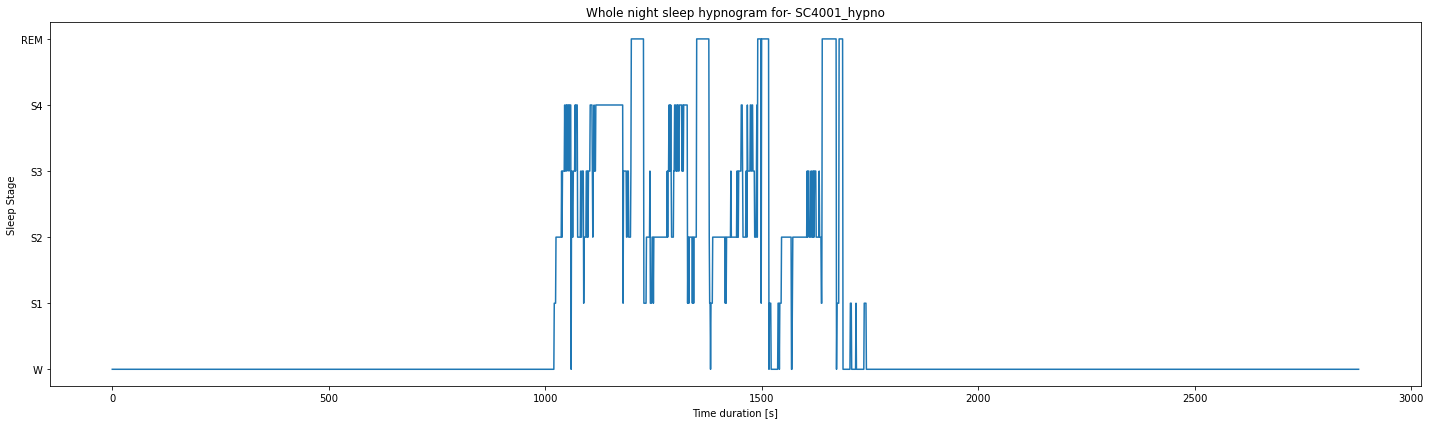

In [585]:
# list_of_files[0]
save_file_name_test, annot_df_test = get_annot_data_for_hypnogram(all_annot_df, "SC4001") 
draw_hypnogram(save_file_name_test, annot_df_test) 

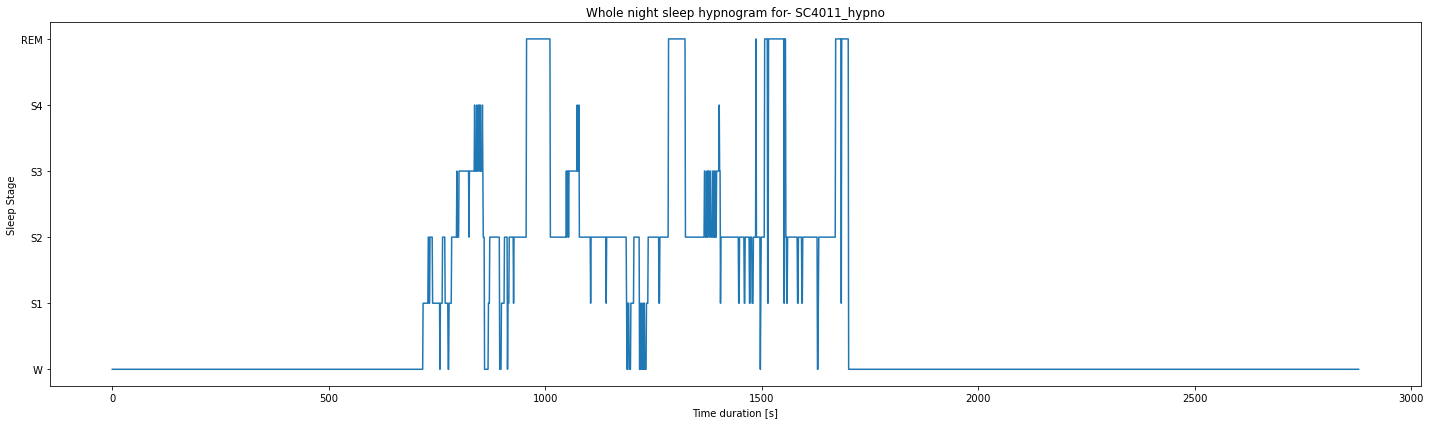

In [586]:
# list_of_files[3]
save_file_name_test, annot_df_test = get_annot_data_for_hypnogram(all_annot_df, "SC4011") 
draw_hypnogram(save_file_name_test, annot_df_test) 

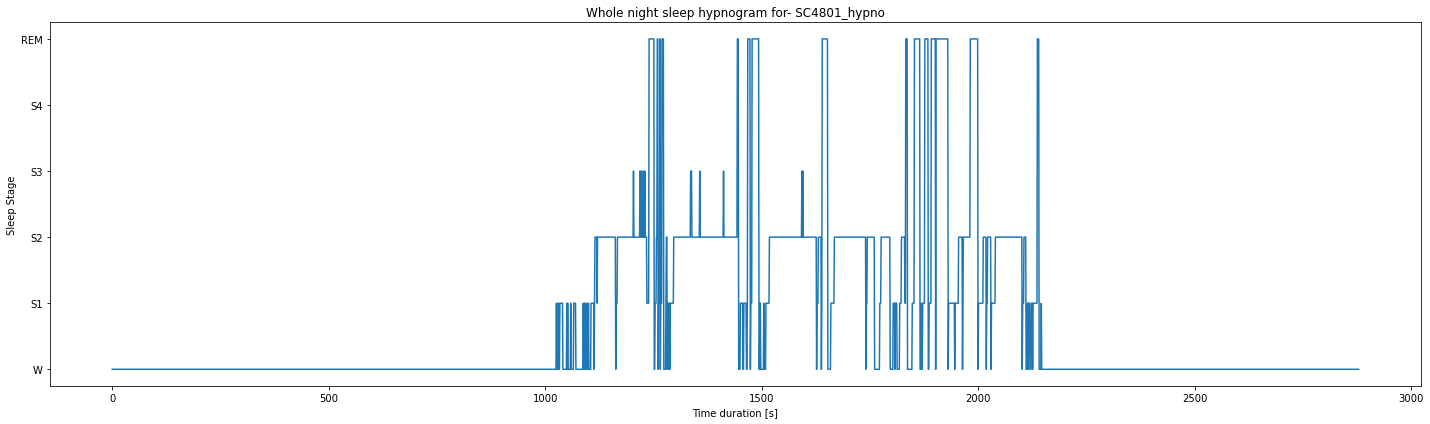

In [587]:
# list_of_files[92]
save_file_name_test, annot_df_test = get_annot_data_for_hypnogram(all_annot_df, "SC4801") 
draw_hypnogram(save_file_name_test, annot_df_test) 

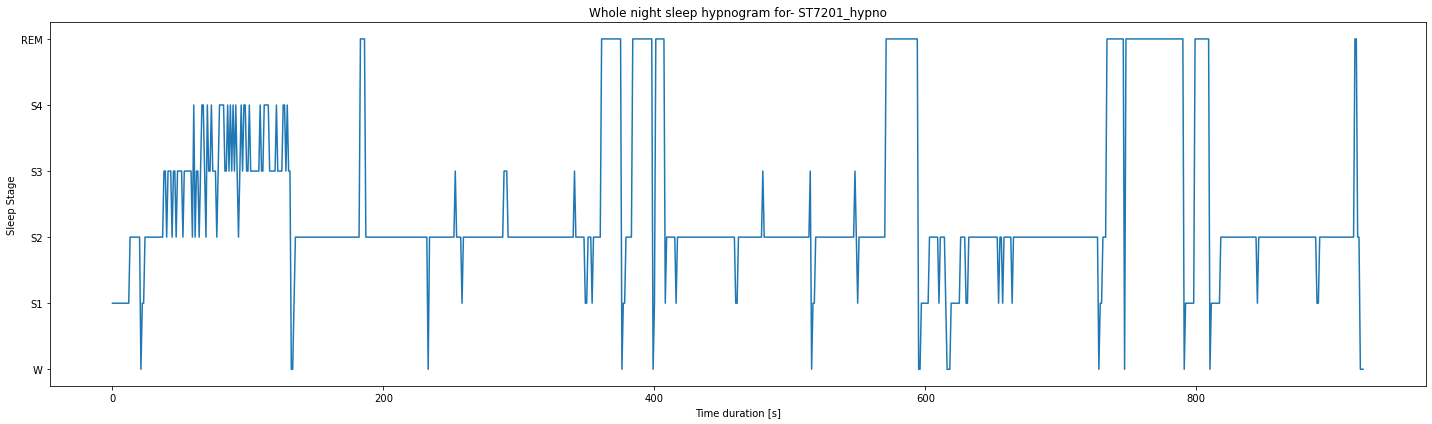

In [588]:
save_file_name_test, annot_df_test = get_annot_data_for_hypnogram(all_annot_df, "ST7201") #all_annot_df[all_annot_df['Category']=='ST7201']
draw_hypnogram(save_file_name_test, annot_df_test) 

## Sequence calculation - Save annotation sequence

In [534]:
all_annot_df

,File_Name,Category,Subject_ID,Sleep Stage,Position,Time [hh:mm:ss],Event,Duration [s],Location,Event Type,Event Level,Signal Type,Channel
0,SC4001,n,0,W,Unknown,00:00:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
1,SC4001,n,0,W,Unknown,00:00:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
2,SC4001,n,0,W,Unknown,00:01:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
3,SC4001,n,0,W,Unknown,00:01:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
4,SC4001,n,0,W,Unknown,00:02:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483414,ST7242,n,24,S2,Unknown,08:07:00,SLEEP-S2,30.0,Unknown,SLEEP,S2,JO,Unknown
483415,ST7242,n,24,S2,Unknown,08:07:30,SLEEP-S2,30.0,Unknown,SLEEP,S2,JO,Unknown
483416,ST7242,n,24,W,Unknown,08:08:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,JO,Unknown
483417,ST7242,n,24,W,Unknown,08:08:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,JO,Unknown


In [535]:
def sequencer_func(x):
    result = {"File_Name":x["File_Name"].head(1).values[0], "Category":x["Category"].head(1).values[0], "Subject_ID":x["Subject_ID"].head(1).values[0], "Stages":x["Sleep Stage Number"].head(1).values[0], "Count": x.shape[0], "Time": x["Duration [s]"].sum()}
    return pd.Series(result, name="index")


def get_annotation_sequence(annot_df):
    # print(annot_df.columns)
    annot_df["Sleep Stage Number"] = annot_df["Sleep Stage"]
    annot_df["Stage Count"] = (annot_df["Sleep Stage Number"] != annot_df["Sleep Stage Number"].shift(1)).cumsum()
    annot_seq_df = annot_df.groupby("Stage Count",as_index=False).apply(sequencer_func)
    annot_seq_df.insert(loc=4, column="Sequence", value=annot_seq_df["Stage Count"].values.tolist())
    annot_seq_df = annot_seq_df.drop("Stage Count", axis=1)
    return annot_seq_df

In [536]:
def get_all_annotation_sequence():
    all_annot_seq_df = pd.DataFrame()
    for file in list_of_files:
        save_file_name, annot_df = get_annot_data_for_hypnogram(all_annot_df, file) 
        annot_seq_df = get_annotation_sequence(annot_df.copy()) 
        
        # print('======', save_file_name, "shape", annot_seq_df.shape)
        all_annot_seq_df = pd.concat([all_annot_seq_df, annot_seq_df], axis=0)
    return all_annot_seq_df

In [537]:
all_annot_seq_df = get_all_annotation_sequence()
all_annot_seq_df

index,File_Name,Category,Subject_ID,Sequence,Stages,Count,Time
0,SC4001,n,0,1,W,1021,30630.0
1,SC4001,n,0,2,S1,4,120.0
2,SC4001,n,0,3,S2,13,390.0
3,SC4001,n,0,4,S3,1,30.0
4,SC4001,n,0,5,S2,1,30.0
...,...,...,...,...,...,...,...
141,ST7242,n,24,142,R,46,1380.0
142,ST7242,n,24,143,W,1,30.0
143,ST7242,n,24,144,S1,2,60.0
144,ST7242,n,24,145,S2,103,3090.0


In [538]:
all_annot_seq_df

index,File_Name,Category,Subject_ID,Sequence,Stages,Count,Time
0,SC4001,n,0,1,W,1021,30630.0
1,SC4001,n,0,2,S1,4,120.0
2,SC4001,n,0,3,S2,13,390.0
3,SC4001,n,0,4,S3,1,30.0
4,SC4001,n,0,5,S2,1,30.0
...,...,...,...,...,...,...,...
141,ST7242,n,24,142,R,46,1380.0
142,ST7242,n,24,143,W,1,30.0
143,ST7242,n,24,144,S1,2,60.0
144,ST7242,n,24,145,S2,103,3090.0


In [539]:
# all_annot_seq_df.to_csv(f"{result_directory}/annot_sequence.csv", index=False)

## Transition analysis

### Annotation to transition sequence (successive annotations are merged) conversion

In [540]:
all_annot_seq_df = pd.read_csv(f"{result_directory}/annot_sequence.csv")
all_annot_seq_df

,File_Name,Category,Subject_ID,Sequence,Stages,Count,Time
0,SC4001,n,0,1,W,1021,30630.0
1,SC4001,n,0,2,S1,4,120.0
2,SC4001,n,0,3,S2,13,390.0
3,SC4001,n,0,4,S3,1,30.0
4,SC4001,n,0,5,S2,1,30.0
...,...,...,...,...,...,...,...
28336,ST7242,n,24,142,R,46,1380.0
28337,ST7242,n,24,143,W,1,30.0
28338,ST7242,n,24,144,S1,2,60.0
28339,ST7242,n,24,145,S2,103,3090.0


In [551]:
# all_annot_seq_df.Stages.unique()

In [543]:
# all_annot_seq_df['next_code'] = all_annot_seq_df.groupby('Subject_ID')['Stages'].shift(-1, fill_value="W")
# # all_annot_seq_df['next_code'] = all_annot_seq_df.groupby('Subject_ID')['Stages'].shift(-1).fillna('END')
# all_annot_seq_df

In [545]:
# all_annot_seq_df[(all_annot_seq_df['File_Name']=="ST7201")]

In [552]:
# all_annot_seq_df.insert(loc=5, column="Next_Stages", value=all_annot_seq_df["next_code"].values.tolist())
# all_annot_seq_df = all_annot_seq_df.drop("next_code", axis=1)
# all_annot_seq_df

In [553]:
# all_annot_seq_df

In [554]:
# all_annot_seq_df.Next_Stages.unique()

In [555]:
# all_annot_seq_df[(all_annot_seq_df['File_Name']=="ST7201")]

In [550]:
# all_annot_seq_df.to_csv(f"{result_directory}/transition_sequence.csv", index=False)

### Transition count, probability and duration matrix

In [609]:
def fill_missing_stage_values(arr, indx):
    
    for i in indx: 
        column_to_be_added = np.zeros(arr.shape[0])
        arr2 = np.insert(arr, i, column_to_be_added, axis=0)
        column_to_be_added = np.zeros(arr.shape[0]+1)
        arr3 = np.insert(arr2, i, column_to_be_added, axis=1)
        arr = arr3.copy()
    return arr.tolist()


def create_zero_matrix(n, st):
    mat = None
    if n>1:
        inmat = [0 for _ in range(n)]
        tmpmat = inmat.copy()
        for i in range(st-1):
            inmat = [copy.deepcopy(inmat) for _ in range(n)]
        mat = copy.deepcopy(inmat)
    else:
        print("\nNo transition is set...")
    return mat

def create_transition_matrix(transitions, duration, tran_count, tran_dura, tran_step=2):
    # now get transition count and duration
    for i, (t, d) in enumerate(zip(transitions[:-(tran_step-1)], duration[:-(tran_step-1)])):
        stats = f"{t}"
        # print(t)        
        tmp_count = f"tran_count[{t}]" 
        tmp_dura = f"tran_dura[{t}]" 
        for j in range(tran_step-1):
            nt = transitions[i+j+1]
            stats += f"->{nt}"
            # print(nt)            
            tmp_count = f"{tmp_count}[{nt}]"
            tmp_dura = f"{tmp_dura}[{nt}]"  
            if (tran_step>2) and j<(tran_step-2):
                d += duration[i+j+1]
            
        exec(f"tc={tmp_count}+{1}")
        exec(f"td={tmp_dura}+{d}")  
        tmp_count = f"{tmp_count}={tmp_count}+{1}"
        tmp_dura = f"{tmp_dura}={tmp_dura}+{d}"  
        # print("=======\n", tmp_count, tmp_dura)
        exec(tmp_count)
        exec(tmp_dura)           
        # exec("print(tc)")
        # print(t, stats, tmp_count, tmp_dura, "\n================\n")
        # print(stats, tc, td, "\n================\n")
        # print("=======\n", tran_count, tran_dura)
    return tran_count, tran_dura


def create_transition_probability_for_a_matrix(tran_p):    
    tran_proba = tran_p.copy() 
    for row in tran_proba:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row] 
    return tran_proba


def create_transition_probability(tran_p):    
    tran_proba = []     
    if type(tran_p[0][0])!=list:
        ttp = create_transition_probability_for_a_matrix(tran_p)
        # tran_proba.append(ttp)
        return ttp
    for i, tp in enumerate(tran_p):
        ttp = create_transition_probability(tp)   
        tran_proba.append(ttp)
    return tran_proba


def print_a_matrix(tran_info, decimal):
    # print(tran_info)
    num_digits = len(str( np.amax(np.array(tran_info)) ))
    formatter_str = '{0:'+str(num_digits+4)+'.2f}' if decimal else '{0:'+str(num_digits+2)+'}' 
    for row in tran_info: print(' '.join(formatter_str.format(x) for x in row)) 
        
        
def print_nested_matrix(big_mat, decimal, msg=None):
    if type(big_mat[0][0])!=list:
        print_a_matrix(big_mat, decimal)
        return 
    for i, mat in enumerate(big_mat):
        mm = f"stage{i}->" if not msg else f"{msg}stage{i}->"
        print(mm)
        print_nested_matrix(mat, decimal, msg=mm)        


def print_transition_info(tran_info, decimal=False, tran_step=2): 
    original_sleep_stages = sleep_stage_labels_dict 
    tr_st = "->".join(f"step{i}" for i in range(1, tran_step+1))
    print(f"{tran_step} Step transition ({tr_st}). The index of the data corresponds to the sleep stages: {original_sleep_stages}")
    if tran_step<2:
        print("Wrong transition matrix...")
    else:
        print_nested_matrix(tran_info, decimal)
        


# Markov transition probability matrix
# https://stackoverflow.com/questions/46657221/generating-markov-transition-matrix-in-python#:~:text=In%20order%20to%20obtain%20a,transpose()%20.
def transition_count_and_probability_matrix(all_annot_df, missing_labels, sleep_label_column, duration_column, tran_step=2, show_results=False):
    transitions = all_annot_df[sleep_label_column].values  
    duration = all_annot_df[duration_column].values 
    original_sleep_stages = list(sleep_stage_labels_dict.keys())
    ind = list([original_sleep_stages.index(ss) for ss in missing_labels])
    ind.sort()
    # print("1111---", ind, missing_labels)
    tran_count = None 
    tran_dura = None 
    tran_proba = None
    # n = 1+ max(transitions) #number of states
    n = len(list(sleep_stage_labels_dict.keys()))
    
    tran_count = create_zero_matrix(n, tran_step)
    tran_dura = create_zero_matrix(n, tran_step)
    # print("000---", n, no_of_stats_in_transition, np.unique(transitions), tran_count, tran_dura)
    u_stg = np.unique(transitions) 
    
    print(f"Transition steps: {tran_step}")
    print(f"Original stages: {sleep_stage_labels_dict}")
    print(f"Unique sleep stages available: {u_stg}")
    print(f"| {[original_sleep_stages[si] for si in u_stg]}")
    print(f"| {u_stg}")
    print(f"Transition steps: {tran_step}, Original stages: {sleep_stage_labels_dict}, Unique sleep stages available: {u_stg} | {[original_sleep_stages[si] for si in u_stg]}")
    
    print(f"Transition steps: {tran_step}, Original stages: {sleep_stage_labels_dict}, Unique sleep stages available: {u_stg} | {[original_sleep_stages[si] for si in u_stg]}")
    
    # now get transition count and duration
    tran_count, tran_dura = create_transition_matrix(transitions, duration, tran_count, tran_dura, tran_step=tran_step)
    
    # now convert to probabilities
    tran_proba = create_transition_probability(copy.deepcopy(tran_count))
    ##########################################################################################
    if show_results:
        # print(f"\nTransition Count: {(no_of_stats_in_transition)}")
        print(f"\nTransition Count\n====================================")
        print_transition_info(tran_count, tran_step=tran_step)  

        # print(f"\nTransition Duration: {(no_of_stats_in_transition)}")
        print(f"\nTransition Duration\n====================================")
        print_transition_info(tran_dura, tran_step=tran_step)  

        # print(f"\nTransition Probability: {(no_of_stats_in_transition)}")
        print(f"\nTransition Probability\n====================================")
        print_transition_info(tran_proba, decimal=True, tran_step=tran_step)
    
    #Deal with missing data    
    #original_sleep_stages = list(sleep_stage_labels_dict.keys())
    #print("2222-", len(tran_count), len(tran_proba), len(tran_dura))
    
    return tran_count, tran_proba, tran_dura

In [603]:
# all_annot_df
# tmp_df = all_annot_df[all_annot_df['File_Name']=='ST7201']#.iloc[50:100, :].copy()

# count, proba, dura = transition_count_and_probability_matrix(tmp_df, [], sleep_label_column="Sleep Stage Label", duration_column="Duration [s]", tran_step=2) 

In [604]:
# count
# # tmp_df = all_annot_df[all_annot_df['File_Name']=='ST7201'] 
# # tmp_df 
# # # all_annot_df["Sleep Stage"].values.unique()
# # # all_annot_df["Sleep Stage"].values
# # # np.unique(transitions) 
# # all_annot_df

In [606]:
# count, proba, dura = transition_count_and_probability_matrix(tmp_df, [], sleep_label_column="Sleep Stage Label", duration_column="Duration [s]", tran_step=2, show_results=True) 

In [ ]:
# tmp_df[modified_label].values
# %whos


# def addition(string):
#     exec(string)
# #     return d
# addition("a=10\nb=11\nd=a+b")
# d

In [611]:
##3 TEST PURPOSE
# tmp_df = all_annot_df.copy()
tmp_df = all_annot_df.iloc[275:300, :].copy()
# tmp_df = all_annot_df[all_annot_df['File_Name']=='ST7201'].iloc[250:300, :].copy()
tmp_df = all_annot_df[all_annot_df['File_Name']=='ST7201'].iloc[250:300, :].copy()
# tmp_df = all_annot_df[all_annot_df['File_Name']=='ST7201'].iloc[270:290, :].copy()
# tmp_df = all_annot_df[all_annot_df['File_Name']=='ST7201'].iloc[700:790, :].copy()
tmp_df

modified_label = "Sleep Stage Label"
tmp_df[modified_label] = tmp_df["Sleep Stage"]
tmp_stage_names = sleep_stage_name_to_value_conversion(list(tmp_df[modified_label].unique()))
tmp_df.replace({modified_label: tmp_stage_names}, inplace=True)
tmp_df

count, proba, dura = transition_count_and_probability_matrix(tmp_df, [], sleep_label_column="Sleep Stage Label", duration_column="Duration [s]", tran_step=2, show_results=True) 
# count, proba, dura = transition_count_and_probability_matrix(tmp_df, ['REM'], sleep_label_column="Sleep Stage Label", duration_column="Duration [s]") 

Transition steps: 2
Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
Unique sleep stages available: [1 2 3]
| ['S1', 'S2', 'S3']
| [1 2 3]
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [1 2 3] | ['S1', 'S2', 'S3']
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [1 2 3] | ['S1', 'S2', 'S3']

Transition Count
2 Step transition (step1->step2). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
   0    0    0    0    0    0
   0    0    1    0    0    0
   0    1   41    2    0    0
   0    0    2    2    0    0
   0    0    0    0    0    0
   0    0    0    0    0    0

Transition Duration
2 Step transition (step1->step2). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
       0        0      

In [612]:
sleep_stage_labels_dict

{'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}

### Get annotation data for transition matrix

In [613]:
all_annot_df =  pd.read_csv(f"{result_directory}/all_annotions.csv")
all_annot_df

,File_Name,Category,Subject_ID,Sleep Stage,Position,Time [hh:mm:ss],Event,Duration [s],Location,Event Type,Event Level,Signal Type,Channel
0,SC4001,n,0,W,Unknown,00:00:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
1,SC4001,n,0,W,Unknown,00:00:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
2,SC4001,n,0,W,Unknown,00:01:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
3,SC4001,n,0,W,Unknown,00:01:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
4,SC4001,n,0,W,Unknown,00:02:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,EC,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483414,ST7242,n,24,S2,Unknown,08:07:00,SLEEP-S2,30.0,Unknown,SLEEP,S2,JO,Unknown
483415,ST7242,n,24,S2,Unknown,08:07:30,SLEEP-S2,30.0,Unknown,SLEEP,S2,JO,Unknown
483416,ST7242,n,24,W,Unknown,08:08:00,SLEEP-S0,30.0,Unknown,SLEEP,S0,JO,Unknown
483417,ST7242,n,24,W,Unknown,08:08:30,SLEEP-S0,30.0,Unknown,SLEEP,S0,JO,Unknown


### Create and save transition count, probability and duration - for annotation and sequence (successive annotations are merged)

In [614]:
list(sleep_stage_labels_dict.keys()), list(sleep_stage_names_dict.keys()), 

(['W', 'S1', 'S2', 'S3', 'S4', 'REM'], ['W', 'S1', 'S2', 'S3', 'S4', 'R'])

In [ ]:
# def organise_sleep_stage_transition_matrix(m, stage_names = list(sleep_stage_labels_dict.keys())):
#     # sleep_stage_labels = ['W', 'S1', 'S2', 'S3', 'S4', 'REM', 'ART']
    
#     # print("3333-", len(m), len(m[0]), len(stage_names))
    
#     transition_matrix_df = pd.DataFrame(columns=stage_names, data=m)
#     transition_matrix_df.index = stage_names
    
#     return transition_matrix_df

In [615]:
def organise_a_matrix(tran_info, stage_names, from_stages=None):
    if from_stages==None:
        for i, ti in enumerate(tran_info):
            ti.insert(0, stage_names[i+1])
    else:
        for i, ti in enumerate(tran_info):
            ti.insert(0, f"{from_stages}{stage_names[i+1]}")
    t_mat = pd.DataFrame(columns=stage_names, data=tran_info)
    print(t_mat)
    return t_mat
        
        
def organise_transition_matrix(big_mat, msg=None, tran_step=2, timer=2, stage_names=[]):
    original_sleep_stages_names = list(sleep_stage_labels_dict.keys())
    tran_mat_df = pd.DataFrame()
    original_sleep_stages = sleep_stage_labels_dict
    if type(big_mat[0][0])!=list:
        t_mat = organise_a_matrix(big_mat, stage_names=stage_names, from_stages=msg)
        return t_mat
    for i, mat in enumerate(big_mat):
        mm = f"{original_sleep_stages_names[i]}->" if not msg else f"{msg}{original_sleep_stages_names[i]}->"  
        print(f"### Transition from: {mm}")
        t_mat = organise_transition_matrix(mat, msg=mm, tran_step=tran_step, timer=timer-1, stage_names=stage_names)
        tran_mat_df = pd.concat([tran_mat_df, t_mat])
    return tran_mat_df
        

def organise_sleep_stage_transition_matrix(tran_info, stage_names = ["From"]+list(sleep_stage_labels_dict.keys()), tran_step=2):
    transition_matrix_df = pd.DataFrame()
    print(stage_names)
    
    original_sleep_stages = sleep_stage_labels_dict 
#     original_sleep_stages = list(sleep_stage_labels_dict.keys())
    tr_st = "->".join(f"step{i}" for i in range(1, tran_step+1))
    print(f"{tran_step} Step transition ({tr_st}). The index of the data corresponds to the sleep stages: {original_sleep_stages}")
    if tran_step<2:
        print("Wrong transition matrix...")
    else:
        transition_matrix_df = organise_transition_matrix(tran_info, tran_step=tran_step, timer=tran_step, stage_names=stage_names)
#         transition_matrix_df.index = stage_names
    
    return transition_matrix_df

In [616]:
def create_and_save_transition_information(all_annot_df, sleep_label_column, duration_column, save_path, file_name, tran_step=2):
    modified_label = "Sleep Stage Number"
    all_annot_df[modified_label] = all_annot_df[sleep_label_column]
    available_stages = list(all_annot_df[modified_label].unique())
    original_sleep_stages = list(sleep_stage_labels_dict.keys())
    missing_labels = list( set(original_sleep_stages).difference(set(available_stages)) )
    tmp_stage_names = sleep_stage_name_to_value_conversion(available_stages)
    print("===", file_name, available_stages, sleep_label_column, missing_labels, tmp_stage_names)
#     sleep_stage_labels_dict
    all_annot_df.replace({modified_label: tmp_stage_names}, inplace=True)
    
    count, proba, dura = transition_count_and_probability_matrix(all_annot_df, missing_labels, sleep_label_column=modified_label, duration_column=duration_column, tran_step=tran_step, show_results=False) 
    
    print("Processing for saving\n===================================")
    
    file_path = f"{save_path}/{file_name}_transition{tran_step}"
    
    print(f"\nTransition Count\n====================================")
    count_df = organise_sleep_stage_transition_matrix(count, tran_step=tran_step)
    print(f"\nTransition Duration\n====================================")
    dura_df = organise_sleep_stage_transition_matrix(dura, tran_step=tran_step)
    print(f"\nTransition Probability\n====================================")
    proba_df = organise_sleep_stage_transition_matrix(proba, tran_step=tran_step)
    
    print("Started saving\n===================================")
    count_df.to_csv(f"{file_path}_count.csv", index=False)
    dura_df.to_csv(f"{file_path}_dura.csv", index=False)
    proba_df.to_csv(f"{file_path}_proba.csv", index=False)
    print("Finished saving\n===================================")
    
    return count_df, proba_df, dura_df


In [ ]:
# count, proba, dura = create_and_save_transition_information(tmp_df, sleep_label_column="Sleep Stage", duration_column="Duration [s]", 
#                                                             save_path=f"{result_directory}/Transition_Matrices", file_name="test_annot", tran_step=2) 


In [690]:
count, proba, dura = create_and_save_transition_information(all_annot_df, sleep_label_column="Sleep Stage", duration_column="Duration [s]", 
                                                            save_path=f"{result_directory}/Transition_Matrices", file_name="all_annot", tran_step=2) 
all_matrices = {'all_annot': (count, proba, dura)}

=== all_annot ['W', 'S1', 'S2', 'S3', 'S4', 'R'] Sleep Stage ['REM'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5}
Transition steps: 2
Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
Unique sleep stages available: [0 1 2 3 4 5]
| ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
| [0 1 2 3 4 5]
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [0 1 2 3 4 5] | ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [0 1 2 3 4 5] | ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
Processing for saving

Transition Count
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
2 Step transition (step1->step2). The index of t

In [678]:
count

,From,W,S1,S2,S3,S4,REM
0,W,311168,4058,250,10,0,136
1,S1,2264,17883,4268,9,0,751
2,S2,1350,2232,80812,3509,37,1043
3,S3,149,83,3142,7371,1425,21
4,S4,52,21,96,1291,5801,2
5,REM,639,898,415,1,0,32231


In [692]:
def create_and_save_cat_transition_information(all_annot_df, sleep_label_column, duration_column, save_path, file_name, tran_step=2):
    disease_names = ["n"]
    all_matrices = {}
    
    for dis in disease_names:
        print(f"Creating and saving the transition matrices for {dis}")
        tmp_annot_df = all_annot_df[(all_annot_df["Category"]==dis)].copy()
        file_name1 = f"{file_name}_{dis}"
        count, proba, dura = create_and_save_transition_information(tmp_annot_df, sleep_label_column=sleep_label_column, duration_column=duration_column, save_path=save_path, file_name=file_name1, tran_step=tran_step) 
        all_matrices[dis] = (count, proba, dura)
    return all_matrices


In [693]:
cat_matrices = create_and_save_cat_transition_information(all_annot_df, sleep_label_column="Sleep Stage", duration_column="Duration [s]", 
                                                          save_path=f"{result_directory}/Transition_Matrices", file_name="cat_annot", tran_step=2)


Creating and saving the transition matrices for n
=== cat_annot_n ['W', 'S1', 'S2', 'S3', 'S4', 'R'] Sleep Stage ['REM'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5}
Transition steps: 2
Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
Unique sleep stages available: [0 1 2 3 4 5]
| ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
| [0 1 2 3 4 5]
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [0 1 2 3 4 5] | ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [0 1 2 3 4 5] | ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
Processing for saving

Transition Count
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'RE

In [694]:
def create_and_save_record_transition_information(all_annot_df, sleep_label_column, duration_column, save_path, file_name, tran_step=2):
    record_names = ["SC", "ST"]
    all_matrices = {}
    
    for dis in record_names:
        print(f"Creating and saving the transition matrices for {dis}")
        tmp_annot_df = all_annot_df[(all_annot_df["File_Name"].str.startswith(dis, na=False))].copy()
        file_name1 = f"{file_name}_{dis}"
        count, proba, dura = create_and_save_transition_information(tmp_annot_df, sleep_label_column=sleep_label_column, duration_column=duration_column, save_path=save_path, file_name=file_name1, tran_step=tran_step) 
        all_matrices[dis] = (count, proba, dura)
    return all_matrices


In [695]:
record_matrices = create_and_save_record_transition_information(all_annot_df, sleep_label_column="Sleep Stage", duration_column="Duration [s]", 
                                                          save_path=f"{result_directory}/Transition_Matrices", file_name="record_annot", tran_step=2)


Creating and saving the transition matrices for SC
=== record_annot_SC ['W', 'S1', 'S2', 'S3', 'S4', 'R'] Sleep Stage ['REM'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5}
Transition steps: 2
Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
Unique sleep stages available: [0 1 2 3 4 5]
| ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
| [0 1 2 3 4 5]
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [0 1 2 3 4 5] | ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [0 1 2 3 4 5] | ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
Processing for saving

Transition Count
['From', 'W', 'S1', 'S2', 'S3', 'S4'

In [ ]:
# list_of_files

In [698]:
def create_and_save_subject_transition_information(all_annot_df, sleep_label_column, duration_column, save_path, file_name, tran_step=2):
    all_matrices = {}
    
    list_of_subj = []
    list_of_subj = [ss[:-1] for ss in list_of_files]
    list_of_subj = list( np.unique( np.array(list_of_subj) ) )
#     print(list_of_subj)
    
    for init_file in list_of_subj:
#         file_set = [ss for ss in list_of_files for jj in list_of_subj if ss.startswith(jj)]
        r = re.compile(f"^{init_file}\d")
        file_set = list( filter(r.match, list_of_files) ) 
        print(f"Creating and saving the transition matrices for fileset: {init_file} | {file_set}")
        
        tmp_annot_df = pd.DataFrame() 
        for file in file_set:
            print(f"Creating and saving the transition matrices for {file}")
            tmp_df = all_annot_df[(all_annot_df["File_Name"]==file)].copy()
            tmp_annot_df = pd.concat([tmp_annot_df, tmp_df])
            
        file_name1 = f"{file_name}_{init_file}"
        count, proba, dura = create_and_save_transition_information(tmp_annot_df, sleep_label_column=sleep_label_column, duration_column=duration_column, save_path=save_path, file_name=file_name1, tran_step=tran_step) 
        all_matrices[file] = (count, proba, dura)
    return all_matrices

In [ ]:
sub_matrices = create_and_save_subject_transition_information(all_annot_df, sleep_label_column="Sleep Stage", duration_column="Duration [s]", 
                                                                          save_path=f"{result_directory}/Transition_Matrices", file_name="sub_annot", tran_step=2)


In [700]:
def create_and_save_file_transition_information(all_annot_df, sleep_label_column, duration_column, save_path, file_name, tran_step=2):
    all_matrices = {}
    
    for file in list_of_files:
        print(f"Creating and saving the transition matrices for {file}")
        tmp_annot_df = all_annot_df[(all_annot_df["File_Name"]==file)].copy()
        file_name1 = f"{file_name}_{file}"
        count, proba, dura = create_and_save_transition_information(tmp_annot_df, sleep_label_column=sleep_label_column, duration_column=duration_column, save_path=save_path, file_name=file_name1, tran_step=tran_step) 
        all_matrices[file] = (count, proba, dura)
    return all_matrices

In [ ]:
file_matrices = create_and_save_file_transition_information(all_annot_df, sleep_label_column="Sleep Stage", duration_column="Duration [s]", 
                                                                          save_path=f"{result_directory}/Transition_Matrices", file_name="file_annot", tran_step=2)


In [ ]:
all_annot_df

##### For sequence's transition

In [702]:
transition_seq_df = pd.read_csv(f"{result_directory}/transition_sequence.csv")
transition_seq_df

,File_Name,Category,Subject_ID,Sequence,Stages,Next_Stages,Count,Time
0,SC4001,n,0,1,W,S1,1021,30630.0
1,SC4001,n,0,2,S1,S2,4,120.0
2,SC4001,n,0,3,S2,S3,13,390.0
3,SC4001,n,0,4,S3,S2,1,30.0
4,SC4001,n,0,5,S2,S3,1,30.0
...,...,...,...,...,...,...,...,...
28336,ST7242,n,24,142,R,W,46,1380.0
28337,ST7242,n,24,143,W,S1,1,30.0
28338,ST7242,n,24,144,S1,S2,2,60.0
28339,ST7242,n,24,145,S2,W,103,3090.0


In [703]:
count2, proba2, dura2 = create_and_save_transition_information(transition_seq_df, sleep_label_column="Stages", duration_column="Time", 
                                                               save_path=f"{result_directory}/Transition_Matrices", file_name="all_tran", tran_step=2) 
all_tran_matrices = {'all_tran': (count2, proba2, dura2)}

=== all_tran ['W', 'S1', 'S2', 'S3', 'S4', 'R'] Stages ['REM'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5}
Transition steps: 2
Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
Unique sleep stages available: [0 1 2 3 4 5]
| ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
| [0 1 2 3 4 5]
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [0 1 2 3 4 5] | ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [0 1 2 3 4 5] | ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
Processing for saving

Transition Count
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
2 Step transition (step1->step2). The index of the dat

In [ ]:
count2

In [704]:
cat_tran_matrices = create_and_save_cat_transition_information(transition_seq_df, sleep_label_column="Stages", duration_column="Time", 
                                                          save_path=f"{result_directory}/Transition_Matrices", file_name="cat_tran", tran_step=2)


Creating and saving the transition matrices for n
=== cat_tran_n ['W', 'S1', 'S2', 'S3', 'S4', 'R'] Stages ['REM'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5}
Transition steps: 2
Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
Unique sleep stages available: [0 1 2 3 4 5]
| ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
| [0 1 2 3 4 5]
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [0 1 2 3 4 5] | ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [0 1 2 3 4 5] | ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
Processing for saving

Transition Count
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
2 

In [ ]:
record_tran_matrices = create_and_save_record_transition_information(transition_seq_df, sleep_label_column="Stages", duration_column="Time", 
                                                          save_path=f"{result_directory}/Transition_Matrices", file_name="record_tran", tran_step=2)


In [ ]:
sub_tran_matrices = create_and_save_subject_transition_information(transition_seq_df, sleep_label_column="Stages", duration_column="Time", 
                                                          save_path=f"{result_directory}/Transition_Matrices", file_name="sub_tran", tran_step=2)


In [ ]:
file_tran_matrices = create_and_save_file_transition_information(transition_seq_df, sleep_label_column="Stages", duration_column="Time", 
                                                          save_path=f"{result_directory}/Transition_Matrices", file_name="file_tran", tran_step=2)


## Visualise transition matrix

### Visualise transition matrix - transition - n (control subjects) 

In [708]:
demography_details_df

,File_Name,Category,Subject_ID,Gender,Age
0,SC4001,n,0,F,33
1,SC4002,n,0,F,33
2,SC4011,n,1,F,33
3,SC4012,n,1,F,33
4,SC4021,n,2,F,26
...,...,...,...,...,...
192,ST7212,n,21,M,34
193,ST7221,n,22,F,56
194,ST7222,n,22,F,56
195,ST7241,n,24,M,48


In [709]:
list(demography_details_df["Category"].unique())

['n']

In [739]:
tran_step = 2
a1 = ["annot", "tran"]
print(a1)
annot_or_tran = a1[1] #"tran", "annot"
cat_list = [i for i in list(demography_details_df["Category"].unique())]
print("---", cat_list)
loc_list = [0, 2, 6, 15, 20, 60, 70, 92]
cal_loc_dict = dict(zip(cat_list, loc_list))
a2 = ["", "_sub"]+[f"_{i}" for i in cat_list]
print(a2)
all_or_cat_or_sub = a2[0] #"", "sub", i.e."ins"
# a3 = [f"_{i}" for i in list(demography_details_df["File_Name"])]
### For this special dataset, special treatment is applied
a3 = [f"_{i[:-1]}" for i in list(demography_details_df["File_Name"])]
# print(a3, cat_list)
# sub_type = "n"
# cat_ind = (cat_list.index(sub_type))
# st = loc_list[cat_ind] 
# en = len(a3) if st==loc_list[-1]  else loc_list[cat_ind+1] 
# print("+++++ ", st, en)
# subject = a3[ st:en ]
subject = [] 
for s in a3:
    if s not in subject:
        subject.append( s )
a4 = [f"_transition{tran_step}_count.csv", f"_transition{tran_step}_proba.csv", f"_transition{tran_step}_dura.csv"]
print(a4)
matrices_type = a4[0] #a4[0] #["_transition_count.csv", "_transition_proba.csv", "_transition_dura.csv"]
main_file_name_structure = f"{result_directory}/Transition_Matrices/sub_{annot_or_tran}{all_or_cat_or_sub}"
# f"{matrices_type}"
print(main_file_name_structure)

print('==========>', subject)

all_metrix_files = [] 
if len(subject)>0:
    for ss in subject:
        tstr = f"{main_file_name_structure}{ss}{matrices_type}"
        all_metrix_files.append(tstr)
else:
    tstr = f"{main_file_name_structure}{matrices_type}"
    all_metrix_files.append(tstr)
    
all_metrix_files

['annot', 'tran']
--- ['n']
['', '_sub', '_n']
['_transition2_count.csv', '_transition2_proba.csv', '_transition2_dura.csv']
./Results/Sleep_EDFX/Transition_Matrices/sub_tran
==========> ['_SC400', '_SC401', '_SC402', '_SC403', '_SC404', '_SC405', '_SC406', '_SC407', '_SC408', '_SC409', '_SC410', '_SC411', '_SC412', '_SC413', '_SC414', '_SC415', '_SC416', '_SC417', '_SC418', '_SC419', '_SC420', '_SC421', '_SC422', '_SC423', '_SC424', '_SC425', '_SC426', '_SC427', '_SC428', '_SC429', '_SC430', '_SC431', '_SC432', '_SC433', '_SC434', '_SC435', '_SC436', '_SC437', '_SC438', '_SC440', '_SC441', '_SC442', '_SC443', '_SC444', '_SC445', '_SC446', '_SC447', '_SC448', '_SC449', '_SC450', '_SC451', '_SC452', '_SC453', '_SC454', '_SC455', '_SC456', '_SC457', '_SC458', '_SC459', '_SC460', '_SC461', '_SC462', '_SC463', '_SC464', '_SC465', '_SC466', '_SC467', '_SC470', '_SC471', '_SC472', '_SC473', '_SC474', '_SC475', '_SC476', '_SC477', '_SC480', '_SC481', '_SC482', '_ST701', '_ST702', '_ST704', '_

['./Results/Sleep_EDFX/Transition_Matrices/sub_tran_SC400_transition2_count.csv',
 './Results/Sleep_EDFX/Transition_Matrices/sub_tran_SC401_transition2_count.csv',
 './Results/Sleep_EDFX/Transition_Matrices/sub_tran_SC402_transition2_count.csv',
 './Results/Sleep_EDFX/Transition_Matrices/sub_tran_SC403_transition2_count.csv',
 './Results/Sleep_EDFX/Transition_Matrices/sub_tran_SC404_transition2_count.csv',
 './Results/Sleep_EDFX/Transition_Matrices/sub_tran_SC405_transition2_count.csv',
 './Results/Sleep_EDFX/Transition_Matrices/sub_tran_SC406_transition2_count.csv',
 './Results/Sleep_EDFX/Transition_Matrices/sub_tran_SC407_transition2_count.csv',
 './Results/Sleep_EDFX/Transition_Matrices/sub_tran_SC408_transition2_count.csv',
 './Results/Sleep_EDFX/Transition_Matrices/sub_tran_SC409_transition2_count.csv',
 './Results/Sleep_EDFX/Transition_Matrices/sub_tran_SC410_transition2_count.csv',
 './Results/Sleep_EDFX/Transition_Matrices/sub_tran_SC411_transition2_count.csv',
 './Results/Slee

### Heatmap for transition matrix

In [740]:
# plt.rcParams["figure.figsize"] = (20,6)
# plt.rcParams["figure.figsize"] = (5,4)
plt.rcParams["figure.figsize"] = (25,20)
list(sleep_stage_names_dict.keys()), list(sleep_stage_labels_dict.keys())

(['W', 'S1', 'S2', 'S3', 'S4', 'R'], ['W', 'S1', 'S2', 'S3', 'S4', 'REM'])

In [752]:
result_directory

'./Results/Sleep_EDFX'

In [753]:
def plot_heatmap_for_transition_matrix(metrix_files, hms): 
    fig, axes = plt.subplots(4, 4)
    slp_lbl = list(sleep_stage_labels_dict.keys())

    for i, dat_file in enumerate(metrix_files):
        dat = pd.read_csv(dat_file)
        # print(dat.iloc[:, 1:].dtypes)
        data = dat.iloc[:, 1:].values 
        slp_lbl_y = dat.iloc[:, 0].values 
        x, y = (int)(i/4), i%4 
        # print(i, x, y, data)
        sns.heatmap(data, linewidth=0.5, ax=axes[x, y])
        axes[x, y].set_title( (dat_file.split("/")[-1]).split(".")[0] )
        axes[x, y].set_ylabel("Sleep Stage (from)")
        axes[x, y].set_xlabel("Sleep Stage (to)")
        axes[x, y].set_yticklabels(slp_lbl_y)
        #axes[x, y].set_yticklabels(slp_lbl)
        axes[x, y].set_xticklabels(slp_lbl) 
    fig.suptitle(f"Subjectwise heatmap-{hms} (a set of 16 subjects)", va='top', fontsize=20, y=1.0) 
    fig.savefig(f"{result_directory}/Analytical_Graphs/n_subjectwise_heatmap-{hms}.png") 
    fig.savefig(f"{result_directory}/Analytical_Graphs/n_subjectwise_heatmap-{hms}.pdf") 
    plt.tight_layout(pad=2.0)
    plt.show()
    plt.close()
    plt.clf()

Drawing heatmap for index 0:16


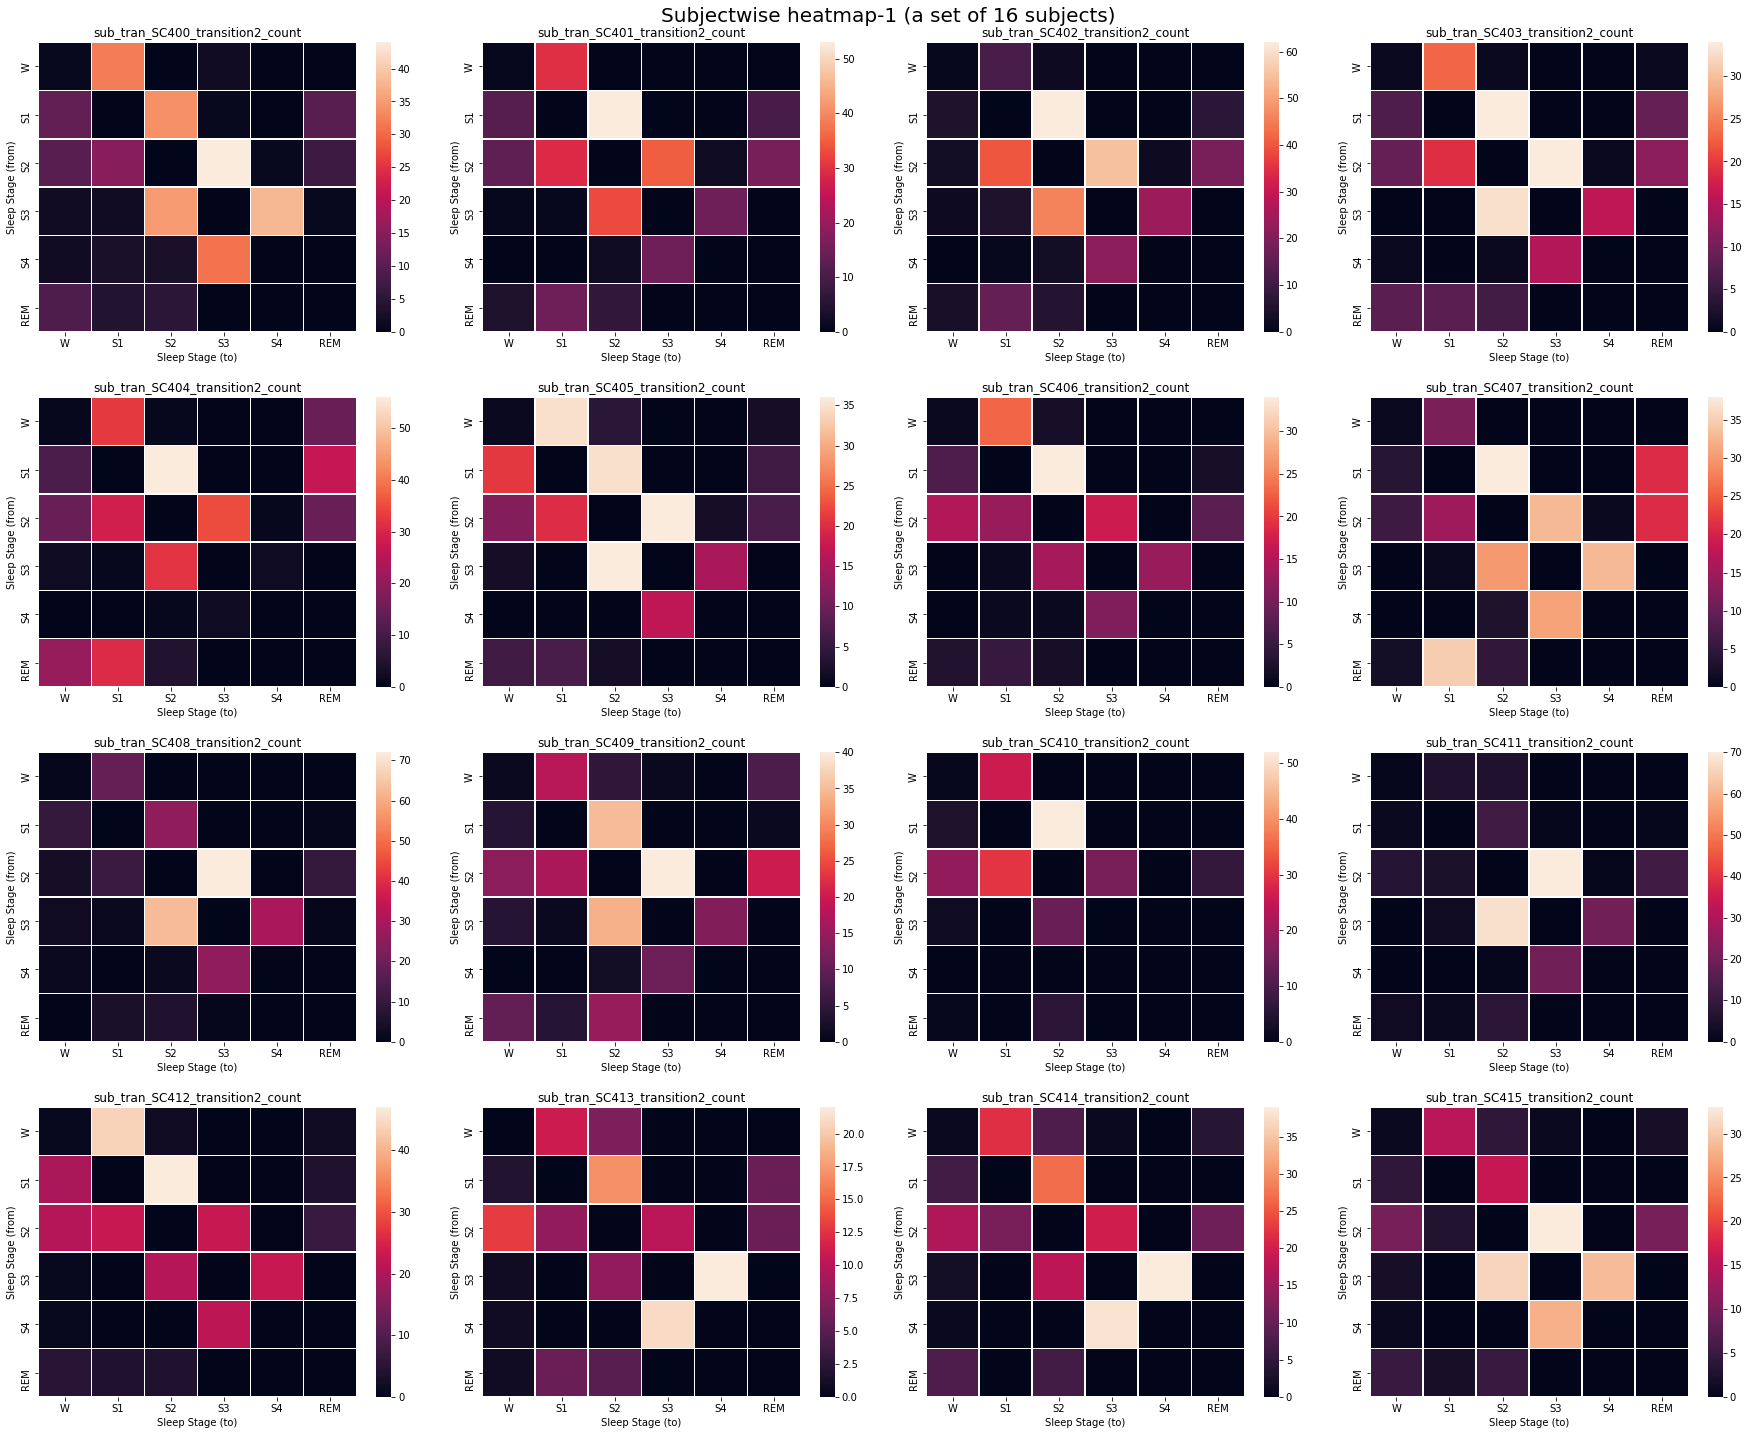

Drawing heatmap for index 16:32


<Figure size 1800x1440 with 0 Axes>

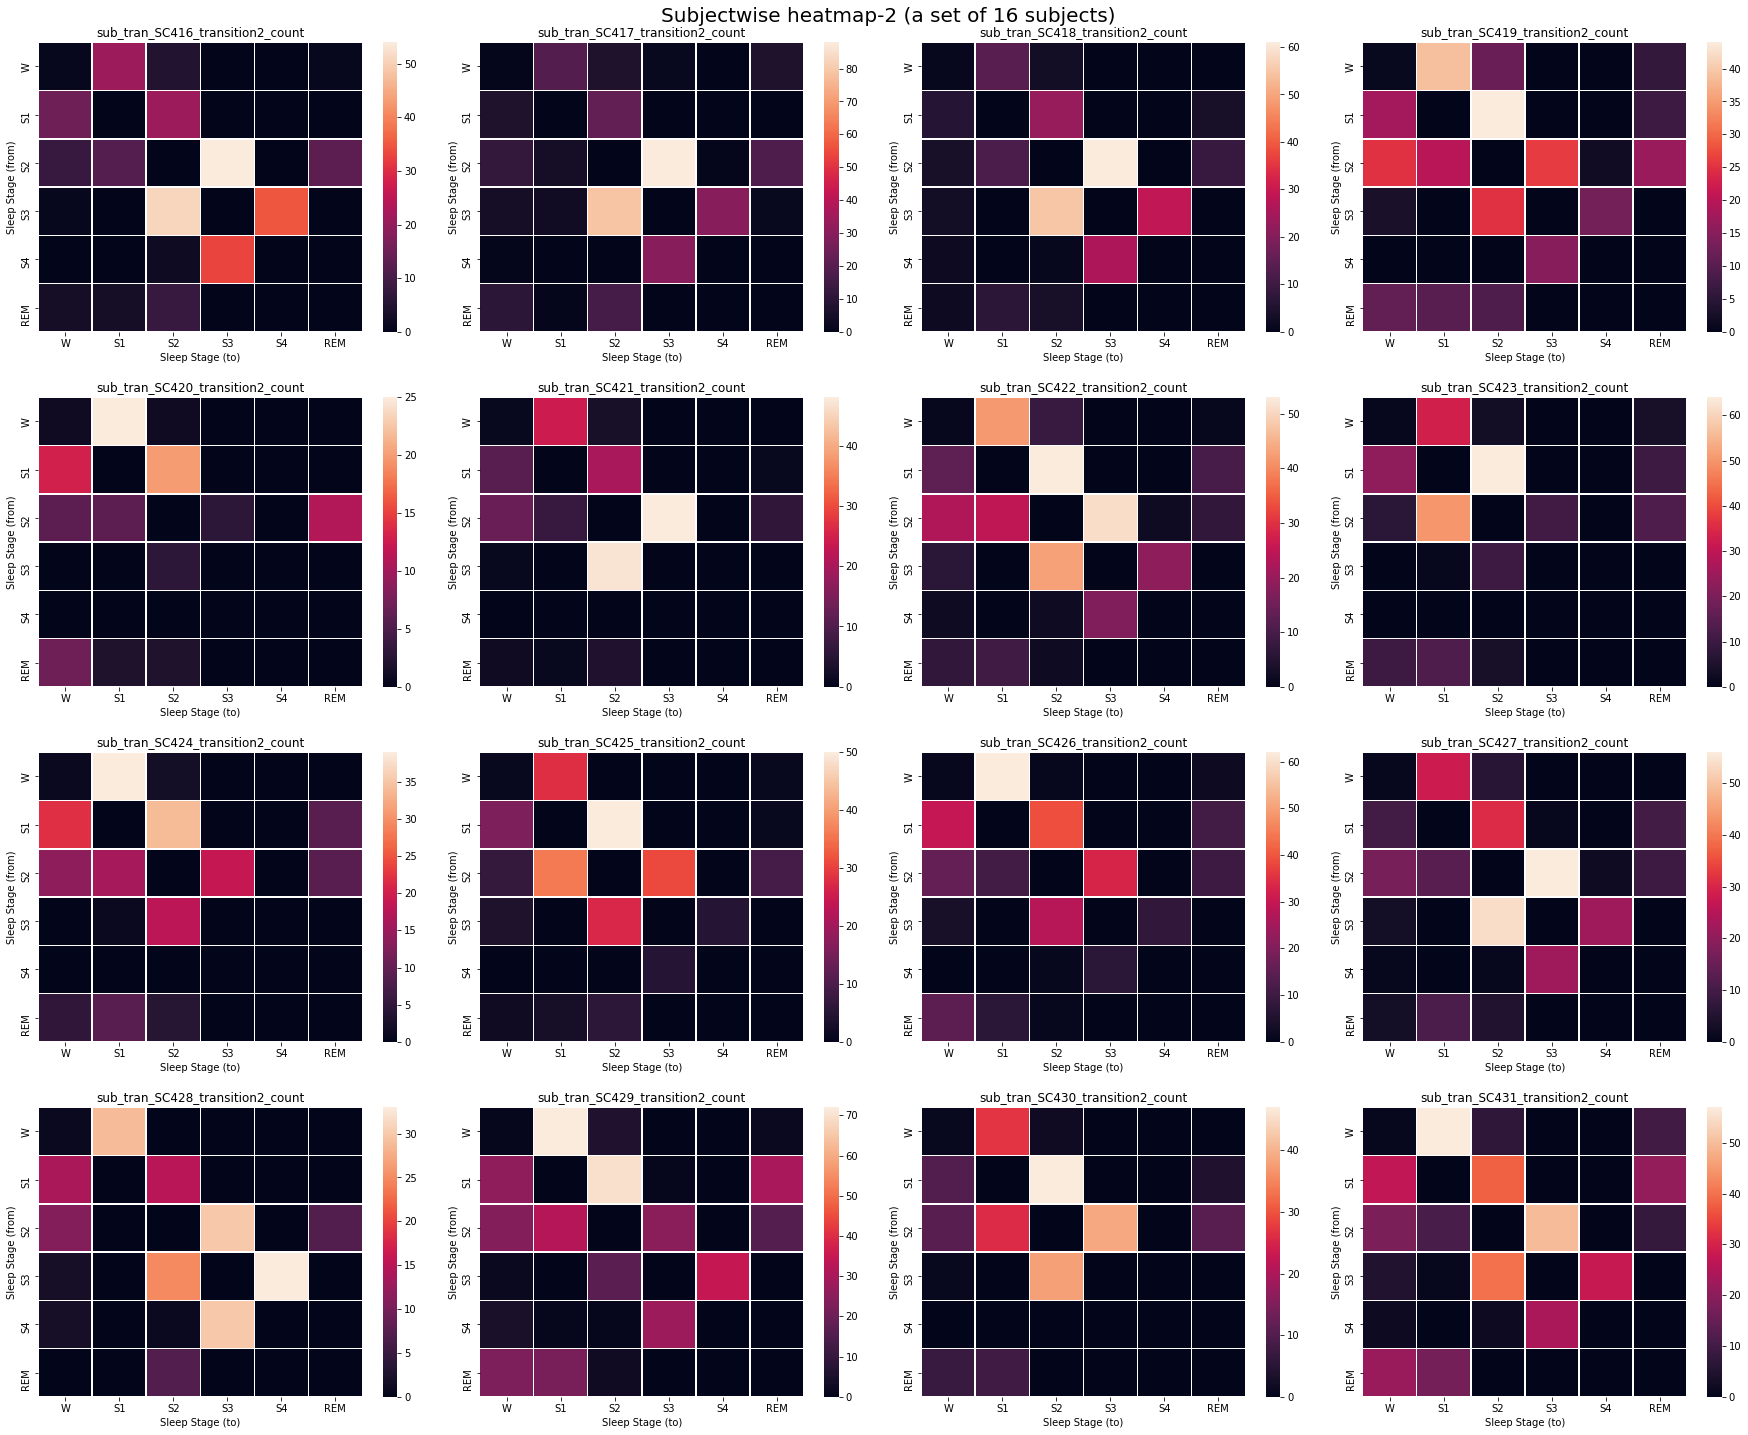

Drawing heatmap for index 32:48


<Figure size 1800x1440 with 0 Axes>

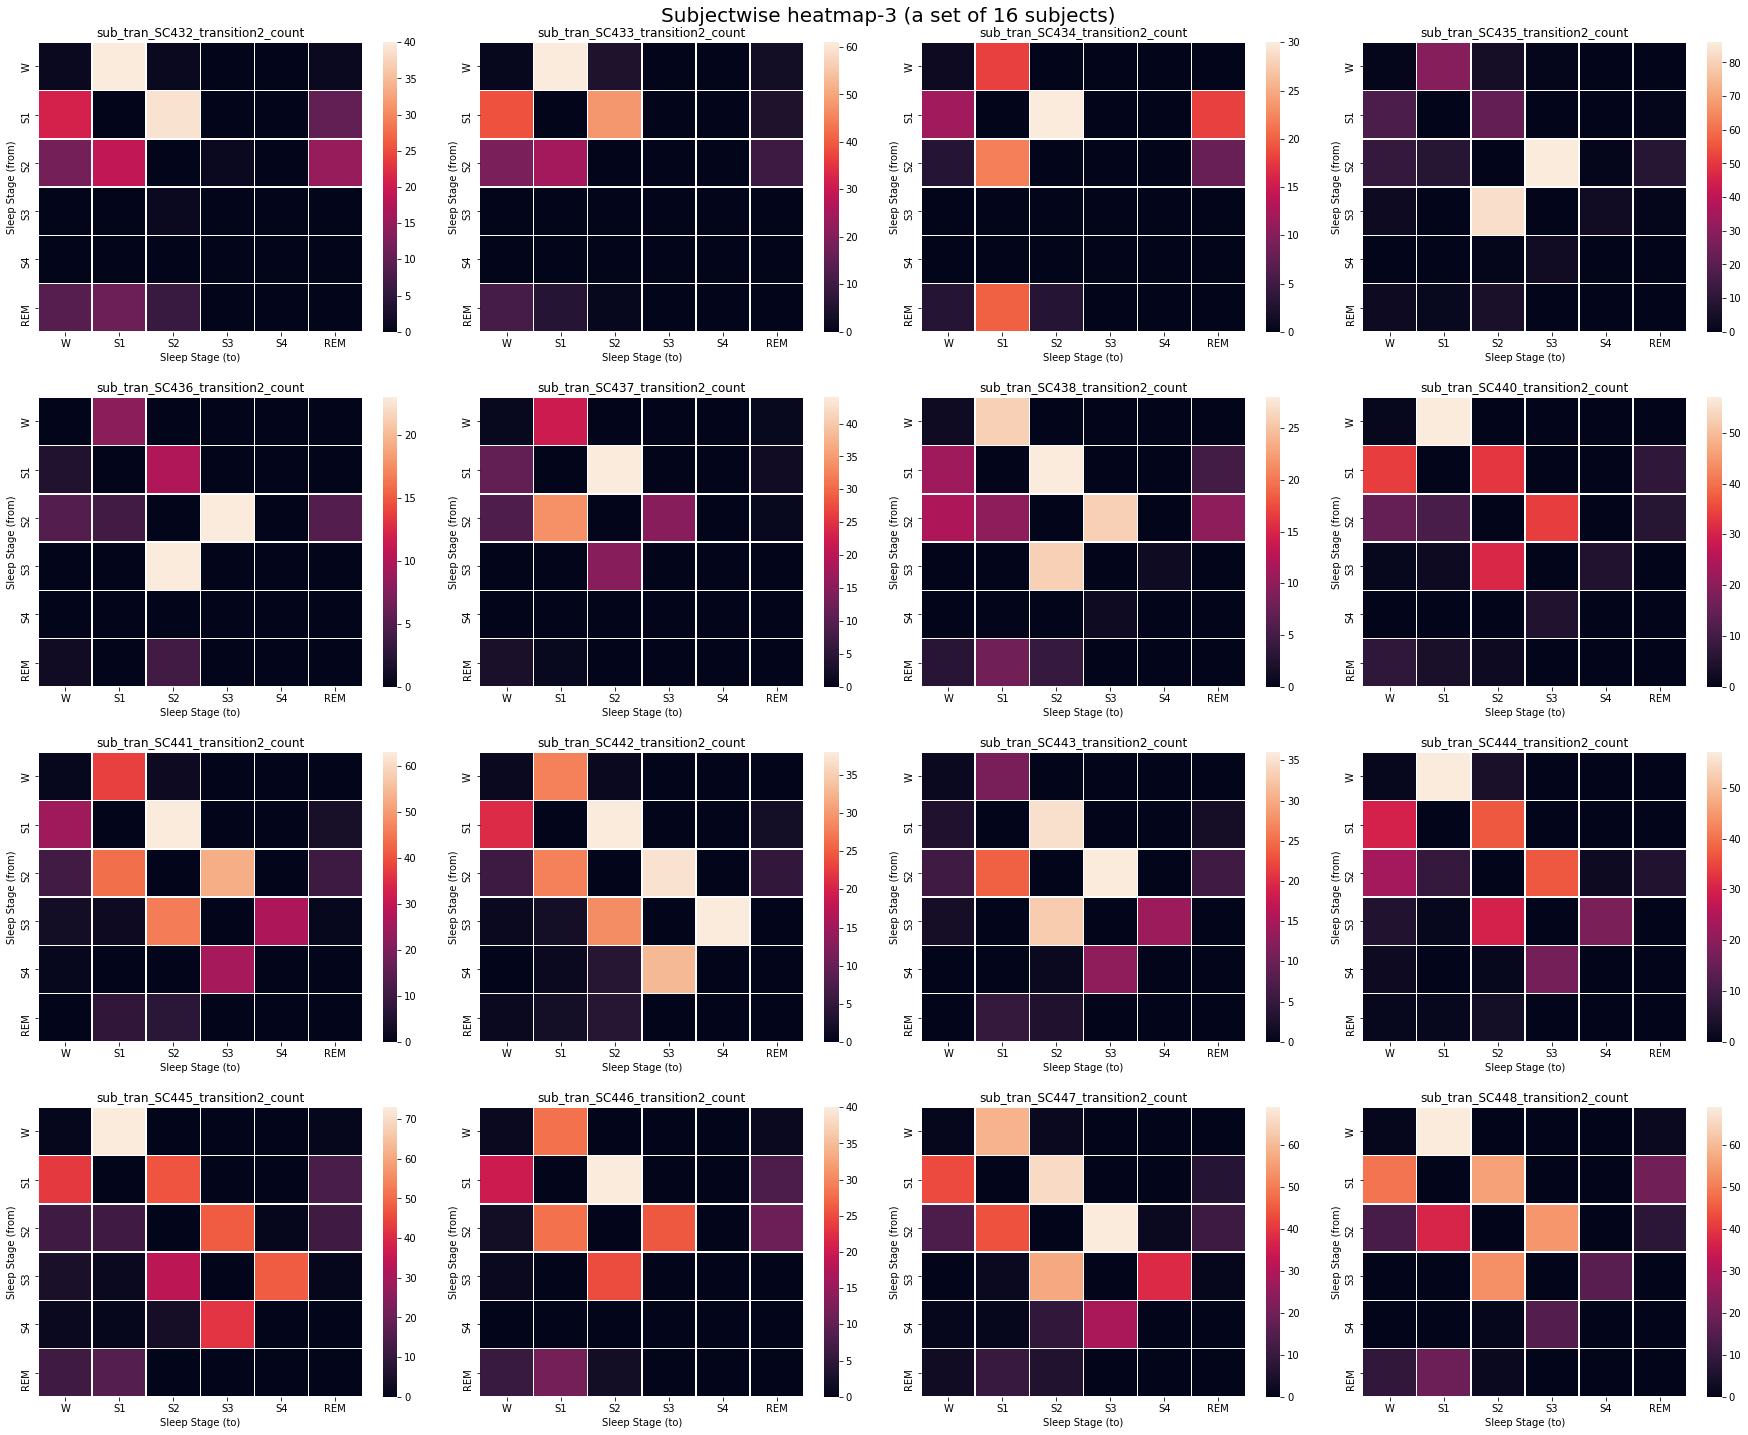

Drawing heatmap for index 48:64


<Figure size 1800x1440 with 0 Axes>

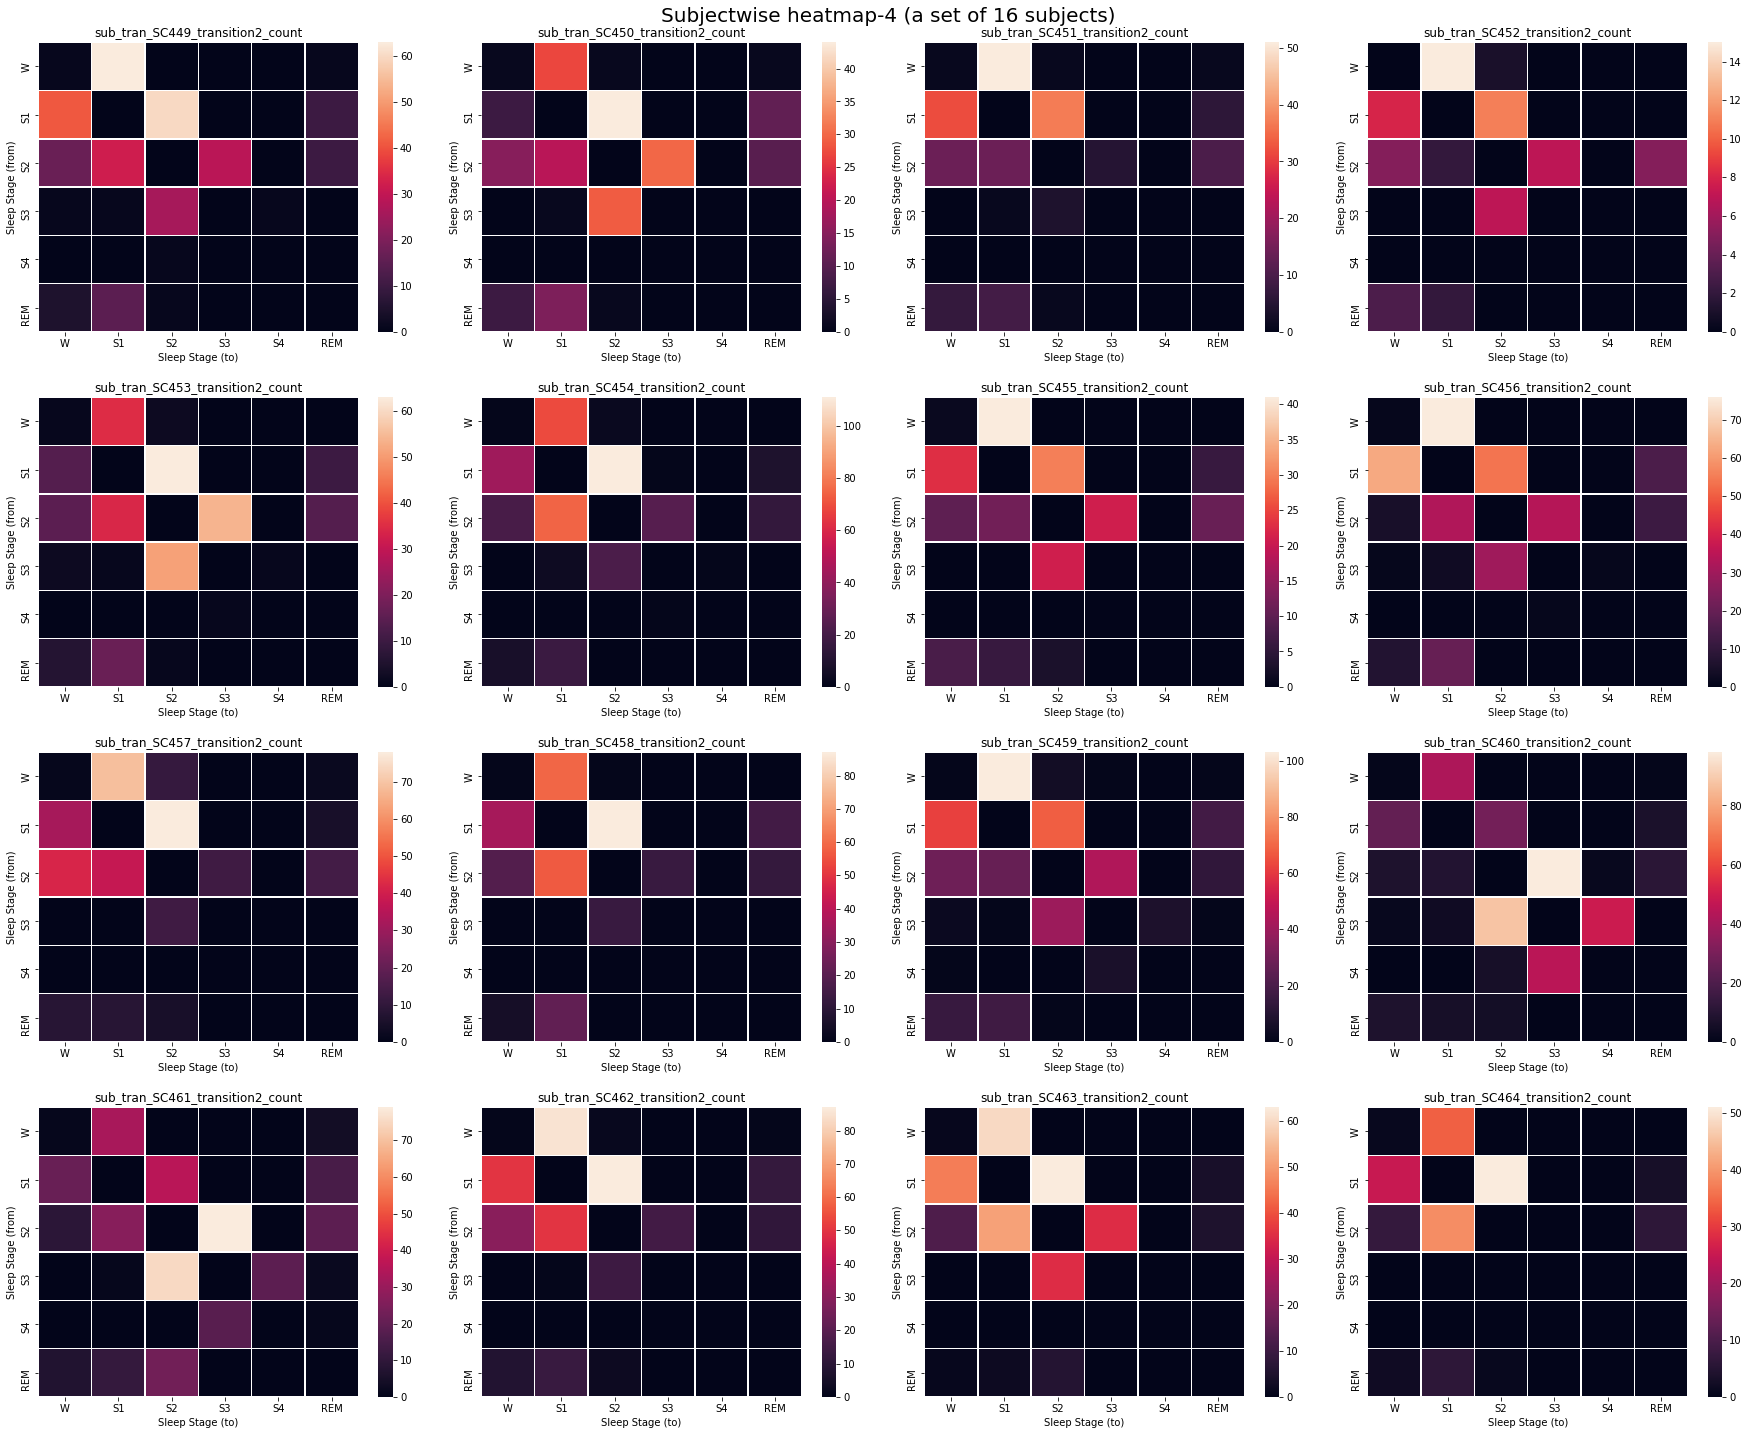

Drawing heatmap for index 64:80


<Figure size 1800x1440 with 0 Axes>

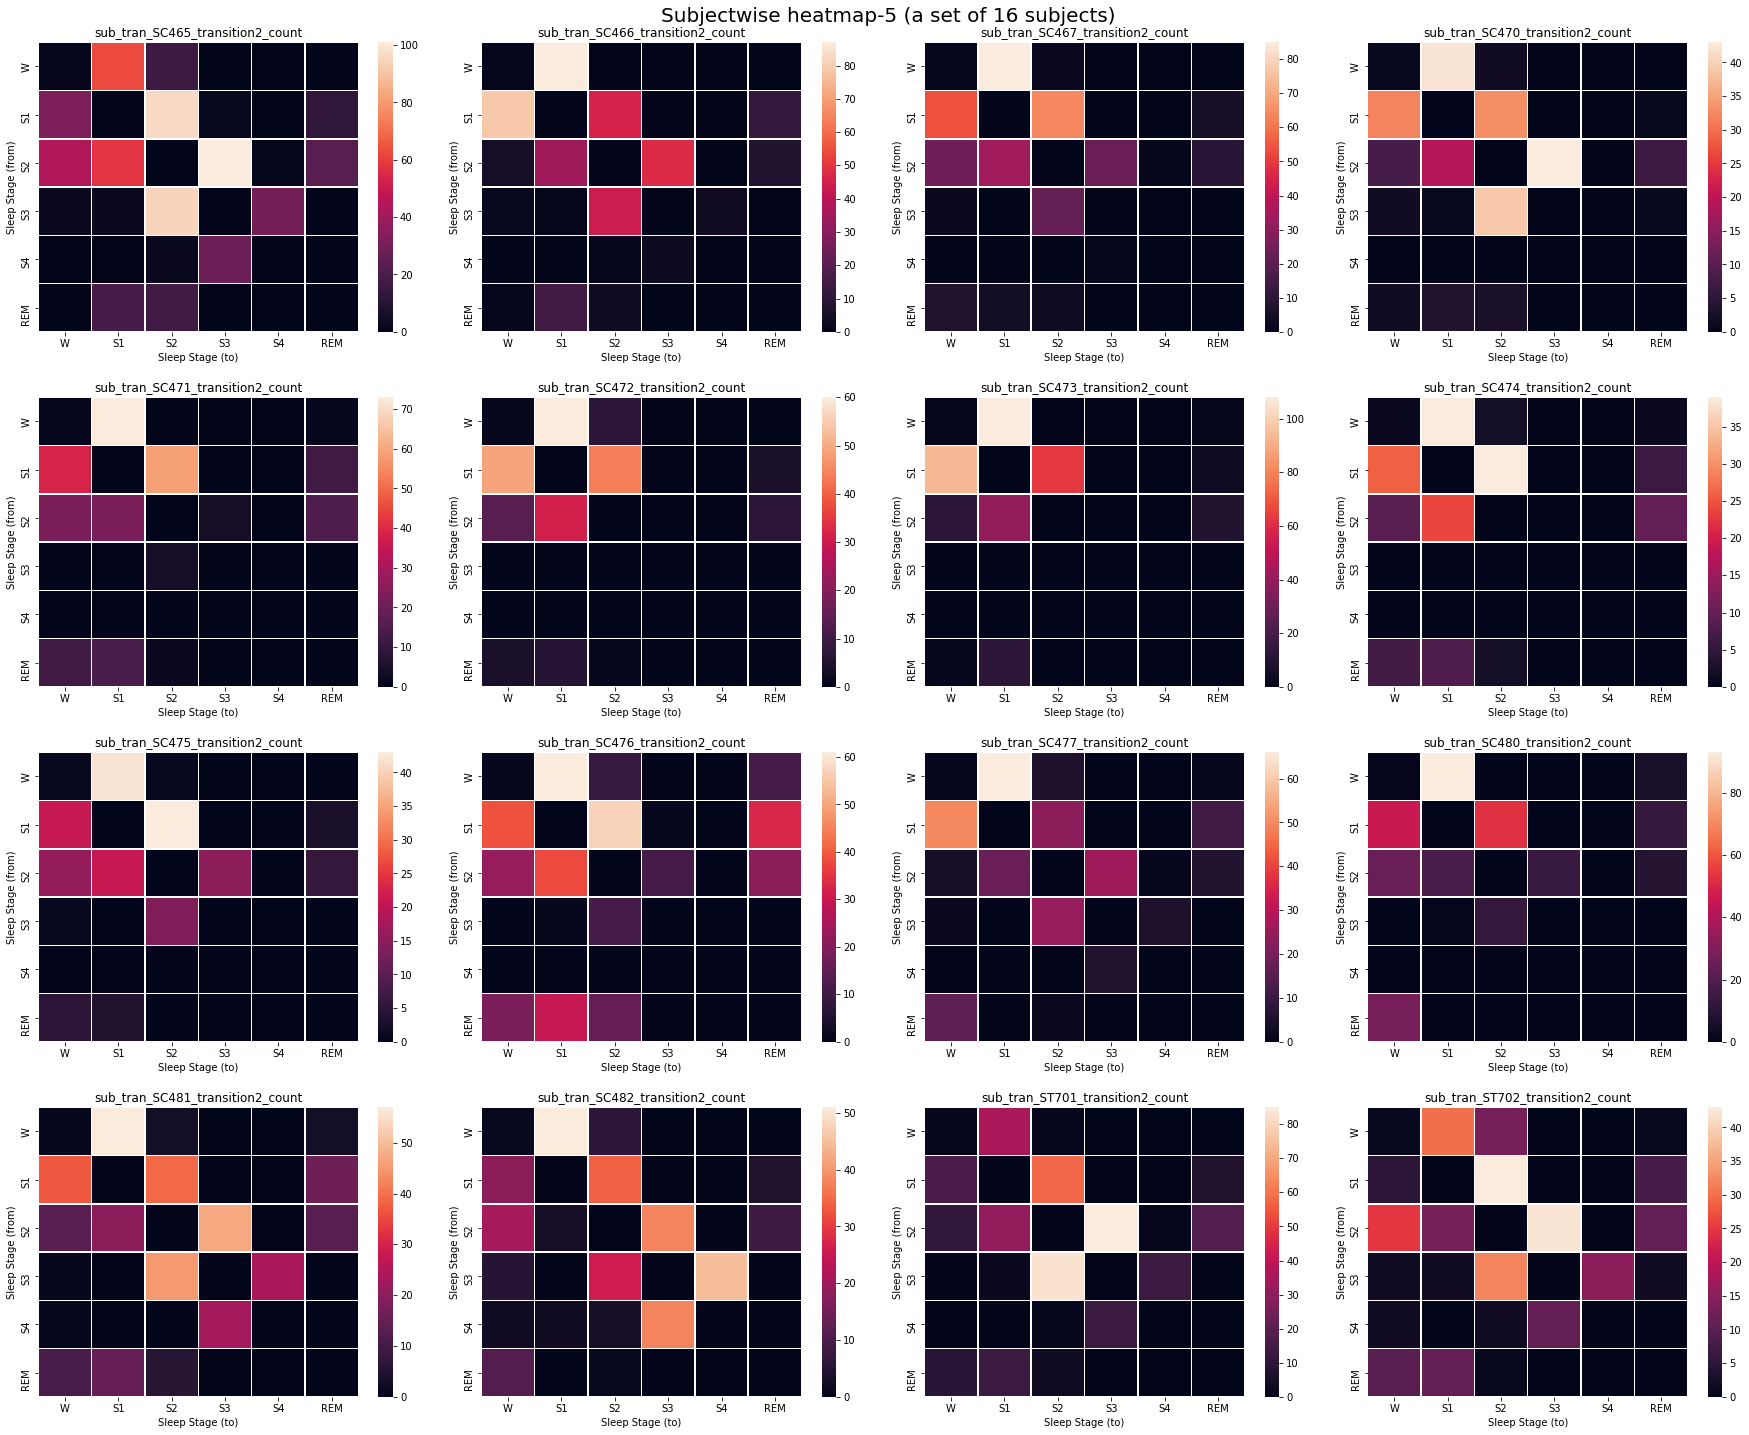

Drawing heatmap for index 80:96


<Figure size 1800x1440 with 0 Axes>

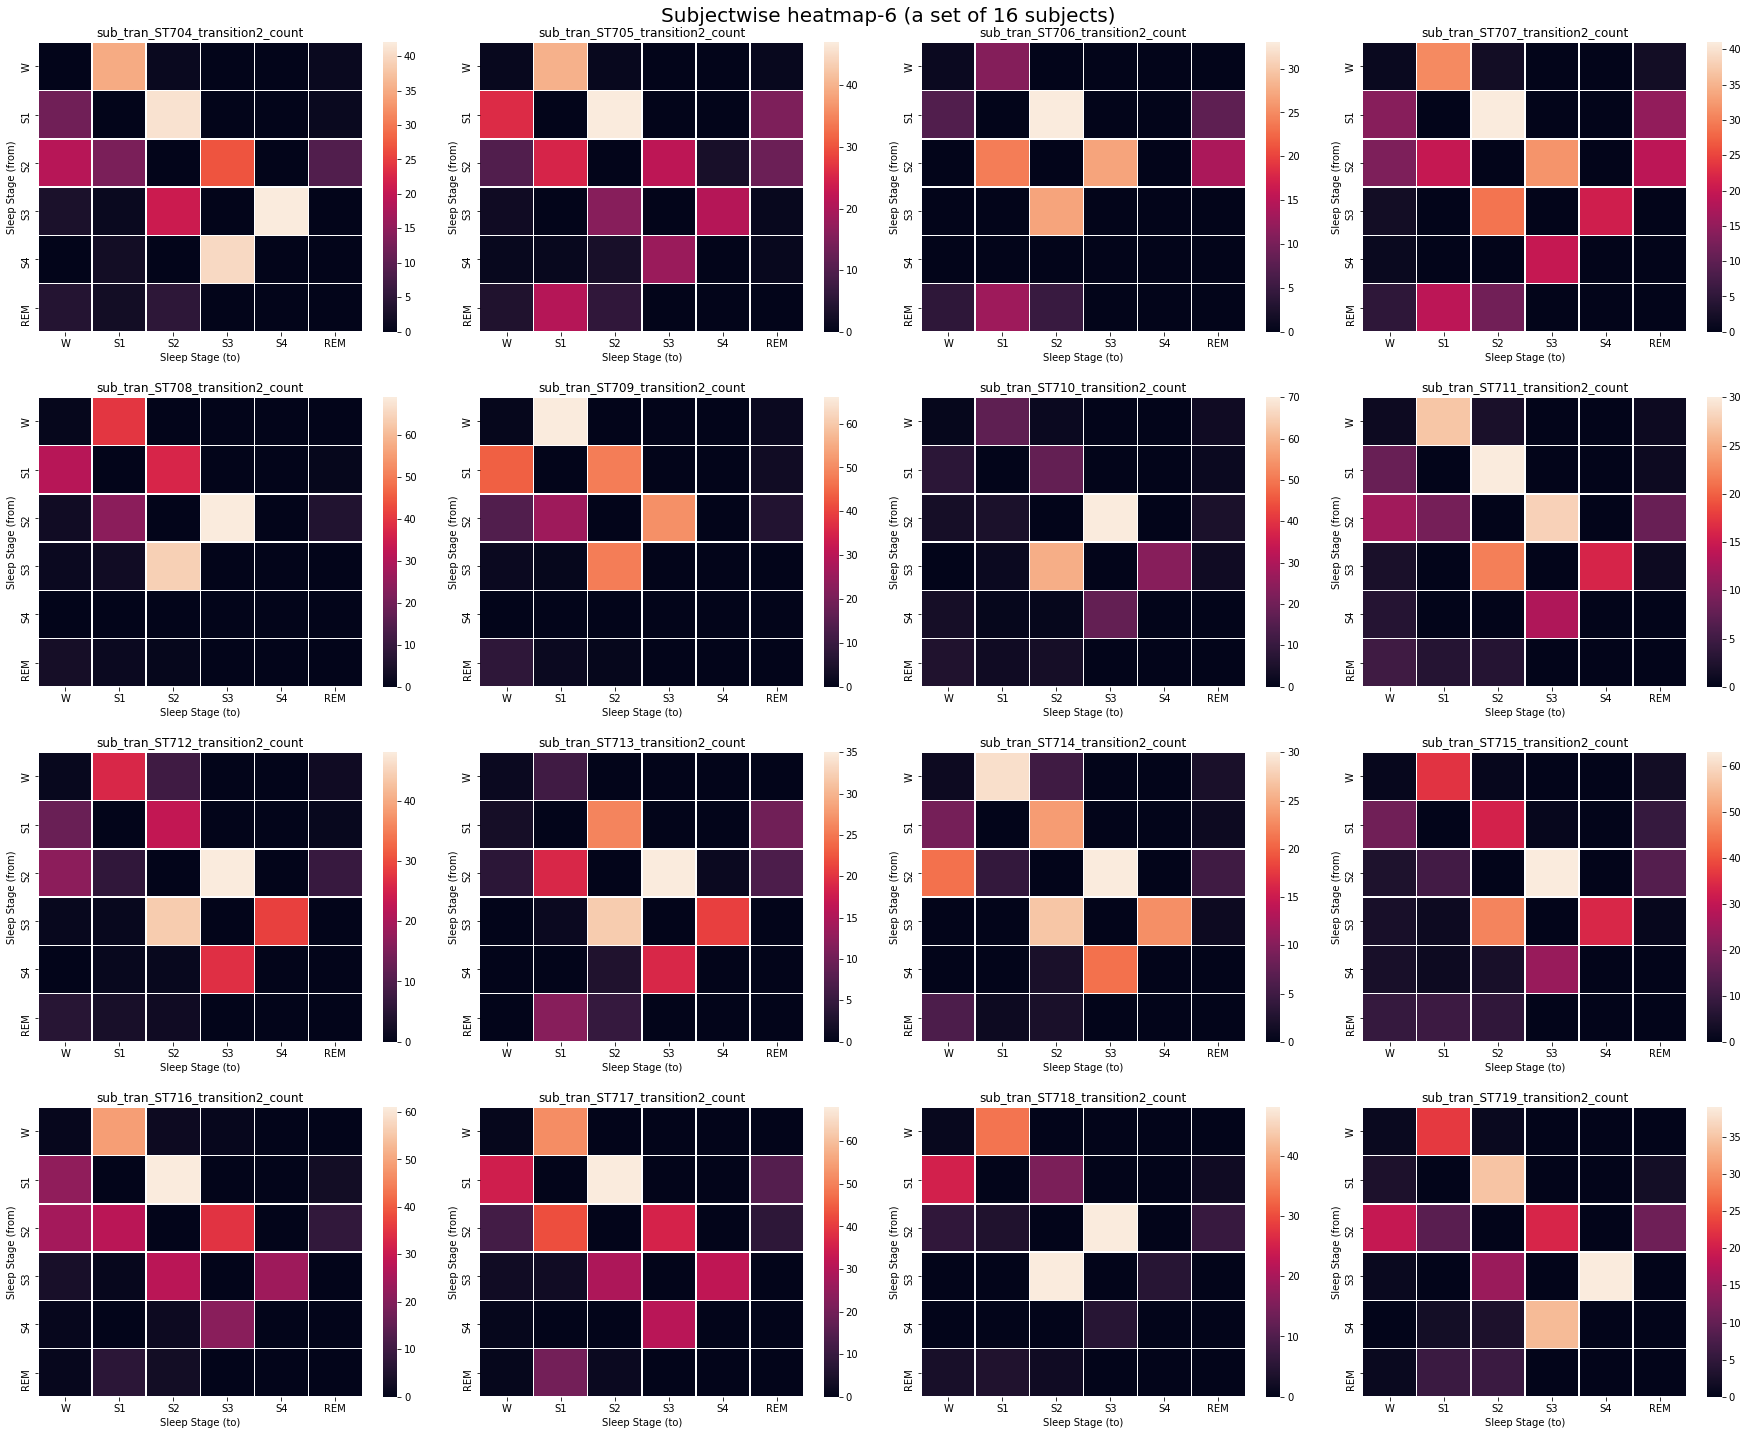

Drawing heatmap for index 96:100


<Figure size 1800x1440 with 0 Axes>

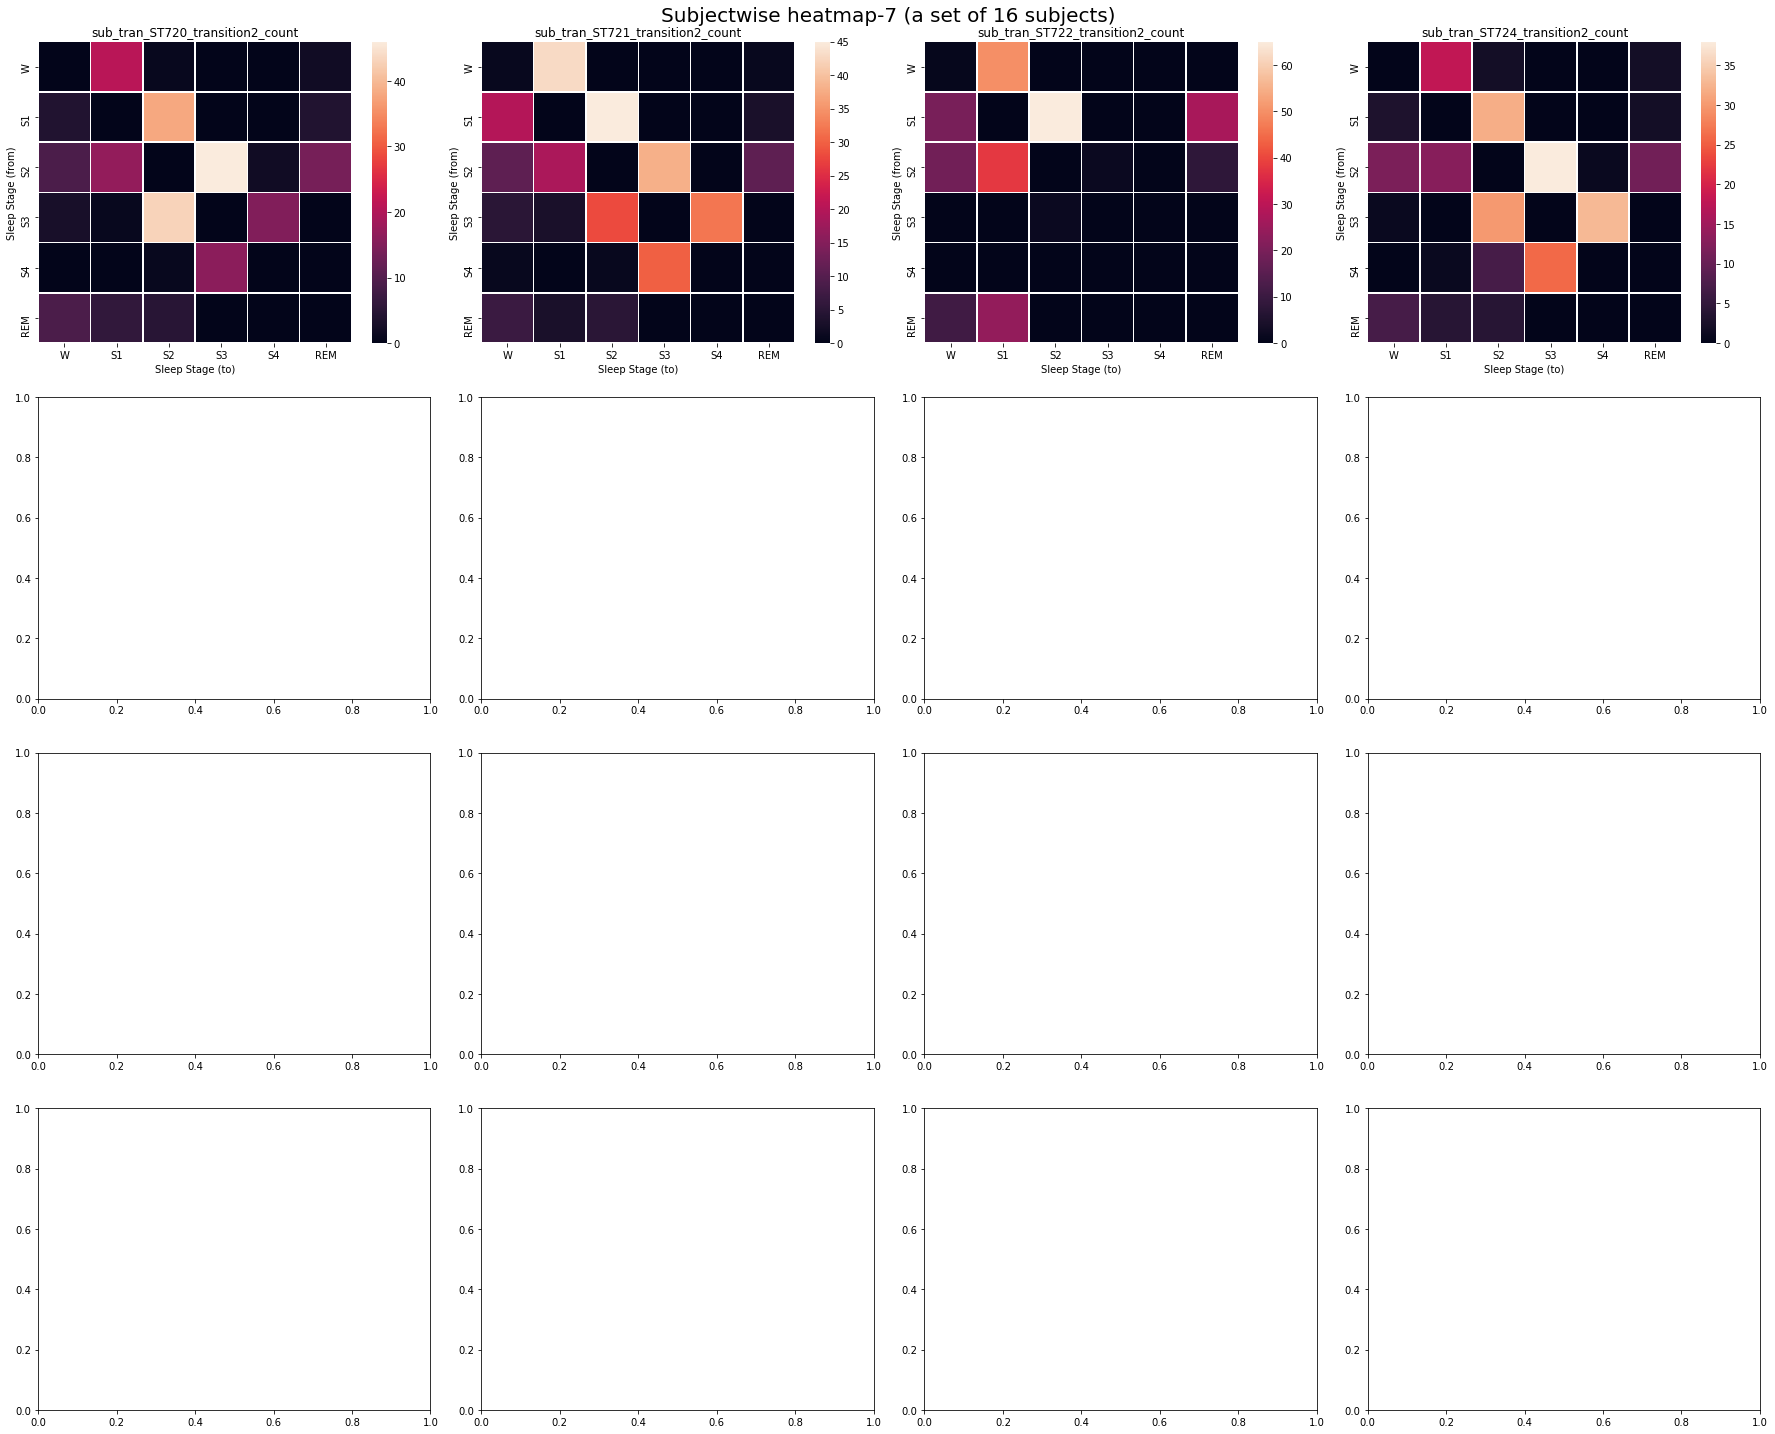

<Figure size 1800x1440 with 0 Axes>

In [754]:
ind_lst = list(range(len(all_metrix_files))) 
intr_ind_lst = ind_lst[::16]
intr_ind_lst

for i,ind in enumerate(intr_ind_lst): 
    lst_ind = intr_ind_lst[i+1] if ind!=intr_ind_lst[-1] else len(all_metrix_files)
    print(f"Drawing heatmap for index {ind}:{lst_ind}")
    plot_heatmap_for_transition_matrix(all_metrix_files[ind:lst_ind], i+1) 

### Markov model for transition matrix

In [ ]:
!pip install networkx
!pip install graphviz
# !pip install pygraphviz

In [ ]:
# modules from this repository
from markovchain import MarkovChain
plt.rcParams["figure.figsize"] = (25,20)

In [ ]:
all_metrix_files

In [ ]:
# plt.rcParams["figure.figsize"] = (20,6)
# plt.rcParams["figure.figsize"] = (5,4)
plt.rcParams["figure.figsize"] = (25,20)
list(sleep_stage_names_dict.keys()), list(sleep_stage_labels_dict.keys())

In [ ]:
# fig, axes = plt.subplots(4, 4)
# slp_lbl = list(sleep_stage_names_dict.keys())

# for i, dat_file in enumerate(all_metrix_files):
#     data = pd.read_csv(dat_file).values
#     x, y = (int)(i/4), i%4 
# #     print(i, x, y)
#     sns.heatmap(data, linewidth=0.5, ax=axes[x, y])
#     axes[x, y].set_title( (dat_file.split("/")[-1]).split(".")[0] )
#     axes[x, y].set_ylabel("Sleep Stage (from)")
#     axes[x, y].set_xlabel("Sleep Stage (to)")
#     axes[x, y].set_yticklabels(slp_lbl)
#     axes[x, y].set_xticklabels(slp_lbl) 
# fig.savefig(f"{result_directory}/Analytical_Graphs/n_subjectwise_heatmap.png") 
# fig.savefig(f"{result_directory}/Analytical_Graphs/n_subjectwise_heatmap.pdf") 
# plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (5,4)
# plt.rcParams["figure.figsize"] = (25,20)

In [ ]:
count_arr = pd.read_csv('./Results/Transition_Matrices/all_tran_sub_n1_transition_count.csv').values
count_arr

In [ ]:
mc = MarkovChain(count_arr, sleep_stage_labels) 
mc.draw("./all_annot_tDiagram_result_.png") 

In [ ]:
proba_arr = pd.read_csv('./Results/Transition_Matrices/all_tran_sub_n1_transition_proba.csv').values
proba_arr

In [ ]:
mc = MarkovChain(proba_arr, sleep_stage_labels) 
mc.draw("./all_annot_tDiagram_result_.png") 

### Visualise transition matrix - Network X

In [ ]:
import networkx as nx

# create state space and initial state probabilities

states = ['sleeping', 'eating', 'pooping']
pi = [0.35, 0.35, 0.3]
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())

In [ ]:
# create transition matrix
# equals transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.4, 0.2, 0.4]
q_df.loc[states[1]] = [0.45, 0.45, 0.1]
q_df.loc[states[2]] = [0.45, 0.25, .3]

print(q_df)

q = q_df.values
print('\n', q, q.shape, '\n')
print(q_df.sum(axis=1))

In [ ]:
from pprint import pprint 

# create a function that maps transition probability dataframe 
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

In [ ]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
# G.add_nodes_from(states_)
G.add_nodes_from(edges_wts)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_markov.dot')

In [ ]:
# plt.rcParams["figure.figsize"] = (25,20)

plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
import networkx as nx

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

def read_graph():
    graph_adjacency_list = { }
    for line in open("input.txt"):
        line = map(int, line.rstrip("\t\r\n").split("\t"))
        graph_adjacency_list.update({ line[0]: { e: 1 for e in line[1:] } })

    return graph_adjacency_list

graph_data = count_arr #read_graph()
G = nx.Graph(graph_data)
nx.draw_networkx(G, with_labels = True, node_color = "c", edge_color = "k", font_size = 8)

plt.axis('off')
plt.draw()
plt.savefig("graph.pdf")

In [ ]:
sleep_stage_labels_dict

In [ ]:
slp_stgs = list(sleep_stage_labels_dict.keys())
slp_stgs

In [ ]:
tst_arr = pd.read_csv('./Results/Transition_Matrices/all_tran_sub_n1_transition_count.csv')
tst_arr.index = slp_stgs
tst_arr

In [ ]:
tst_arr.at['W', 'S1']

In [ ]:
E = []
for i in slp_stgs:
    for j in slp_stgs:
        # print(tst_arr.at[i, j])
        if tst_arr.at[i, j]>0:
            E.append((i, j, tst_arr.at[i, j]))
        
E

In [ ]:
V = slp_stgs.copy()
V

In [ ]:
# E = [('A', 'B', 6), ('B', 'C', 7), ('C', 'D', 8), ('D','E', 4), ('E', 'F', 9), ('F','A', 6)]
E

In [ ]:
G =  nx.MultiDiGraph() 

In [ ]:
G.add_nodes_from(V)

In [ ]:
G.add_weighted_edges_from(E)

In [ ]:
G.nodes

In [ ]:
G.edges

In [ ]:
# G.__dict__
# nx.draw_networkx_edge_labels?

In [ ]:
pos = {'W':[1,1], 'S1':[2,2], 'S2':[3,1], 'S3':[3, 2], 'S4':[3,3], 'MT':[1,3], 'REM':[4,2]}

In [ ]:
weight = nx.get_edge_attributes(G, 'weight')
weight

In [ ]:
weight = {}
for u, v, keys, data in G.edges(keys=True, data=True):
    if 'weight' in data:
        if (u, v) in weight:
            weight[(u, v)].append(data['weight'])
        else:
            weight[(v, u)] = [data['weight']]
weight

In [ ]:
arc_size = 0.1

In [ ]:
nx.draw(G, pos=pos, with_labels=True, node_size=5000, node_color='r', edge_color='g', arrowsize=20, font_size=20, connectionstyle=f"arc3,rad={arc_size}")
# nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G), edge_labels=weight, font_size=15) #nx.spring_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight, font_size=15) #nx.spring_layout(G)

In [ ]:
nx.draw_networkx_nodes?

In [ ]:
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=5000, node_color='#ff0000')
nx.draw_networkx_labels(G, pos, ax=ax)
nx.draw_networkx_edges(G, pos, connectionstyle="arc3,rad=0.4") 

In [ ]:
nx.draw(G, pos=pos, with_labels=True,node_size=5000, node_color='r', edge_color='g', arrowsize=20, font_size=20)
# nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G), edge_labels=weight, font_size=15) #nx.spring_layout(G)
# nx.draw_networkx_edge_labels(G, pos, edge_labels=weight, font_size=15) #nx.spring_layout(G)


curved_edges = G.edges# [edge for edge in G.edges() if reversed(edge) in G.edges()]
# straight_edges = list(set(G.edges()) - set(curved_edges))
# nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
arc_rad = 0.25
nx.draw_networkx_edges(G, pos, with_labels=True, connectionstyle="arc3,rad=0.4")

In [ ]:
G = nx.DiGraph()

pos = nx.spring_layout(G)
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (2, 4), (2, 3), (4, 1)])

nx.draw(G, with_labels=True, connectionstyle="arc3,rad=0.4")

plt.show()


In [ ]:
G = nx.DiGraph()
edge_list = [(1,2,{'w':'A1'}),(2,1,{'w':'A2'}),(2,3,{'w':'B'}),(3,1,{'w':'C'}),
             (3,4,{'w':'D1'}),(4,3,{'w':'D2'}),(1,5,{'w':'E1'}),(5,1,{'w':'E2'}),
             (3,5,{'w':'F'}),(5,4,{'w':'G'})]
G.add_edges_from(edge_list)
pos=nx.spring_layout(G,seed=5)
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
fig.savefig("1.png", bbox_inches='tight',pad_inches=0)

In [ ]:
G = nx.DiGraph()
edge_list = [(1,2,{'w':'A1'}),(2,1,{'w':'A2'}),(2,3,{'w':'B'}),(3,1,{'w':'C'}),
             (3,4,{'w':'D1'}),(4,3,{'w':'D2'}),(1,5,{'w':'E1'}),(5,1,{'w':'E2'}),
             (3,5,{'w':'F'}),(5,4,{'w':'G'})]
G.add_edges_from(edge_list)
pos=nx.spring_layout(G,seed=5)
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)

curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
arc_rad = 0.25
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')
fig.savefig("2.png", bbox_inches='tight',pad_inches=0)

### Visualise transition matrix - Example

In [ ]:
!pip install networkx
!pip install graphviz
# !pip install pygraphviz

In [ ]:
# !pip install networkx
# !pip install graphviz
# !pip install pygraphviz

# modules from this repository
from markovchain import MarkovChain

In [ ]:
directory, result_directory

In [ ]:
trans_file_path = f"{result_directory}/Transition_Matrices/all_annot_transition{tran_step}"
count, proba, dura = pd.read_csv(f"{trans_file_path}_count.csv"), pd.read_csv(f"{trans_file_path}_proba.csv"), pd.read_csv(f"{trans_file_path}_dura.csv") 


In [ ]:
proba

In [ ]:
sleep_stage_labels

In [ ]:
proba_arr = proba.iloc[:, 1:].values
# count_arr = proba.values
proba_arr

In [ ]:
mc = MarkovChain(proba_arr, sleep_stage_labels)
mc.draw(f"{result_directory}/all_annot_tDiagram.png")

In [ ]:
trans_file_path = f"{result_directory}/Transition_Matrices/all_tran_transition{tran_step}"
count2, proba2, dura2 = pd.read_csv(f"{trans_file_path}_count.csv"), pd.read_csv(f"{trans_file_path}_proba.csv"), pd.read_csv(f"{trans_file_path}_dura.csv") 


In [ ]:
proba2

In [ ]:
sleep_stage_labels

In [ ]:
proba_arr2 = proba2.iloc[:, 1:].values
# proba_arr2 = proba2.values
proba_arr2

In [ ]:
mc = MarkovChain(proba_arr2, sleep_stage_labels)
mc.draw("./all_tran_tDiagram_result_.png")

In [ ]:
P = np.array([[0.8, 0.2], [0.1, 0.9]]) # Transition matrix
mc = MarkovChain(P, ['1', '2'])
mc.draw("./markov-chain-two-states.png")
# mc.draw("./markov-chain-two-states.pdf")

In [ ]:
P = np.array([
    [0.8, 0.1, 0.1, 0.0], 
    [0.1, 0.7, 0.0, 0.2],
    [0.1, 0.0, 0.7, 0.2],
    [0.1, 0.0, 0.7, 0.2]
])
mc = MarkovChain(P, ['1', '2', '3', '4'])
mc.draw("./markov-chain-four-states.png")

In [ ]:
P = np.array([
    [0.7, 0.1, 0.1, 0.0, 0.0, 0.1], 
    [0.1, 0.4, 0.0, 0.2, 0.1, 0.2],
    [0.1, 0.0, 0.5, 0.2, 0.0, 0.2],
    [0.1, 0.0, 0.4, 0.2, 0.3, 0.0],
    [0.6, 0.1, 0.1, 0.0, 0.2, 0.0], 
    [0.6, 0.1, 0.1, 0.0, 0.2, 0.0], 
])
mc = MarkovChain(P, ['1', '2', '3', '4', '5', '6'])
mc.draw("./markov-chain-six-states.png")

In [ ]:
P = np.array([
    [0.7, 0.1, 0.1, 0.0, 0.0, 0.1, 0.6], 
    [0.1, 0.4, 0.0, 0.2, 0.1, 0.2, 0.2],
    [0.1, 0.0, 0.5, 0.2, 0.0, 0.2, 0.8],
    [0.1, 0.0, 0.4, 0.2, 0.3, 0.0, 0.5],
    [0.6, 0.1, 0.1, 0.0, 0.2, 0.0, 0.4], 
    [0.6, 0.1, 0.1, 0.0, 0.2, 0.0, 0.0], 
    [0.2, 0.5, 0.6, 0.3, 0.0, 0.1, 0.3], 
])
mc = MarkovChain(P, ['1', '2', '3', '4', '5', '6', '7'])
mc.draw("./markov-chain-seven-states.png")

## Rough

In [55]:
directory = dataset_directory
directory

'E:/aliem/Sleep_EDFX_Dataset'

In [56]:
demo_files = get_list_of_paths_from_a_directory(directory, path_type=None, containes="subjects", extension="csv", exclude=exclude_contents_in_dataset_directory) 

demo_files

============> *subjects*.csv, None, E:/aliem/Sleep_EDFX_Dataset/*subjects*.csv


['E:/aliem/Sleep_EDFX_Dataset/SC-subjects.csv',
 'E:/aliem/Sleep_EDFX_Dataset/ST-subjects.csv']

In [68]:
list_of_edfs[:5]

['E:/aliem/Sleep_EDFX_Dataset/sleep-cassette/SC4001E0-PSG.edf',
 'E:/aliem/Sleep_EDFX_Dataset/sleep-cassette/SC4002E0-PSG.edf',
 'E:/aliem/Sleep_EDFX_Dataset/sleep-cassette/SC4011E0-PSG.edf',
 'E:/aliem/Sleep_EDFX_Dataset/sleep-cassette/SC4012E0-PSG.edf',
 'E:/aliem/Sleep_EDFX_Dataset/sleep-cassette/SC4021E0-PSG.edf']

In [60]:
list_of_annot_edfs[:5]

['E:/aliem/Sleep_EDFX_Dataset/sleep-cassette/SC4001EC-Hypnogram.edf',
 'E:/aliem/Sleep_EDFX_Dataset/sleep-cassette/SC4002EC-Hypnogram.edf',
 'E:/aliem/Sleep_EDFX_Dataset/sleep-cassette/SC4011EH-Hypnogram.edf',
 'E:/aliem/Sleep_EDFX_Dataset/sleep-cassette/SC4012EC-Hypnogram.edf',
 'E:/aliem/Sleep_EDFX_Dataset/sleep-cassette/SC4021EH-Hypnogram.edf']

In [72]:
file_name_list = [f.split("/")[-1][:6] for f in list_of_annot_edfs]
file_name_list[:5]

['SC4001', 'SC4002', 'SC4011', 'SC4012', 'SC4021']

In [178]:
demo_df1 = pd.read_csv(demo_files[0])
demo_df1

,subject,night,age,sex (F=1),LightsOff
0,0,1,33,1,0:38
1,0,2,33,1,21:57
2,1,1,33,1,22:44
3,1,2,33,1,22:15
4,2,1,26,1,22:50
...,...,...,...,...,...
148,80,2,54,1,23:18
149,81,1,57,1,22:00
150,81,2,57,1,21:56
151,82,1,56,1,23:59


In [179]:
demo_df2 = pd.read_csv(demo_files[1])
demo_df2

,Subject - age - sex,Unnamed: 1,Unnamed: 2,Placebo night,Unnamed: 4,Temazepam night,Unnamed: 6
0,Nr,Age,M1/F2,night nr,lights off,night nr,lights off
1,1,60,1,1,23:01,2,23:48
2,2,35,2,2,23:27,1,0:00
3,4,18,2,1,23:53,2,22:37
4,5,32,2,2,23:23,1,23:34
5,6,35,2,1,23:28,2,23:26
6,7,51,2,1,0:02,2,23:24
7,8,66,2,2,23:20,1,23:53
8,9,47,1,2,0:30,1,23:42
9,10,20,2,1,23:21,2,23:28


In [180]:
demo_df2 = demo_df2.iloc[1:23, :]
demo_df2

,Subject - age - sex,Unnamed: 1,Unnamed: 2,Placebo night,Unnamed: 4,Temazepam night,Unnamed: 6
1,1,60,1,1,23:01,2,23:48
2,2,35,2,2,23:27,1,0:00
3,4,18,2,1,23:53,2,22:37
4,5,32,2,2,23:23,1,23:34
5,6,35,2,1,23:28,2,23:26
6,7,51,2,1,0:02,2,23:24
7,8,66,2,2,23:20,1,23:53
8,9,47,1,2,0:30,1,23:42
9,10,20,2,1,23:21,2,23:28
10,11,21,2,2,23:52,1,23:38


In [181]:
demo_df3 = demo_df1.copy() 
demo_df3['Age'] = demo_df3['age']
demo_df3

,subject,night,age,sex (F=1),LightsOff,Age
0,0,1,33,1,0:38,33
1,0,2,33,1,21:57,33
2,1,1,33,1,22:44,33
3,1,2,33,1,22:15,33
4,2,1,26,1,22:50,26
...,...,...,...,...,...,...
148,80,2,54,1,23:18,54
149,81,1,57,1,22:00,57
150,81,2,57,1,21:56,57
151,82,1,56,1,23:59,56


In [182]:
demo_df3 = demo_df3.drop(columns=['night', 'age', 'LightsOff'])
demo_df3.columns = ['Subject_ID', 'Gender', 'Age']
demo_df3 = demo_df3.replace({'Gender': {1: 'F', 2: 'M'}})
demo_df3

,Subject_ID,Gender,Age
0,0,F,33
1,0,F,33
2,1,F,33
3,1,F,33
4,2,F,26
...,...,...,...
148,80,F,54
149,81,F,57
150,81,F,57
151,82,F,56


In [198]:
demo_df4 = demo_df2.copy()
demo_df4['Age'] = demo_df4['Unnamed: 1']
demo_df4 = demo_df4.drop(columns=['Placebo night', 'Unnamed: 1', 'Unnamed: 4', 'Temazepam night', 'Unnamed: 6'])
demo_df4.columns = ['Subject_ID', 'Gender', 'Age']
demo_df4 = demo_df4.astype({'Subject_ID': int, 'Age': int, 'Gender': int})
demo_df4
demo_df4 = demo_df4.replace({'Gender': {1: 'F', 2: 'M'}}) 
demo_df4
# demo_df4.replace({'Gender': {1: 'F', 2: 'M'}})

,Subject_ID,Gender,Age
1,1,F,60
2,2,M,35
3,4,M,18
4,5,M,32
5,6,M,35
6,7,M,51
7,8,M,66
8,9,F,47
9,10,M,20
10,11,M,21


In [199]:
# it has two records side by side in 'Temazepam night', 'Unnamed: 6' that we removed
demo_df6 = pd.DataFrame(np.repeat(demo_df4.values, 2, axis=0))
demo_df6.columns = demo_df4.columns
demo_df6

,Subject_ID,Gender,Age
0,1,F,60
1,1,F,60
2,2,M,35
3,2,M,35
4,4,M,18
5,4,M,18
6,5,M,32
7,5,M,32
8,6,M,35
9,6,M,35


In [200]:
demo_df3.reset_index(drop=True, inplace=True)
demo_df6.reset_index(drop=True, inplace=True)
demo_df7 = pd.concat([demo_df3, demo_df6], axis=0)
demo_df7

,Subject_ID,Gender,Age
0,0,F,33
1,0,F,33
2,1,F,33
3,1,F,33
4,2,F,26
...,...,...,...
39,21,M,34
40,22,F,56
41,22,F,56
42,24,M,48


In [201]:
len(file_name_list)

197

In [202]:
demo_df8 = demo_df7.copy()
demo_df8.insert(0, "File_Name", file_name_list, True)
demo_df8.insert(1, "Category", ['n']*demo_df7.shape[0], True)
demo_df8

,File_Name,Category,Subject_ID,Gender,Age
0,SC4001,n,0,F,33
1,SC4002,n,0,F,33
2,SC4011,n,1,F,33
3,SC4012,n,1,F,33
4,SC4021,n,2,F,26
...,...,...,...,...,...
39,ST7212,n,21,M,34
40,ST7221,n,22,F,56
41,ST7222,n,22,F,56
42,ST7241,n,24,M,48


In [203]:
demo_df8 = demo_df8.astype({'Subject_ID': int, 'Age': int})
demo_df8

,File_Name,Category,Subject_ID,Gender,Age
0,SC4001,n,0,F,33
1,SC4002,n,0,F,33
2,SC4011,n,1,F,33
3,SC4012,n,1,F,33
4,SC4021,n,2,F,26
...,...,...,...,...,...
39,ST7212,n,21,M,34
40,ST7221,n,22,F,56
41,ST7222,n,22,F,56
42,ST7241,n,24,M,48


In [204]:
directory = result_directory
directory

'./Results/Sleep_EDFX'

In [205]:
demo_df8.to_csv(f"{directory}/Demography_Details.csv", index=False)

In [209]:
demo_df8[(demo_df8['Gender']=='M')]
demo_df8[(demo_df8['Gender']=='F')]

,File_Name,Category,Subject_ID,Gender,Age
0,SC4001,n,0,F,33
1,SC4002,n,0,F,33
2,SC4011,n,1,F,33
3,SC4012,n,1,F,33
4,SC4021,n,2,F,26
...,...,...,...,...,...
25,ST7142,n,14,F,20
36,ST7201,n,20,F,24
37,ST7202,n,20,F,24
40,ST7221,n,22,F,56


In [210]:
np.min(demo_df8[['Age']].values), np.max(demo_df8[['Age']].values)

(18, 101)

In [212]:
np.min(demo_df8[(demo_df8['Gender']=='M')][['Age']].values), np.max(demo_df8[(demo_df8['Gender']=='M')][['Age']].values)

(18, 97)

In [213]:
np.min(demo_df8[(demo_df8['Gender']=='F')][['Age']].values), np.max(demo_df8[(demo_df8['Gender']=='F')][['Age']].values)

(20, 101)

In [145]:
demo_df8

,File_Name,Category,Subject_ID,Gender,Age
0,SC4001,n,0,F,33
1,SC4002,n,0,F,33
2,SC4011,n,1,F,33
3,SC4012,n,1,F,33
4,SC4021,n,2,F,26
...,...,...,...,...,...
39,ST7212,n,21,2,34
40,ST7221,n,22,1,56
41,ST7222,n,22,1,56
42,ST7241,n,24,2,48


In [223]:
tm = demo_df8[(demo_df8['File_Name'].str.startswith('SC', na=False))]
tm

,File_Name,Category,Subject_ID,Gender,Age
0,SC4001,n,0,F,33
1,SC4002,n,0,F,33
2,SC4011,n,1,F,33
3,SC4012,n,1,F,33
4,SC4021,n,2,F,26
...,...,...,...,...,...
148,SC4802,n,80,F,54
149,SC4811,n,81,F,57
150,SC4812,n,81,F,57
151,SC4821,n,82,F,56


In [217]:
np.min(tm[['Age']].values), np.max(tm[['Age']].values)

(25, 101)

In [228]:
ttm = tm[(tm['Gender']=='M')]
ttm
ttm.shape[0]
np.min(ttm[['Age']].values), np.max(ttm[['Age']].values)

ttm = tm[(tm['Gender']=='F')]
ttm
ttm.shape[0]
np.min(ttm[['Age']].values), np.max(ttm[['Age']].values)

(25, 101)

In [229]:
tm = demo_df8[(demo_df8['File_Name'].str.startswith('ST', na=False))]
tm

,File_Name,Category,Subject_ID,Gender,Age
0,ST7011,n,1,F,60
1,ST7012,n,1,F,60
2,ST7021,n,2,M,35
3,ST7022,n,2,M,35
4,ST7041,n,4,M,18
5,ST7042,n,4,M,18
6,ST7051,n,5,M,32
7,ST7052,n,5,M,32
8,ST7061,n,6,M,35
9,ST7062,n,6,M,35


In [230]:
np.min(tm[['Age']].values), np.max(tm[['Age']].values)

(18, 79)

In [234]:
ttm = tm[(tm['Gender']=='M')]
ttm
ttm.shape[0]
np.min(ttm[['Age']].values), np.max(ttm[['Age']].values)

ttm = tm[(tm['Gender']=='F')]
ttm
ttm.shape[0]
np.min(ttm[['Age']].values), np.max(ttm[['Age']].values)

(20, 60)